In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
csv_files = [
    "ISS(ZARYA)_25544_data.csv",
    "ASTRA 2F_38778_data.csv",
    "ARIANE 5 DEB (SYLDA)_44336_data.csv",
    "SL-8 DEB_4084_data.csv"
]
dataframes = {}
for file_name in csv_files:
    filepath = "DATASET/"+file_name
    df_name=file_name.replace(".csv","")
    dataframes[df_name] = pd.read_csv(filepath)
    print(f"{df_name} (Shape: {dataframes[df_name].shape})")

ISS(ZARYA)_25544_data (Shape: (4540, 32))
ASTRA 2F_38778_data (Shape: (1677, 32))
ARIANE 5 DEB (SYLDA)_44336_data (Shape: (1768, 32))
SL-8 DEB_4084_data (Shape: (1383, 32))


In [3]:
for name, df in dataframes.items():
    print(f"=== {name.upper()} ===")
    print("\nNull values:\n",round(df.isnull().sum()/ df.shape[0] * 100))
    print("\nData types:\n", df.dtypes)
    print("\nData description:\n", df.describe())
    print("\nColumns:\n", df.columns)
    print("\n" + "="*50 + "\n")

=== ISS(ZARYA)_25544_DATA ===

Null values:
 COMMENT                0.0
ORIGINATOR             0.0
NORAD_CAT_ID           0.0
OBJECT_NAME            0.0
OBJECT_TYPE            0.0
CLASSIFICATION_TYPE    0.0
INTLDES                0.0
EPOCH                  0.0
EPOCH_MICROSECONDS     0.0
MEAN_MOTION            0.0
ECCENTRICITY           0.0
INCLINATION            0.0
RA_OF_ASC_NODE         0.0
ARG_OF_PERICENTER      0.0
MEAN_ANOMALY           0.0
EPHEMERIS_TYPE         0.0
ELEMENT_SET_NO         0.0
REV_AT_EPOCH           0.0
BSTAR                  0.0
MEAN_MOTION_DOT        0.0
MEAN_MOTION_DDOT       0.0
FILE                   0.0
TLE_LINE0              0.0
TLE_LINE1              0.0
TLE_LINE2              0.0
OBJECT_ID              0.0
OBJECT_NUMBER          0.0
SEMIMAJOR_AXIS         0.0
PERIOD                 0.0
APOGEE                 0.0
PERIGEE                0.0
DECAYED                0.0
dtype: float64

Data types:
 COMMENT                 object
ORIGINATOR              object


## Orbital Stability
- **INCLINATION**: Very stable with a standard deviation of only **0.002056**.
- **SEMIMAJOR_AXIS**: Very stable with a standard deviation of **1.547024**.
- **PERIOD**: Very stable with a standard deviation of **0.031734**.
- **MEAN_MOTION**: Very stable with a standard deviation of **0.005294**.

## Variability in Certain Columns
- **RA_OF_ASC_NODE**: High variability with a standard deviation of **105.642251**, likely due to orbital precession.
- **ARG_OF_PERICENTER**: High variability with a standard deviation of **116.356581**, indicating significant variations in the argument of perigee.
- **MEAN_ANOMALY**: High variability with a standard deviation of **108.566872**, indicating significant variations in the mean anomaly.

## Low Eccentricity
- **ECCENTRICITY**: Very low on average (**0.000538**) with a standard deviation of **0.000271**, indicating a nearly circular orbit.

## Drag Coefficient (BSTAR)
- **BSTAR**: Very low average (**0.000290**) but with a standard deviation of **0.002100**, which may indicate variations in atmospheric drag or other factors affecting satellite motion.

## Cleaning constants

In [4]:
for name, df in dataframes.items():
    constant_cols = [col for col in df.columns if df[col].nunique() == 1 and (col not in ['NORAD_CAT_ID','OBJECT_NAME','OBJECT_TYPE'])]
    print(f"Constant columns in {name}: {constant_cols}")
    df.drop(columns=constant_cols, inplace=True)

Constant columns in ISS(ZARYA)_25544_data: ['COMMENT', 'ORIGINATOR', 'CLASSIFICATION_TYPE', 'INTLDES', 'EPHEMERIS_TYPE', 'ELEMENT_SET_NO', 'MEAN_MOTION_DDOT', 'TLE_LINE0', 'OBJECT_ID', 'OBJECT_NUMBER', 'DECAYED']
Constant columns in ASTRA 2F_38778_data: ['COMMENT', 'ORIGINATOR', 'CLASSIFICATION_TYPE', 'INTLDES', 'EPHEMERIS_TYPE', 'ELEMENT_SET_NO', 'BSTAR', 'MEAN_MOTION_DDOT', 'TLE_LINE0', 'OBJECT_ID', 'OBJECT_NUMBER', 'DECAYED']
Constant columns in ARIANE 5 DEB (SYLDA)_44336_data: ['COMMENT', 'ORIGINATOR', 'CLASSIFICATION_TYPE', 'INTLDES', 'EPHEMERIS_TYPE', 'ELEMENT_SET_NO', 'MEAN_MOTION_DDOT', 'TLE_LINE0', 'OBJECT_ID', 'OBJECT_NUMBER', 'DECAYED']
Constant columns in SL-8 DEB_4084_data: ['COMMENT', 'ORIGINATOR', 'CLASSIFICATION_TYPE', 'INTLDES', 'EPHEMERIS_TYPE', 'ELEMENT_SET_NO', 'MEAN_MOTION_DDOT', 'TLE_LINE0', 'OBJECT_ID', 'OBJECT_NUMBER', 'DECAYED']


## Dropping Useless columns  (Metadata)

In [5]:
for name, df in dataframes.items():
    cols_to_drop = [col for col in ['REV_AT_EPOCH','FILE', 'TLE_LINE1', 'TLE_LINE2'] if col in df.columns]
    if cols_to_drop:
        print(f"Dropping {cols_to_drop} from {name}")
        df.drop(columns=cols_to_drop, inplace=True)

Dropping ['REV_AT_EPOCH', 'FILE', 'TLE_LINE1', 'TLE_LINE2'] from ISS(ZARYA)_25544_data
Dropping ['REV_AT_EPOCH', 'FILE', 'TLE_LINE1', 'TLE_LINE2'] from ASTRA 2F_38778_data
Dropping ['REV_AT_EPOCH', 'FILE', 'TLE_LINE1', 'TLE_LINE2'] from ARIANE 5 DEB (SYLDA)_44336_data
Dropping ['REV_AT_EPOCH', 'FILE', 'TLE_LINE1', 'TLE_LINE2'] from SL-8 DEB_4084_data


## Conversion of Epoch in DateTime

In [6]:
for name, df in dataframes.items():
    if 'EPOCH' in df.columns:
        print(f"Converting 'EPOCH' to datetime in {name}")
        df['EPOCH'] = pd.to_datetime(df['EPOCH'])

Converting 'EPOCH' to datetime in ISS(ZARYA)_25544_data
Converting 'EPOCH' to datetime in ASTRA 2F_38778_data
Converting 'EPOCH' to datetime in ARIANE 5 DEB (SYLDA)_44336_data
Converting 'EPOCH' to datetime in SL-8 DEB_4084_data


## Merge Dataset

In [7]:
df_iss = dataframes["ISS(ZARYA)_25544_data"].copy()
df_astra_2f = dataframes["ASTRA 2F_38778_data"].copy()
df_ariane_5_deb = dataframes["ARIANE 5 DEB (SYLDA)_44336_data"].copy()
df_sl8_deb = dataframes["SL-8 DEB_4084_data"].copy()

df_combined = pd.concat([df_iss, df_astra_2f], ignore_index=True)
df_combined.head()

NORAD_CAT_ID  OBJECT_NAME OBJECT_TYPE               EPOCH  \
0         25544  ISS (ZARYA)     PAYLOAD 2023-01-01 06:28:40   
1         25544  ISS (ZARYA)     PAYLOAD 2023-01-01 12:46:48   
2         25544  ISS (ZARYA)     PAYLOAD 2023-01-01 17:28:45   
3         25544  ISS (ZARYA)     PAYLOAD 2023-01-02 00:52:04   
4         25544  ISS (ZARYA)     PAYLOAD 2023-01-02 05:40:34   

   EPOCH_MICROSECONDS  MEAN_MOTION  ECCENTRICITY  INCLINATION  RA_OF_ASC_NODE  \
0              541088    15.498110      0.000520      51.6448         75.3411   
1              697248    15.498233      0.000521      51.6444         74.0407   
2              194304    15.498321      0.000515      51.6445         73.0716   
3              330272    15.498430      0.000516      51.6446         71.5466   
4              178880    15.498507      0.000513      51.6447         70.5542   

   ARG_OF_PERICENTER  MEAN_ANOMALY     BSTAR  MEAN_MOTION_DOT  SEMIMAJOR_AXIS  \
0           209.5406      257.0907  0.000289         0.000160        6795.415   
1           211.7305      280.9843  0.000302         0.000167        6795.379   
2           212.0396      293.8042  0.000310         0.000172        6795.354   
3           213.3191      211.3400  0.000310         0.000172        6795.322   
4           214.4037      248.8124  0.000313         0.000173        6795.299   

   PERIOD   APOGEE  PERIGEE  
0  92.915  420.817  413.744  
1  92.914  420.786  413.703  
2  92.913  420.721  413.717  
3  92.913  420.696  413.678  
4  92.912  420.650  413.679

# 1. Correlation between variables

In [8]:
def matrice_corr_comparative(df_combined, features):
    objects = df_combined['OBJECT_NAME'].unique()
    n_objects = len(objects)

    n_cols = 2
    n_rows = (n_objects + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 9, n_rows * 8))
    axes = axes.flatten()

    for i, obj_name in enumerate(objects):
        ax = axes[i]

        df_obj = df_combined[df_combined['OBJECT_NAME'] == obj_name]

        corr_matrix = df_obj[features].corr()

        sns.heatmap(
            corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='vlag',
            vmin=-1, vmax=1,
            ax=ax,
            linewidths=.5,
            annot_kws={"size": 8}
        )

        ax.set_title(f'Correlation matrix - {obj_name}', fontsize=14)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout(pad=3.0)
    plt.show()

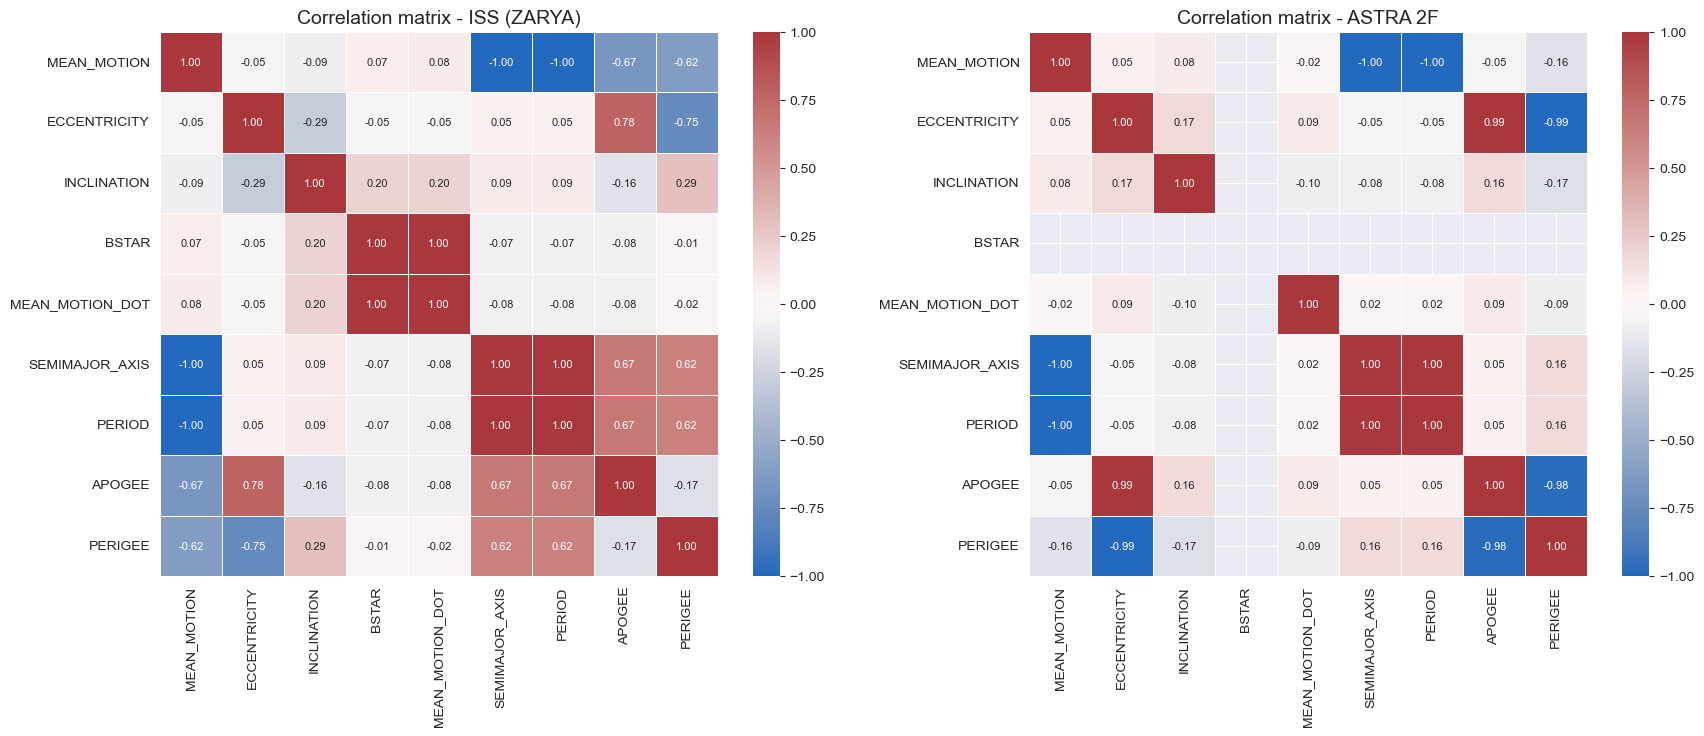

In [9]:
key_cols = ['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'BSTAR',
            'MEAN_MOTION_DOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOGEE', 'PERIGEE']
matrice_corr_comparative(df_combined, key_cols)

# Physical Relationships Between Orbital Variables

---

### **Period – Semimajor Axis (Kepler's Third Law)**
$$
T = 2\pi \sqrt{\frac{a^3}{\mu}}
$$
- $ T $: Orbital period (**PERIOD**)
- $ a $: Semimajor axis (**SEMIMAJOR_AXIS**)
- $ \mu = GM $: Standard gravitational parameter of the central body (Earth for satellites)

---

### **Mean Motion – Semimajor Axis**
$$
n = \sqrt{\frac{\mu}{a^3}}
$$
- $ n $: Mean motion (**MEAN_MOTION**), or the number of orbits per unit time

---

### **Period – Mean Motion**
$$
T = \frac{2\pi}{n}
$$

---

### **Apogee, Perigee, Semimajor Axis, and Eccentricity**
$$
\begin{align*}
r_{\text{apogee}} &= a(1 + e) \\
r_{\text{perigee}} &= a(1 - e)
\end{align*}
$$
- $ e $: Eccentricity (**ECCENTRICITY**)
- $ r_{\text{apogee}} $: Apogee distance (**APOGEE**)
- $ r_{\text{perigee}} $: Perigee distance (**PERIGEE**)

---

### **Mean Motion Variation ($\dot{n}$), Drag (BSTAR), and Altitude Decay**
- $\dot{n}$ (**MEAN_MOTION_DOT**) and **BSTAR** (drag coefficient) describe the rate of orbital decay due to atmospheric drag, affecting the semimajor axis and thus the period over time:
$$
\frac{da}{dt} \sim -\frac{2a^2}{n\mu} F_D
$$
- The drag force $ F_D $ is modeled using **BSTAR**.

---

## 2. Orbital Trajectories Visualization Over Time

In [10]:
def plot_traj_orbitale_comparative(df_combined, feature):

    print(f"Displaying evolution of: {feature}")

    g = sns.relplot(
        data=df_combined,
        x='EPOCH',
        y=feature,
        hue='OBJECT_NAME',
        col='OBJECT_NAME',
        col_wrap=2,
        kind='line',
        height=4,
        aspect=2,
        palette='tab10',
        lw=1,
        facet_kws={'sharey': False, 'sharex': True}
    )

    g.fig.suptitle(f'Temporal evolution of {feature} (by Object)', y=1.03, fontsize=16)
    g.set_axis_labels('Date (EPOCH)', feature)

    plt.show()

Displaying evolution of: APOGEE


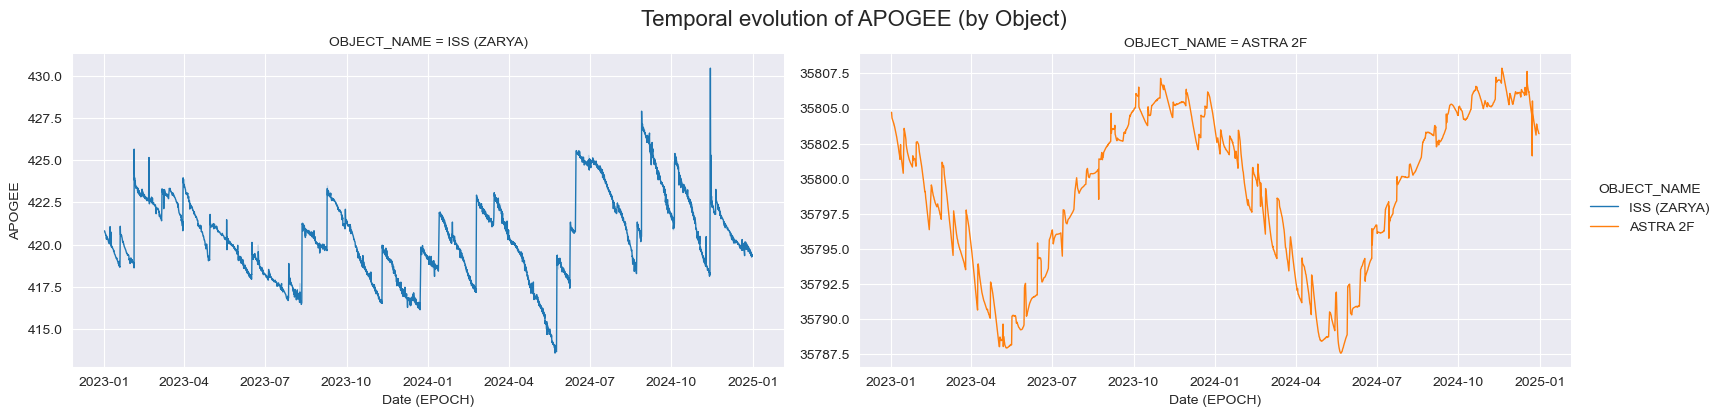

Displaying evolution of: PERIGEE


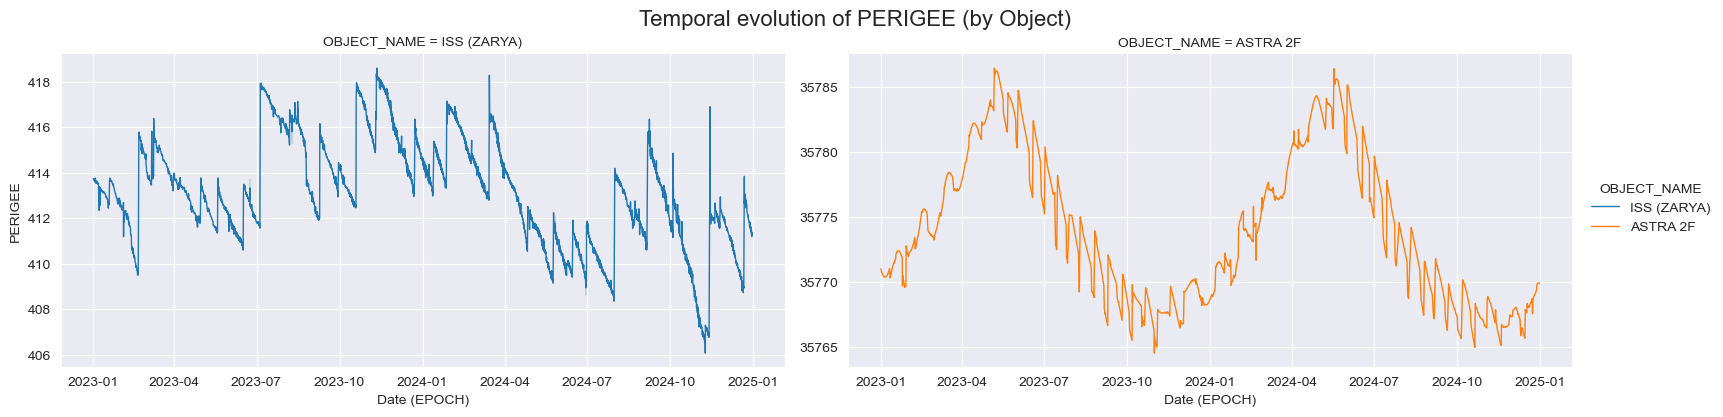

Displaying evolution of: MEAN_MOTION


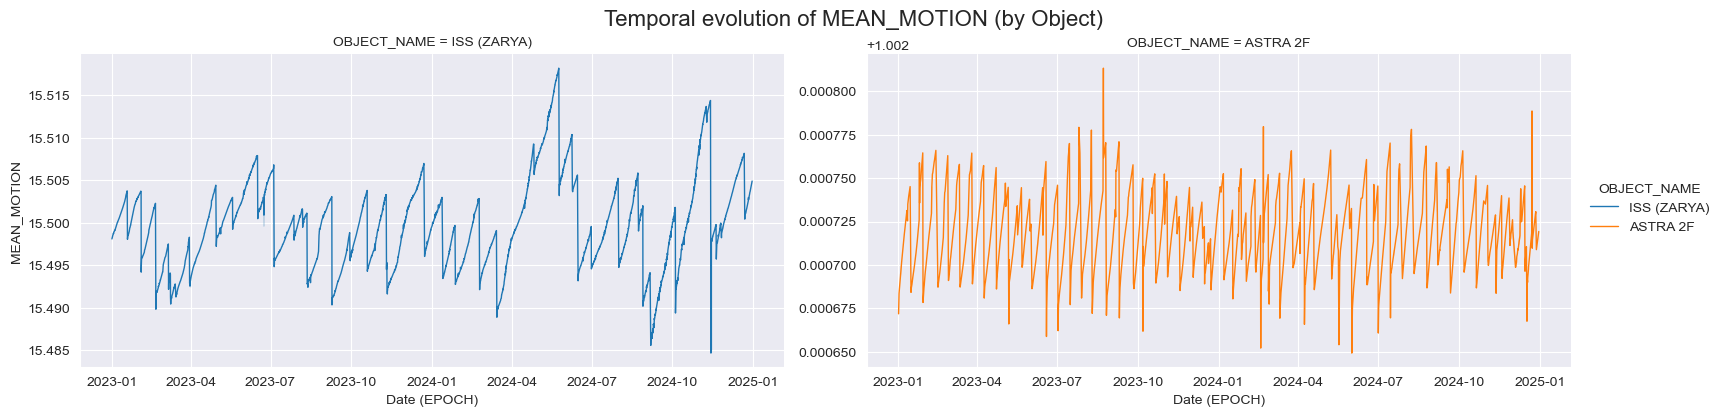

Displaying evolution of: ECCENTRICITY


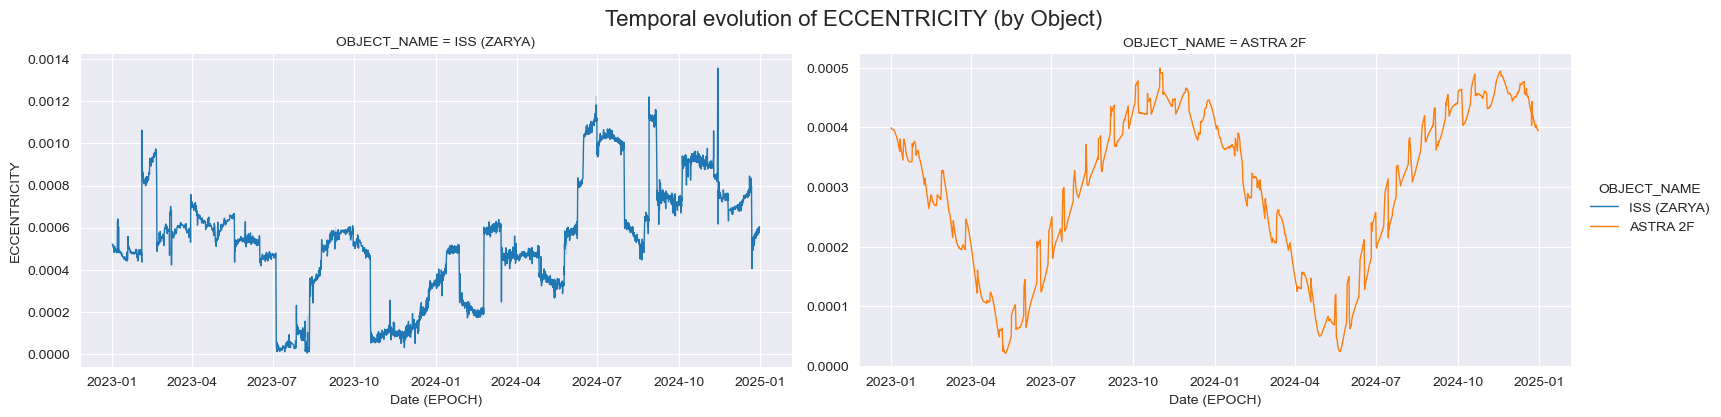

In [11]:
plot_traj_orbitale_comparative(df_combined, "APOGEE")
plot_traj_orbitale_comparative(df_combined, "PERIGEE")
plot_traj_orbitale_comparative(df_combined, "MEAN_MOTION")
plot_traj_orbitale_comparative(df_combined, "ECCENTRICITY")

## 3. Data Quality: The Histogram of Temporal Gaps

=== ANALYSIS FOR 2 OBJETS ===

--- ISS (ZARYA) ---
Average gap:   4.16h
Median gap:    3.47h
Min gap:       0.00h
Max gap:       58.75h
Standard dev:  3.28h
Number of TLE: 4208

--- ASTRA 2F ---
Average gap:   11.39h
Median gap:    9.34h
Min gap:       0.98h
Max gap:       91.21h
Standard dev:  8.07h
Number of TLE: 1537



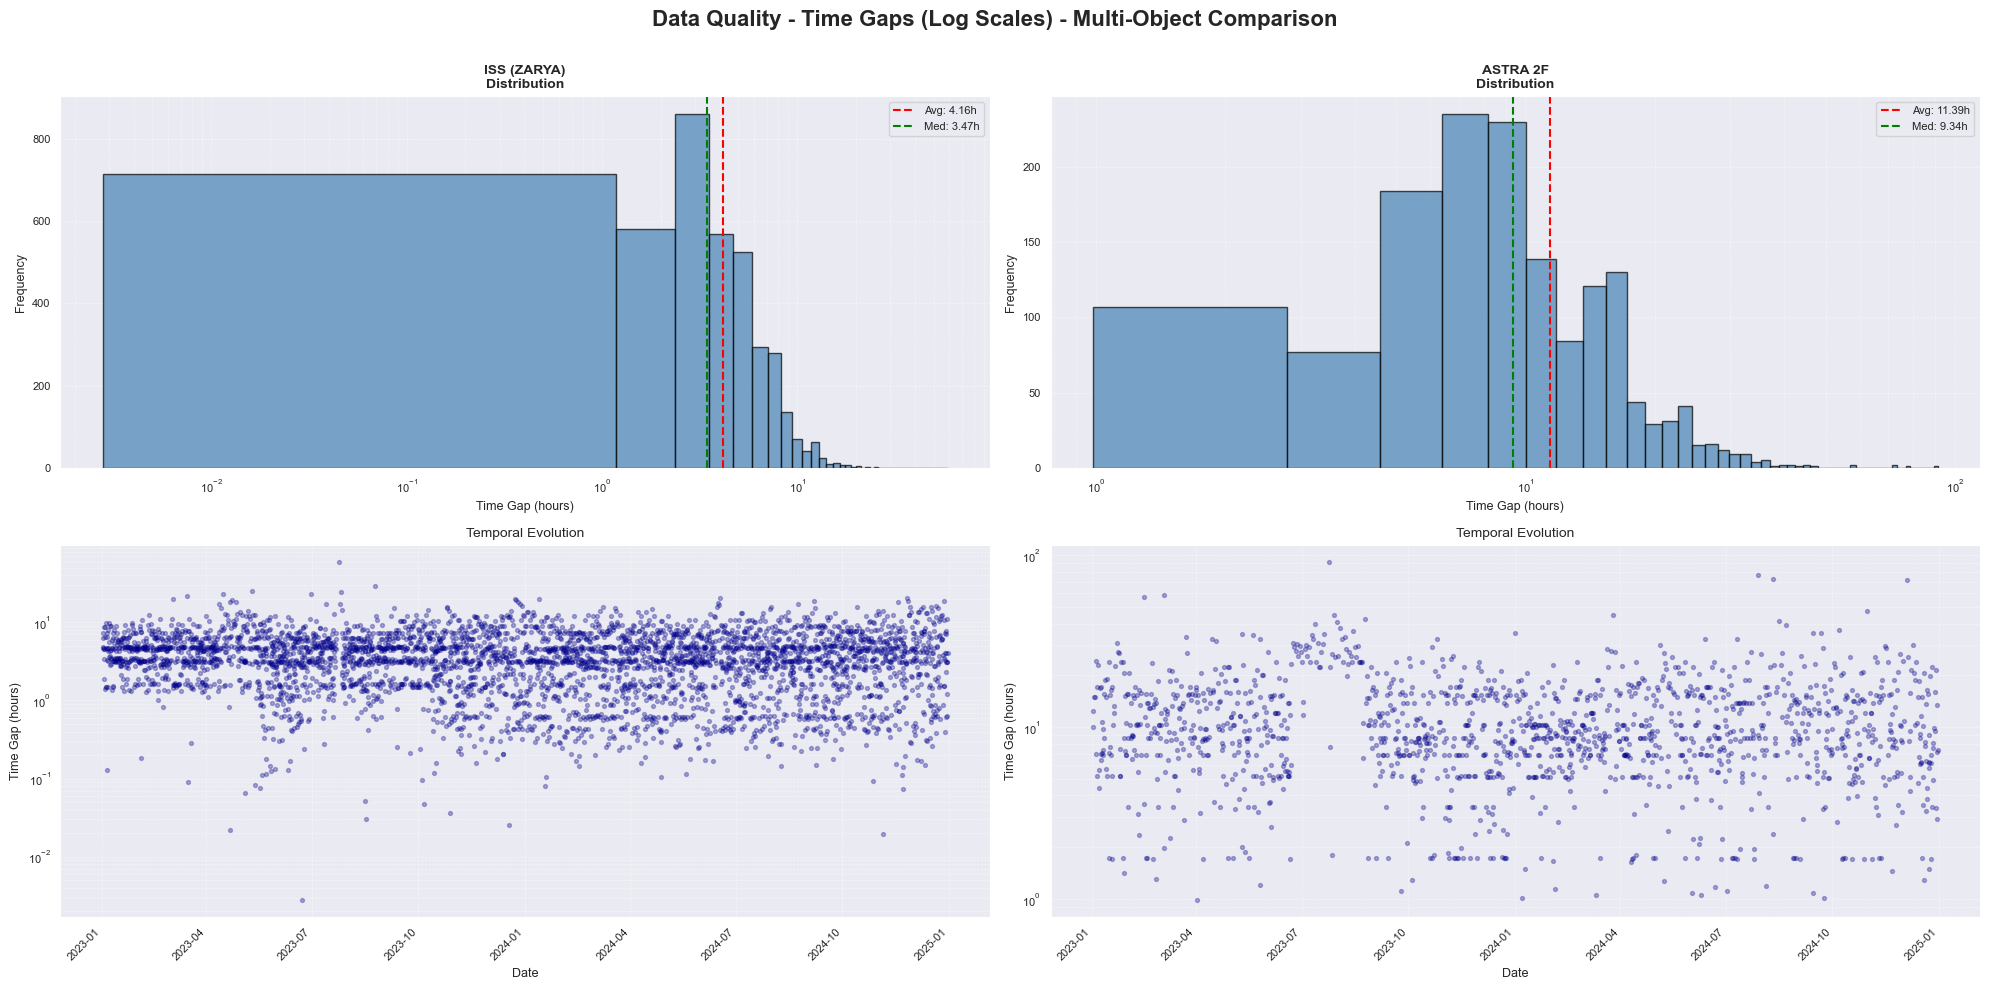

In [12]:
def histo_ecart_tempo_multi(df_combined):

    objects = df_combined['OBJECT_NAME'].unique()
    n_objects = len(objects)

    print(f"=== ANALYSIS FOR {n_objects} OBJETS ===\n")

    fig = plt.figure(figsize=(20, 10))

    for idx, obj_name in enumerate(objects):
        df_obj = df_combined[df_combined['OBJECT_NAME'] == obj_name].copy()
        df_obj = df_obj.sort_values('EPOCH').reset_index(drop=True)

        time_diffs_hours = df_obj['EPOCH'].diff().dt.total_seconds() / 3600

        clean_time_diffs = time_diffs_hours.dropna()
        clean_time_diffs = clean_time_diffs[clean_time_diffs > 0]

        aligned_dates = df_obj['EPOCH'][clean_time_diffs.index]

        mean_val = clean_time_diffs.mean()
        median_val = clean_time_diffs.median()
        min_val = clean_time_diffs.min()
        max_val = clean_time_diffs.max()
        std_val = clean_time_diffs.std()

        print(f'--- {obj_name} ---')
        print(f'Average gap:   {mean_val:.2f}h')
        print(f'Median gap:    {median_val:.2f}h')
        print(f'Min gap:       {min_val:.2f}h')
        print(f'Max gap:       {max_val:.2f}h')
        print(f'Standard dev:  {std_val:.2f}h')
        print(f'Number of TLE: {len(clean_time_diffs)}\n')

        ax1 = plt.subplot(2, n_objects, idx + 1)
        ax1.hist(clean_time_diffs, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        ax1.set_xlabel('Time Gap (hours)', fontsize=9)
        ax1.set_ylabel('Frequency', fontsize=9)
        ax1.set_title(f'{obj_name}\nDistribution', fontsize=10, fontweight='bold')
        ax1.set_xscale('log')
        ax1.axvline(mean_val, color='red', linestyle='--', linewidth=1.5,
                    label=f'Avg: {mean_val:.2f}h')
        ax1.axvline(median_val, color='green', linestyle='--', linewidth=1.5,
                    label=f'Med: {median_val:.2f}h')
        ax1.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
        ax1.legend(fontsize=8)
        ax1.tick_params(labelsize=8)

        ax2 = plt.subplot(2, n_objects, n_objects + idx + 1)
        ax2.scatter(aligned_dates, clean_time_diffs, alpha=0.3, s=8, color='darkblue')
        ax2.set_xlabel('Date', fontsize=9)
        ax2.set_ylabel('Time Gap (hours)', fontsize=9)
        ax2.set_title('Temporal Evolution', fontsize=10)
        ax2.set_yscale('log')
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=7)
        ax2.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5)
        ax2.tick_params(labelsize=8)

    plt.suptitle('Data Quality - Time Gaps (Log Scales) - Multi-Object Comparison',
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0, 0.01, 1, 0.99])
    plt.show()

histo_ecart_tempo_multi(df_combined)

## 4. Distributions (KDE)

In [13]:
def kde_distrib_comparative(df_combined, feature):
    print(f"--- Distribution analysis: {feature} ---")

    g = sns.displot(
        data=df_combined,
        x=feature,
        col="OBJECT_NAME",
        col_wrap=3,
        kind="kde",
        fill=True,
        rug=False,
        height=4,
        aspect=1.5,
        facet_kws={'sharex': False, 'sharey': False}
    )

    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Comparative distribution of: {feature}', fontsize=16)

    for ax in g.axes.flat:
        # Bug with groupby which order is not guaranteed
        title = ax.get_title()
        obj_name = title.split('=')[-1].strip()
        sub_df = df_combined[df_combined["OBJECT_NAME"] == obj_name]
        mean_val = sub_df[feature].mean()
        std_val = sub_df[feature].std()
        ax.text(0.95, 0.95, f'μ={mean_val:.6f}\nσ={std_val:.6f}',
                transform=ax.transAxes, ha='right', va='top', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    plt.show()

--- Distribution analysis: MEAN_MOTION ---


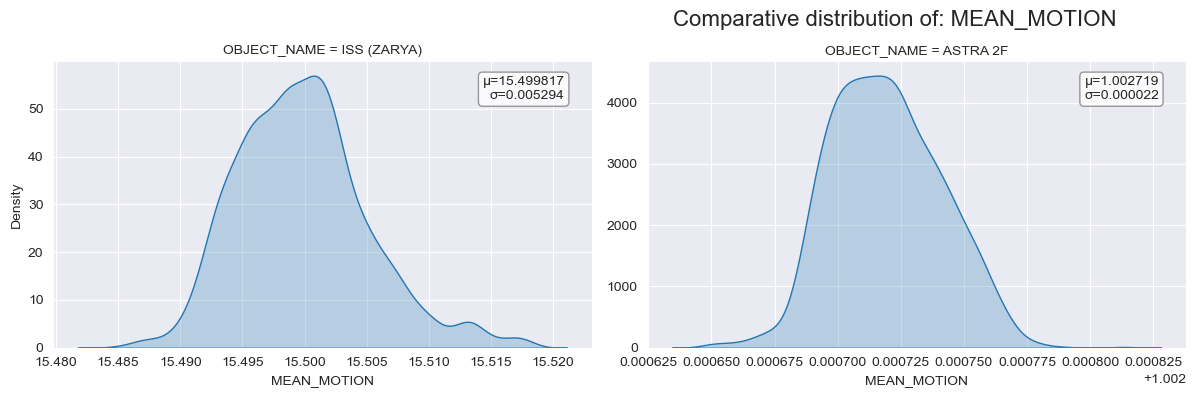

--- Distribution analysis: ECCENTRICITY ---


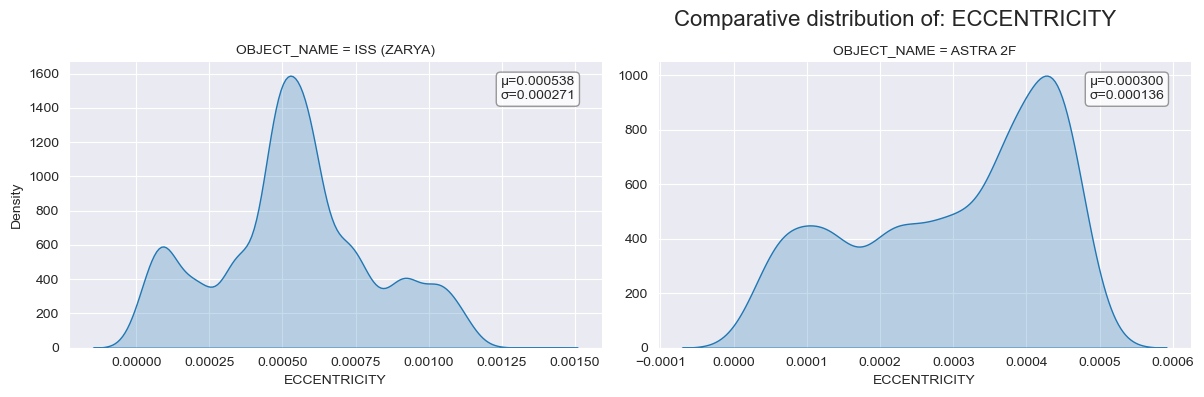

--- Distribution analysis: INCLINATION ---


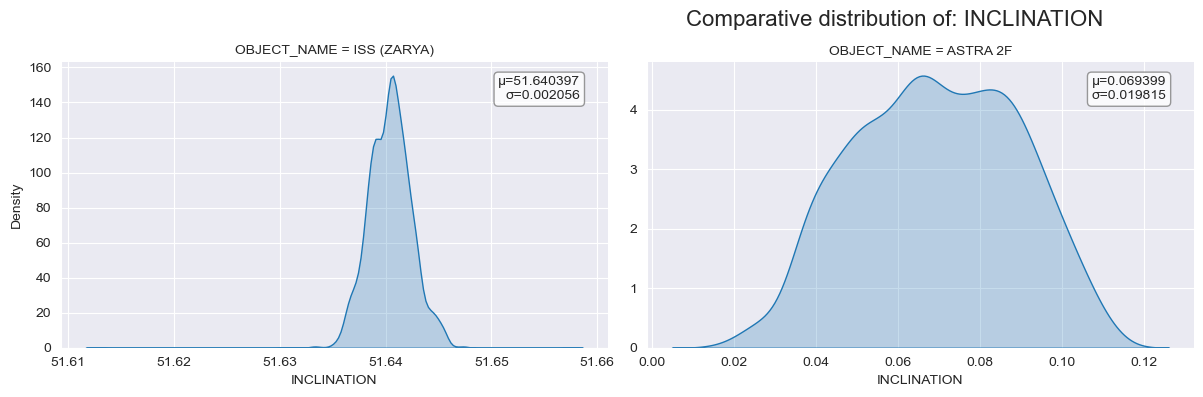

In [14]:
kde_distrib_comparative(df_combined, 'MEAN_MOTION')
kde_distrib_comparative(df_combined, 'ECCENTRICITY')
kde_distrib_comparative(df_combined, 'INCLINATION')


## 5. Scatter Plots

In [15]:
def scatter_plot_comparative(df_combined, feature1, feature2):
    g = sns.relplot(
        data=df_combined,
        x=feature1,
        y=feature2,
        hue='OBJECT_NAME',
        col='OBJECT_NAME',
        col_wrap=2,
        palette='tab10',
        alpha=0.6,
        facet_kws={'sharey': False, 'sharex': False}
    )
    g.fig.suptitle(f'{feature1} vs {feature2} (by Objet)', y=1.03, fontsize=16)

    plt.show()

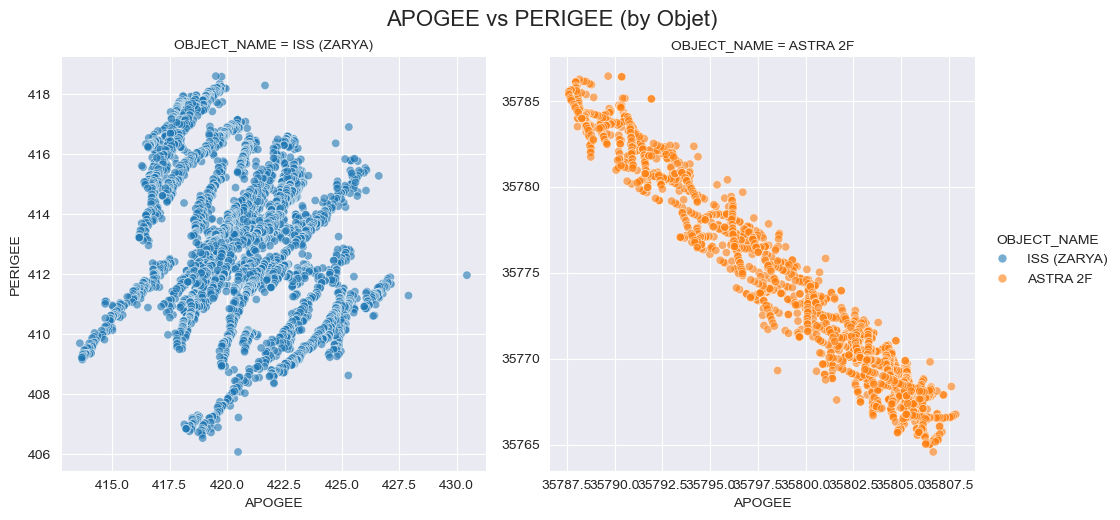

In [16]:
scatter_plot_comparative(df_combined, 'APOGEE', 'PERIGEE')

## 6. Polar Chart

In [17]:
def plot_polar_raan_comparative_with_epoch(df_combined):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='polar')

    objects = df_combined['OBJECT_NAME'].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(objects)))

    for i, obj in enumerate(objects):
        df_obj = df_combined[df_combined['OBJECT_NAME'] == obj]

        theta = np.deg2rad(df_obj['RA_OF_ASC_NODE'])

        epoch_numeric = df_obj['EPOCH'].astype(np.int64)

        min_epoch = epoch_numeric.min()
        max_epoch = epoch_numeric.max()

        if max_epoch == min_epoch:
             r = np.full_like(theta, 1.0)
        else:
             r = 0.2 + 0.8 * (epoch_numeric - min_epoch) / (max_epoch - min_epoch)

        ax.scatter(theta, r, label=obj, s=10, alpha=0.7, color=colors[i])

    ax.set_title("Orbital Precession: RAAN vs. Time (Epoch)", va='bottom', fontsize=16)

    ax.set_rticks([0.2, 0.6, 1.0])
    ax.set_rlabel_position(22.5)
    ax.set_rlim(0, 1.1)

    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    plt.legend(bbox_to_anchor=(1.1, 1.1))
    plt.show()

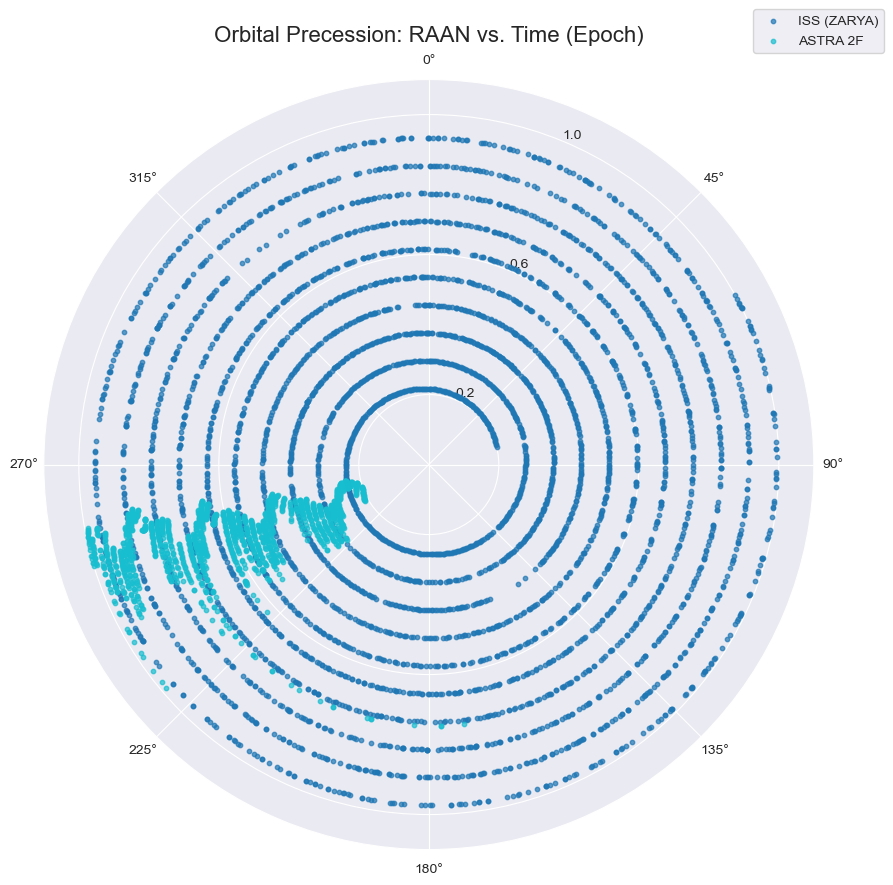

In [18]:
plot_polar_raan_comparative_with_epoch(df_combined)

## 7. Feature Engineering : Création de features avancées

In [19]:
print("="*70)
print("🔧 FEATURE ENGINEERING")
print("="*70)

def compute_temporal_features(df):
    """Calcule les variations temporelles des paramètres orbitaux"""
    df = df.copy()
    df = df.sort_values('EPOCH').reset_index(drop=True)

    # Calculer les deltas temporels (en heures)
    df['TIME_DELTA'] = df['EPOCH'].diff().dt.total_seconds() / 3600

    # Features à dériver temporellement
    orbital_params = ['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION',
                      'SEMIMAJOR_AXIS', 'APOGEE', 'PERIGEE']

    for param in orbital_params:
        # Taux de variation (dérivée première)
        df[f'{param}_RATE'] = df[param].diff() / df['TIME_DELTA']

        # Accélération (dérivée seconde)
        df[f'{param}_ACCEL'] = df[f'{param}_RATE'].diff() / df['TIME_DELTA']

        # Moving averages (fenêtre de 10 observations)
        df[f'{param}_MA10'] = df[param].rolling(window=10, min_periods=1).mean()

        # Écart par rapport à la moyenne mobile
        df[f'{param}_DEV_MA'] = df[param] - df[f'{param}_MA10']

    return df

def compute_orbital_energy(df):
    """Calcule l'énergie orbitale spécifique"""
    df = df.copy()
    # E = -μ / (2a) où μ = 398600.4418 km³/s² (constante gravitationnelle terrestre)
    mu = 398600.4418
    df['ORBITAL_ENERGY'] = -mu / (2 * df['SEMIMAJOR_AXIS'])
    df['ENERGY_RATE'] = df['ORBITAL_ENERGY'].diff() / df['TIME_DELTA']
    return df

def compute_angular_features(df):
    """Traite les angles de manière circulaire"""
    df = df.copy()
    angular_params = ['RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY']

    for param in angular_params:
        # Conversion en coordonnées cartésiennes
        rad = np.deg2rad(df[param])
        df[f'{param}_SIN'] = np.sin(rad)
        df[f'{param}_COS'] = np.cos(rad)

        # Taux de variation angulaire
        diff_angle = df[param].diff()
        # Correction pour la discontinuité 0°/360°
        diff_angle = np.where(diff_angle > 180, diff_angle - 360, diff_angle)
        diff_angle = np.where(diff_angle < -180, diff_angle + 360, diff_angle)
        df[f'{param}_ANGULAR_RATE'] = diff_angle / df['TIME_DELTA']

    return df

def compute_orbit_shape_features(df):
    """Calcule des indicateurs de forme orbitale"""
    df = df.copy()

    # Distance focale
    df['FOCAL_DISTANCE'] = df['SEMIMAJOR_AXIS'] * df['ECCENTRICITY']

    # Périmètre orbital approximatif (formule de Ramanujan)
    a = df['SEMIMAJOR_AXIS']
    b = a * np.sqrt(1 - df['ECCENTRICITY']**2)
    h = ((a - b)**2) / ((a + b)**2)
    df['ORBIT_PERIMETER'] = np.pi * (a + b) * (1 + (3*h) / (10 + np.sqrt(4 - 3*h)))

    # Circularité
    df['CIRCULARITY'] = 1 - df['ECCENTRICITY']

    return df

def compute_drag_indicators(df):
    """Calcule des indicateurs liés à la traînée atmosphérique"""
    df = df.copy()
    df['BSTAR_RATE'] = df['BSTAR'].diff() / df['TIME_DELTA']
    df['ALTITUDE_DECAY'] = -df['SEMIMAJOR_AXIS_RATE']
    return df

def compute_statistical_features(df, window=20):
    """Calcule des statistiques roulantes"""
    df = df.copy()
    key_params = ['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION']

    for param in key_params:
        df[f'{param}_STD{window}'] = df[param].rolling(window=window, min_periods=1).std()
        df[f'{param}_MIN{window}'] = df[param].rolling(window=window, min_periods=1).min()
        df[f'{param}_MAX{window}'] = df[param].rolling(window=window, min_periods=1).max()
        df[f'{param}_RANGE{window}'] = df[f'{param}_MAX{window}'] - df[f'{param}_MIN{window}']

    return df

# Application du feature engineering sur l'ISS
print("\n🛰️  Application sur ISS (ZARYA)")
df_iss_enriched = df_iss.copy()
df_iss_enriched = compute_temporal_features(df_iss_enriched)
print("  ✓ Features temporelles créées")
df_iss_enriched = compute_orbital_energy(df_iss_enriched)
print("  ✓ Énergie orbitale calculée")
df_iss_enriched = compute_angular_features(df_iss_enriched)
print("  ✓ Features angulaires traitées")
df_iss_enriched = compute_orbit_shape_features(df_iss_enriched)
print("  ✓ Features de forme orbitale créées")
df_iss_enriched = compute_drag_indicators(df_iss_enriched)
print("  ✓ Indicateurs de traînée calculés")
df_iss_enriched = compute_statistical_features(df_iss_enriched)
print("  ✓ Features statistiques roulantes créées")

# Suppression des NaN
initial_rows = len(df_iss_enriched)
df_iss_enriched = df_iss_enriched.dropna().reset_index(drop=True)
removed_rows = initial_rows - len(df_iss_enriched)
print(f"\n📊 Dataset final : {df_iss_enriched.shape[0]} lignes × {df_iss_enriched.shape[1]} colonnes")
print(f"  ({removed_rows} lignes avec NaN supprimées)")

🔧 FEATURE ENGINEERING

🛰️  Application sur ISS (ZARYA)
  ✓ Features temporelles créées
  ✓ Énergie orbitale calculée
  ✓ Features angulaires traitées
  ✓ Features de forme orbitale créées
  ✓ Indicateurs de traînée calculés
  ✓ Features statistiques roulantes créées

📊 Dataset final : 4094 lignes × 70 colonnes
  (446 lignes avec NaN supprimées)


In [20]:
df_iss_enriched.head()

NORAD_CAT_ID  OBJECT_NAME OBJECT_TYPE               EPOCH  \
0         25544  ISS (ZARYA)     PAYLOAD 2023-01-01 17:28:45   
1         25544  ISS (ZARYA)     PAYLOAD 2023-01-02 00:52:04   
2         25544  ISS (ZARYA)     PAYLOAD 2023-01-02 05:40:34   
3         25544  ISS (ZARYA)     PAYLOAD 2023-01-02 10:15:12   
4         25544  ISS (ZARYA)     PAYLOAD 2023-01-02 13:35:49   

   EPOCH_MICROSECONDS  MEAN_MOTION  ECCENTRICITY  INCLINATION  RA_OF_ASC_NODE  \
0              194304    15.498321      0.000515      51.6445         73.0716   
1              330272    15.498430      0.000516      51.6446         71.5466   
2              178880    15.498507      0.000513      51.6447         70.5542   
3              441312    15.498577      0.000513      51.6446         69.6092   
4              828416    15.498636      0.000503      51.6448         68.9190   

   ARG_OF_PERICENTER  ...  MEAN_MOTION_MAX20  MEAN_MOTION_RANGE20  \
0           212.0396  ...          15.498321             0.000210   
1           213.3191  ...          15.498430             0.000319   
2           214.4037  ...          15.498507             0.000397   
3           215.2634  ...          15.498577             0.000467   
4           218.0405  ...          15.498636             0.000526   

   ECCENTRICITY_STD20  ECCENTRICITY_MIN20  ECCENTRICITY_MAX20  \
0            0.000003            0.000515            0.000521   
1            0.000003            0.000515            0.000521   
2            0.000003            0.000513            0.000521   
3            0.000004            0.000513            0.000521   
4            0.000006            0.000503            0.000521   

   ECCENTRICITY_RANGE20  INCLINATION_STD20  INCLINATION_MIN20  \
0              0.000006           0.000208            51.6444   
1              0.000006           0.000171            51.6444   
2              0.000008           0.000158            51.6444   
3              0.000008           0.000141            51.6444   
4              0.000018           0.000150            51.6444   

   INCLINATION_MAX20  INCLINATION_RANGE20  
0            51.6448               0.0004  
1            51.6448               0.0004  
2            51.6448               0.0004  
3            51.6448               0.0004  
4            51.6448               0.0004  

[5 rows x 70 columns]

In [21]:
import pandas as pd

# Convertir la colonne 'EPOCH' au format datetime si ce n'est pas déjà fait
# (Ceci est essentiel pour la sélection par date)
if not pd.api.types.is_datetime64_any_dtype(df_iss_enriched['EPOCH']):
    df_iss_enriched['EPOCH'] = pd.to_datetime(df_iss_enriched['EPOCH'])

# Définition des masques temporels selon votre plan :
# Train : Janvier 2023 à fin Octobre 2023
train_mask = (df_iss_enriched['EPOCH'] >= '2023-01-01') & (df_iss_enriched['EPOCH'] <= '2023-10-31')

# Validation : novembre–décembre 2023
val_mask = (df_iss_enriched['EPOCH'] >= '2023-11-01') & (df_iss_enriched['EPOCH'] <= '2023-12-31')

# Test : Novembre 2023 à toute l'année 2024
test_mask = (df_iss_enriched['EPOCH'] >= '2024-01-01')

# Création des DataFrames
df_train = df_iss_enriched[train_mask].copy()
df_val = df_iss_enriched[val_mask].copy()
df_test = df_iss_enriched[test_mask].copy()

print(f"✅ Séparation temporelle effectuée.")
print(f"   • Entraînement (df_train) : {len(df_train):,} lignes ({df_train['EPOCH'].min().date()} à {df_train['EPOCH'].max().date()})")
print(f"   • Validation (df_val) : {len(df_val):,} lignes ({df_val['EPOCH'].min().date()} → {df_val['EPOCH'].max().date()})")
print(f"   • Test (df_test)        : {len(df_test):,} lignes ({df_test['EPOCH'].min().date()} à {df_test['EPOCH'].max().date()})")

✅ Séparation temporelle effectuée.
   • Entraînement (df_train) : 1,621 lignes (2023-01-01 à 2023-10-30)
   • Validation (df_val) : 343 lignes (2023-11-01 → 2023-12-30)
   • Test (df_test)        : 2,119 lignes (2024-01-01 à 2024-12-30)


In [22]:

# =======================================================================
# 📌 CRÉATION DES LABELS DE VÉRITÉ TERRAIN
# =======================================================================
print("\n" + "="*70)
print("🔬 CRÉATION DES LABELS DE VÉRITÉ TERRAIN (GT_LABEL)")
print("="*70)

def create_ground_truth_labels(df, thresholds=None):
    """
    Crée des labels de vérité terrain basés sur des règles physiques expertes.

    Règles pour détecter une manœuvre/anomalie RÉELLE :
    1. Saut brutal d'altitude (SEMIMAJOR_AXIS_RATE)
    2. Changement significatif de MEAN_MOTION
    3. Variation brusque d'énergie orbitale
    4. Pic de BSTAR (traînée anormale)
    5. Changement brutal d'APOGEE ou PERIGEE

    Seuils calibrés pour l'ISS basés sur la physique orbitale :
    - Altitude ISS : a ≈ 6770 km
    - μ = 398600 km³/s²
    - Reboost typique ISS : +1 à +3 km
    - ΔE = μ/(2a²) × Δa ≈ 0.0043 km²/s² pour Δa = 1 km
    """

    if thresholds is None:
        # Seuils experts CORRIGÉS basés sur la physique orbitale réelle
        thresholds = {
            # Altitude : reboost ISS typique = 0.2-1 km/h sur plusieurs heures
            'semimajor_rate': 0.1,        # km/h (détecte reboosts de >0.1 km/h)

            # Mean motion : inversement proportionnel à a^(3/2)
            # Pour Δa = 1 km : ΔMM ≈ -0.00003 rev/day/h
            'mean_motion_rate': 0.00003,  # rev/day/h

            # Énergie : CORRIGÉE selon calcul physique
            # Pour reboost de 1 km : ΔE ≈ 0.0043 km²/s²
            # Seuil à 0.003 pour détecter reboosts > 0.7 km
            'energy_rate': 0.003,         # km²/s² par heure (= 3000 m²/s²/h)

            # BSTAR : augmente durant manœuvres (moteurs allumés)
            'bstar_sigma': 2.5,           # écarts-types (plus sensible)

            # Apogee/Perigee : reboosts ISS changent altitude de 1-3 km
            'altitude_jump': 0.5,         # km de saut minimum détectable
            'apogee_jump': 0.8,           # km de saut d'apogée
            'perigee_jump': 0.8,          # km de saut de périgée

            # Accélération : détecte phases de propulsion
            'accel_sigma': 2.5,           # écarts-types
        }

    print(f"\n🔧 Seuils de détection utilisés (calibrés pour ISS) :")
    print("-" * 70)
    print(f"   • Taux d'altitude (SEMIMAJOR_AXIS_RATE)  : > {thresholds['semimajor_rate']:.3f} km/h")
    print(f"   • Taux de mean motion                    : > {thresholds['mean_motion_rate']:.5f} rev/day/h")
    print(f"   • Taux d'énergie (CORRIGÉ)               : > {thresholds['energy_rate']:.4f} km²/s²/h")
    print(f"                                              (= {thresholds['energy_rate']*1e6:.0f} m²/s²/h)")
    print(f"   • BSTAR (pic de traînée)                 : > μ + {thresholds['bstar_sigma']:.1f}σ")
    print(f"   • Saut d'apogée                          : > {thresholds['apogee_jump']:.1f} km")
    print(f"   • Saut de périgée                        : > {thresholds['perigee_jump']:.1f} km")
    print(f"   • Accélération anormale                  : > {thresholds['accel_sigma']:.1f}σ")

    # Calculer statistiques pour seuils adaptatifs
    semimajor_std = df['SEMIMAJOR_AXIS_RATE'].std()
    mean_motion_std = df['MEAN_MOTION_RATE'].std()
    energy_std = df['ENERGY_RATE'].std()
    bstar_mean = df['BSTAR'].mean()
    bstar_std = df['BSTAR'].std()
    accel_std = df['SEMIMAJOR_AXIS_ACCEL'].std()

    print(f"\n📊 Statistiques des données (pour validation) :")
    print("-" * 70)
    print(f"   • SEMIMAJOR_AXIS_RATE std                : {semimajor_std:.4f} km/h")
    print(f"   • MEAN_MOTION_RATE std                   : {mean_motion_std:.6f} rev/day/h")
    print(f"   • ENERGY_RATE std                        : {energy_std:.4f} km²/s²/h")
    print(f"   • BSTAR mean ± std                       : {bstar_mean:.6f} ± {bstar_std:.6f}")
    print(f"   • SEMIMAJOR_AXIS_ACCEL std               : {accel_std:.6f} km/h²")

    # Détection de manœuvres par règles physiques
    conditions = []
    reasons = []

    # Règle 1 : Saut brutal d'altitude (CORRIGÉ)
    rule1 = np.abs(df['SEMIMAJOR_AXIS_RATE']) > thresholds['semimajor_rate']
    conditions.append(rule1)
    reasons.append('ALTITUDE_JUMP')

    # Règle 2 : Changement significatif de MEAN_MOTION (CORRIGÉ)
    rule2 = np.abs(df['MEAN_MOTION_RATE']) > thresholds['mean_motion_rate']
    conditions.append(rule2)
    reasons.append('MEAN_MOTION_CHANGE')

    # Règle 3 : Variation brusque d'énergie (CORRIGÉ PHYSIQUEMENT)
    rule3 = np.abs(df['ENERGY_RATE']) > thresholds['energy_rate']
    conditions.append(rule3)
    reasons.append('ENERGY_CHANGE')

    # Règle 4 : Pic de BSTAR (traînée anormale) - augmenté durant propulsion
    rule4 = df['BSTAR'] > (bstar_mean + thresholds['bstar_sigma'] * bstar_std)
    conditions.append(rule4)
    reasons.append('HIGH_DRAG')

    # Règle 5 : Saut d'APOGEE (CORRIGÉ)
    rule5 = np.abs(df['APOGEE'].diff()) > thresholds['apogee_jump']
    conditions.append(rule5)
    reasons.append('APOGEE_JUMP')

    # Règle 6 : Saut de PERIGEE (CORRIGÉ)
    rule6 = np.abs(df['PERIGEE'].diff()) > thresholds['perigee_jump']
    conditions.append(rule6)
    reasons.append('PERIGEE_JUMP')

    # Règle 7 : Accélération orbitale anormale (phase de propulsion)
    rule7 = np.abs(df['SEMIMAJOR_AXIS_ACCEL']) > thresholds['accel_sigma'] * accel_std
    conditions.append(rule7)
    reasons.append('ORBITAL_ACCELERATION')

    # Règle 8 BONUS : Variation combinée Apogée+Périgée (reboost typique)
    # ISS reboosts augmentent les deux altitudes
    apogee_increase = df['APOGEE'].diff() > thresholds['altitude_jump']
    perigee_increase = df['PERIGEE'].diff() > thresholds['altitude_jump']
    rule8 = apogee_increase & perigee_increase
    conditions.append(rule8)
    reasons.append('REBOOST_DETECTED')

    # Compter les détections par règle (diagnostic)
    print(f"\n🎯 Détections par règle (diagnostics) :")
    print("-" * 70)
    rule_names = [
        'Altitude Jump', 'Mean Motion Change', 'Energy Change (CORRIGÉ)',
        'High Drag', 'Apogee Jump', 'Perigee Jump',
        'Orbital Acceleration', 'Reboost (Apogee+Perigee)'
    ]
    for rule_name, condition in zip(rule_names, conditions):
        n_detections = condition.fillna(False).sum()
        print(f"   • {rule_name:30s} : {n_detections:4d} détections")

    # Combiner les règles (OR logique)
    ground_truth = np.zeros(len(df), dtype=bool)
    detection_reasons = [[] for _ in range(len(df))]

    for condition, reason in zip(conditions, reasons):
        matches = condition.fillna(False).values
        ground_truth |= matches
        for idx, match in enumerate(matches):
            if match:
                detection_reasons[idx].append(reason)

    # Convertir en labels (-1 = anomalie, 1 = normal)
    ground_truth_labels = np.where(ground_truth, -1, 1)

    return ground_truth_labels, detection_reasons


🔬 CRÉATION DES LABELS DE VÉRITÉ TERRAIN (GT_LABEL)


In [23]:
# Création des labels sur le Train (pour RandomizedSearchCV)
df_train.loc[:, 'GT_LABEL'], _ = create_ground_truth_labels(df_train)
print(f"   ✓ {np.sum(df_train['GT_LABEL'] == -1)} anomalies labellisées dans Train.")

df_val.loc[:, 'GT_LABEL'], val_detection_reasons = create_ground_truth_labels(df_val)
print(f"   ✓ {np.sum(df_val['GT_LABEL'] == -1)} anomalies labellisées dans Val.")

# Création des labels et récupération des RAISONS sur le Test Set (pour analyse et validation finale)
# Nous stockons les raisons ici pour l'analyse qui suit
df_test.loc[:, 'GT_LABEL'], test_detection_reasons = create_ground_truth_labels(df_test)
print(f"   ✓ {np.sum(df_test['GT_LABEL'] == -1)} anomalies labellisées dans Test.")


🔧 Seuils de détection utilisés (calibrés pour ISS) :
----------------------------------------------------------------------
   • Taux d'altitude (SEMIMAJOR_AXIS_RATE)  : > 0.100 km/h
   • Taux de mean motion                    : > 0.00003 rev/day/h
   • Taux d'énergie (CORRIGÉ)               : > 0.0030 km²/s²/h
                                              (= 3000 m²/s²/h)
   • BSTAR (pic de traînée)                 : > μ + 2.5σ
   • Saut d'apogée                          : > 0.8 km
   • Saut de périgée                        : > 0.8 km
   • Accélération anormale                  : > 2.5σ

📊 Statistiques des données (pour validation) :
----------------------------------------------------------------------
   • SEMIMAJOR_AXIS_RATE std                : nan km/h
   • MEAN_MOTION_RATE std                   : nan rev/day/h
   • ENERGY_RATE std                        : nan km²/s²/h
   • BSTAR mean ± std                       : 0.000292 ± 0.000755
   • SEMIMAJOR_AXIS_ACCEL std               

C:\Users\emili\anaconda3\envs\MachineLearning\lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\emili\anaconda3\envs\MachineLearning\lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\emili\anaconda3\envs\MachineLearning\lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [24]:

# =======================================================================
# 📊 ANALYSE DES RAISONS DE DÉTECTION
# =======================================================================

import pandas as pd
from collections import Counter
from sklearn.impute import SimpleImputer
import numpy as np

# Nous utilisons df_test, la variable 'test_detection_reasons' stockée ci-dessus
ground_truth_labels = df_test['GT_LABEL'].values
detection_reasons = test_detection_reasons

n_ground_truth_anomalies = np.sum(ground_truth_labels == -1)
print(f"\n📊 Application des règles physiques sur Test Set ({df_test['EPOCH'].min().date()} à {df_test['EPOCH'].max().date()})...")

print(f"\n✓ Vérité terrain créée")
print(f"  • Anomalies physiques détectées : {n_ground_truth_anomalies} ({n_ground_truth_anomalies/len(ground_truth_labels)*100:.2f}%)")

# Analyser les raisons de détection
all_reasons = [r for reasons_list in detection_reasons for r in reasons_list]
reason_counts = Counter(all_reasons)

print(f"\n📋 Répartition des raisons de détection (vérité terrain) :")
print("-" * 70)
for reason, count in reason_counts.most_common():
    print(f"  • {reason:30s} : {count:4d} détections")

X_train_full = df_train.drop(columns=['EPOCH', 'GT_LABEL'], errors='ignore').select_dtypes(include=np.number) 
X_val_full = df_val.drop(columns=['EPOCH', 'GT_LABEL'], errors='ignore').select_dtypes(include=np.number) 
X_test_full = df_test.drop(columns=['EPOCH', 'GT_LABEL'], errors='ignore').select_dtypes(include=np.number)

# Gérer les colonnes où il reste des NaN après le dropna initial
X_train_full = X_train_full.dropna(axis=1)
X_val_full = X_val_full[X_train_full.columns] 
X_test_full = X_test_full[X_train_full.columns] # Assurer la symétrie

X_train_full_cleaned = X_train_full.replace([np.inf, -np.inf], np.nan) 
X_val_full_cleaned = X_val_full.replace([np.inf, -np.inf], np.nan) 
X_test_full_cleaned = X_test_full.replace([np.inf, -np.inf], np.nan)

imputer = SimpleImputer(strategy='median') 
X_train_imputed = pd.DataFrame( imputer.fit_transform(X_train_full_cleaned), columns=X_train_full_cleaned.columns, index=X_train_full_cleaned.index ) 
X_val_imputed = pd.DataFrame( imputer.transform(X_val_full_cleaned), columns=X_val_full_cleaned.columns, index=X_val_full_cleaned.index ) 
X_test_imputed = pd.DataFrame( imputer.transform(X_test_full_cleaned), columns=X_test_full_cleaned.columns, index=X_test_full_cleaned.index )

## 2.1 Standardisation pour l'analyse de corrélation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_imputed.columns)

## 2.2 Trouver les paires hautement corrélées
correlation_matrix = X_train_scaled_df.corr().abs()

# Seuil de corrélation pour l'élimination (par exemple 0.85 pour supprimer une + gde proportion de données redondantes % à 0.95)
threshold = 0.85
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop_highly_correlated = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"🗑️  {len(to_drop_highly_correlated)} features éliminées pour forte corrélation (> {threshold*100}%) : {to_drop_highly_correlated}")

X_train_filtered = X_train_imputed.drop(columns=to_drop_highly_correlated)
X_val_filtered = X_val_imputed.drop(columns=to_drop_highly_correlated)
X_test_filtered = X_test_imputed.drop(columns=to_drop_highly_correlated)



📊 Application des règles physiques sur Test Set (2024-01-01 à 2024-12-30)...

✓ Vérité terrain créée
  • Anomalies physiques détectées : 834 (39.36%)

📋 Répartition des raisons de détection (vérité terrain) :
----------------------------------------------------------------------
  • MEAN_MOTION_CHANGE             :  833 détections
  • ALTITUDE_JUMP                  :  142 détections
  • ENERGY_CHANGE                  :   73 détections
  • PERIGEE_JUMP                   :   30 détections
  • APOGEE_JUMP                    :   18 détections
  • REBOOST_DETECTED               :   10 détections
🗑️  33 features éliminées pour forte corrélation (> 85.0%) : ['MEAN_MOTION_DOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'MEAN_MOTION_ACCEL', 'MEAN_MOTION_MA10', 'ECCENTRICITY_RATE', 'ECCENTRICITY_ACCEL', 'ECCENTRICITY_MA10', 'INCLINATION_ACCEL', 'INCLINATION_MA10', 'SEMIMAJOR_AXIS_RATE', 'SEMIMAJOR_AXIS_ACCEL', 'SEMIMAJOR_AXIS_MA10', 'SEMIMAJOR_AXIS_DEV_MA', 'APOGEE_RATE', 'APOGEE_ACCEL', 'APOGEE_MA10', 'PERI

In [25]:
# 2.3 Permutation importance
from sklearn.inspection import permutation_importance
from sklearn.ensemble import IsolationForest
import pandas as pd

# Calculer la Permutation Importance sur les scores de décision
# Ici, le score est le `decision_function` du modèle
print("\n🥇 Calcul de la Permutation Importance...")

# Entraîner un modèle simple sur les données filtrées
iso_forest_simple = IsolationForest(
    contamination=0.05,
    random_state=42
).fit(X_train_filtered)

# Obtenir les scores de décision (la cible que l'on veut maintenir)
decision_scores = iso_forest_simple.decision_function(X_train_filtered)

# Créer une cible factice (y_true) car la fonction permutation_importance l'exige
# et utiliser le score de décision comme premier argument (y_pred)
# Nous utilisons la négation de la MSE comme scorer.
# La fonction permutation_importance va essayer de prédire 'decision_scores'
# à partir de X_train_filtered.
# En permutant les colonnes, si le score de décision diminue (MSE augmente),
# cela signifie que la feature était importante.

r = permutation_importance(
    iso_forest_simple,
    X_train_filtered,
    decision_scores, # Score de décision
    scoring='neg_mean_squared_error',
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Trier et sélectionner les Top N features
sorted_idx = r.importances_mean.argsort()[::-1]
# Sélectionner par exemple les 30 meilleures features (N=30)
top_n = 30
selected_features_names = X_train_filtered.columns[sorted_idx[:top_n]].tolist()

print(f"✓ Permutation Importance calculée.")
print(f"🥇 Top {top_n} features par Permutation Importance : {selected_features_names}")

# Mise à jour de la liste de features pour le pipeline ML
X_features_ML_RIGOROUS = selected_features_names
print(f"🔢 Nombre final de features pour le Pipeline : {len(X_features_ML_RIGOROUS)}")

# On reprend la définition de X_train et X_test avec cette liste réduite
X_train = X_train_filtered[X_features_ML_RIGOROUS]
X_val = X_val_filtered[X_features_ML_RIGOROUS]
X_test = X_test_filtered[X_features_ML_RIGOROUS]


🥇 Calcul de la Permutation Importance...
✓ Permutation Importance calculée.
🥇 Top 30 features par Permutation Importance : ['APOGEE_DEV_MA', 'MEAN_MOTION_STD20', 'MEAN_MOTION_RATE', 'INCLINATION_STD20', 'ECCENTRICITY_STD20', 'MEAN_MOTION_DEV_MA', 'RA_OF_ASC_NODE_ANGULAR_RATE', 'ECCENTRICITY_DEV_MA', 'MEAN_ANOMALY_ANGULAR_RATE', 'INCLINATION_MIN20', 'INCLINATION_RATE', 'ARG_OF_PERICENTER_ANGULAR_RATE', 'ARG_OF_PERICENTER', 'RA_OF_ASC_NODE_SIN', 'ECCENTRICITY', 'MEAN_MOTION_MAX20', 'BSTAR', 'PERIGEE', 'PERIGEE_DEV_MA', 'INCLINATION_DEV_MA', 'ARG_OF_PERICENTER_COS', 'ARG_OF_PERICENTER_SIN', 'TIME_DELTA', 'MEAN_ANOMALY', 'RA_OF_ASC_NODE', 'MEAN_MOTION', 'APOGEE', 'RA_OF_ASC_NODE_COS', 'INCLINATION', 'MEAN_ANOMALY_COS']
🔢 Nombre final de features pour le Pipeline : 30


## 8. Preprocessing : Normalisation des données

In [26]:
from sklearn.preprocessing import RobustScaler
import numpy as np

print("\n" + "="*70)
print("⚙️  PREPROCESSING ET NORMALISATION")
print("="*70)

# Colonnes à exclure de la normalisation
exclude_cols = ['NORAD_CAT_ID', 'OBJECT_NAME', 'OBJECT_TYPE', 'EPOCH', 'EPOCH_MICROSECONDS']

print(f"\n📊 {len(X_features_ML_RIGOROUS)} features sélectionnées")

# Vérification finale
assert not X_train.isnull().any().any(), "Il reste des NaN dans X_train_imputed!"
assert not np.isinf(X_train.values).any(), "Il reste des inf dans X_train_imputed!"
assert not X_val.isnull().any().any(), "Il reste des NaN dans X_val_imputed!"
assert not np.isinf(X_val.values).any(), "Il reste des inf dans X_val_imputed!"
assert not X_test.isnull().any().any(), "Il reste des NaN dans X_test_imputed!"
assert not np.isinf(X_test.values).any(), "Il reste des inf dans X_test_imputed!"
print("✓ Données nettoyées et validées avant Normalisation")

# Sauvegarder les métadonnées
metadata_cols = ['NORAD_CAT_ID', 'OBJECT_NAME', 'OBJECT_TYPE', 'EPOCH']
df_metadata = df_train[metadata_cols].copy()

# Normalisation avec RobustScaler
print("\n🔧 Normalisation en cours...")
scaler = RobustScaler()
# Apprentissage du scaler sur l'ensemble d'ENTRAÎNEMENT SEUL
scaler.fit(X_train)

# Appliquer la transformation
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_features_ML_RIGOROUS,
    index=X_train.index
)

X_val_scaled = pd.DataFrame(
    scaler.transform(X_val), # Transformation du Test sans ré-apprendre
    columns=X_features_ML_RIGOROUS,
    index=X_val.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test), # Transformation du Test sans ré-apprendre
    columns=X_features_ML_RIGOROUS,
    index=X_test.index
)

print(f"✓ Normalisation (RobustScaler) appliquée sans fuite de données.")



⚙️  PREPROCESSING ET NORMALISATION

📊 30 features sélectionnées
✓ Données nettoyées et validées avant Normalisation

🔧 Normalisation en cours...
✓ Normalisation (RobustScaler) appliquée sans fuite de données.


In [27]:
# Les indices de y_train_gt, y_val_gt et y_test_gt doivent correspondre aux indices de X_train_scaled, X_val_scaled et X_test_scaled
# Nous utilisons les indices des matrices X_scaled/imputed/etc. pour garantir la symétrie.

# Utiliser X_train_imputed/filtered et X_test_imputed/filtered pour l'indexation
y_train_gt = df_train.loc[X_train.index, 'GT_LABEL'].values
y_val_gt = df_val.loc[X_val.index, 'GT_LABEL'].values
y_test_gt = df_test.loc[X_test.index, 'GT_LABEL'].values

print(f"\n📈 Dimensions finales Train: {X_train_scaled.shape[0]:,} lignes × {X_train_scaled.shape[1]} features") 
print(f"📈 Dimensions finales Val: {X_val_scaled.shape[0]:,} lignes × {X_val_scaled.shape[1]} features") 
print(f"📈 Dimensions finales Test: {X_test_scaled.shape[0]:,} lignes × {X_test_scaled.shape[1]} features") 
print(f"✓ Les variables X_train_scaled, X_val_scaled, X_test_scaled, y_train_gt, y_val_gt et y_test_gt sont prêtes pour la modélisation.")

# Vérification (optionnel)
n_anomalies_train = np.sum(y_train_gt == -1)
n_anomalies_val = np.sum(y_val_gt == -1)
n_anomalies_test = np.sum(y_test_gt == -1)
print(f"✅ Labels de Vérité Terrain extraits.")
print(f"   • Entraînement : {len(y_train_gt):,} échantillons ({n_anomalies_train} anomalies)")
print(f"   • Val : {len(y_val_gt):,} échantillons ({n_anomalies_val} anomalies)")
print(f"   • Test : {len(y_test_gt):,} échantillons ({n_anomalies_test} anomalies)")


📈 Dimensions finales Train: 1,621 lignes × 30 features
📈 Dimensions finales Val: 343 lignes × 30 features
📈 Dimensions finales Test: 2,119 lignes × 30 features
✓ Les variables X_train_scaled, X_val_scaled, X_test_scaled, y_train_gt, y_val_gt et y_test_gt sont prêtes pour la modélisation.
✅ Labels de Vérité Terrain extraits.
   • Entraînement : 1,621 échantillons (322 anomalies)
   • Val : 343 échantillons (127 anomalies)
   • Test : 2,119 échantillons (834 anomalies)


## 9. Détection d'Anomalies : Comparaison de modèles

In [28]:
from sklearn.cluster import DBSCAN


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

print("\n" + "="*70)
print("🎯 DÉFINITION DU PIPELINE ET DE L'ESPACE DE RECHERCHE")
print("="*70)

# Définition du pré-processeur
preprocessor = Pipeline([
    ('pca', PCA(random_state=42)) 
])

# Pipeline générique avec un slot pour le modèle final
pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', IsolationForest(random_state=42)) # IsolationForest par défaut
])

# Définir l'espace de recherche (y compris les 5 modèles demandés)
param_distributions = [
    # ----------------------------------------------------
    # 1. Isolation Forest (Basé sur les arbres)
    # ----------------------------------------------------
    {
        'model': [IsolationForest(random_state=42)],
        # Contamination : % estimé d'anomalies
        'model__contamination': [0.005, 0.01, 0.02, 0.05],
        'model__n_estimators': [50, 100, 200], 
        'preprocess__pca__n_components': [0.85, 0.90, 0.95] # Variance conservée
    },

    # ----------------------------------------------------
    # 2. One-Class SVM (Basé sur la distance/hypersphère)
    # ----------------------------------------------------
    {
        'model': [OneClassSVM(kernel='rbf', gamma='auto')],
        # Nu : Borne supérieure sur la fraction d'erreurs d'entraînement (similaire à contamination)
        'model__nu': loguniform(1e-4, 0.1), # Réduit la plage pour une meilleure convergence
        'model__kernel': ['rbf'],
        'preprocess__pca__n_components': [0.85, 0.90, 0.95]
    },

    # ----------------------------------------------------
    # 3. Elliptic Envelope (Basé sur la densité/covariance)
    # ----------------------------------------------------
    {
        'model': [EllipticEnvelope(random_state=42)],
        'model__contamination': [0.005, 0.01, 0.02, 0.05],
        'model__support_fraction': [0.7, 0.8, 0.9, 1.0],
        'preprocess__pca__n_components': [0.85, 0.90, 0.95]
    },
    
    # ----------------------------------------------------
    # 4. Local Outlier Factor (LOF) (Basé sur la densité locale)
    # ----------------------------------------------------
    {
        # LOF supporte le paramètre 'contamination' pour prédire les labels
        'model': [LocalOutlierFactor(n_neighbors=20, novelty=True, n_jobs=-1)],
        'model__contamination': [0.005, 0.01, 0.02, 0.05],
        'model__n_neighbors': [10, 20, 50, 100],
        'preprocess__pca__n_components': [0.85, 0.90, 0.95]
    },
    
    # ----------------------------------------------------
    # 5. DBSCAN (Basé sur la densité et le clustering)
    # ----------------------------------------------------
    # ATTENTION : DBSCAN ne renvoie pas directement des labels -1/1 pour les non-outliers.
    # Il renvoie les clusters (0, 1, 2, ...) et le bruit (-1).
    # Il est très sensible à la normalisation. Nous le testons avec des hyperparamètres fixes.
    {
        'model': [DBSCAN(n_jobs=-1)],
        # eps (epsilon) est la distance critique, min_samples est la densité
        'model__eps': loguniform(0.1, 10), 
        'model__min_samples': [5, 10, 20],
        'preprocess__pca__n_components': [0.85, 0.90, 0.95]
    }
]


🎯 DÉFINITION DU PIPELINE ET DE L'ESPACE DE RECHERCHE


In [29]:
# ======================================================================
# 🔹 COMPARAISON DES MODÈLES NON-SUPERVISÉS AVEC ÉVALUATION SUPERVISÉE
# ======================================================================

from sklearn.base import clone
from sklearn.metrics import f1_score, precision_score, recall_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np

print("\n" + "="*70)
print("⚖️  COMPARAISON DES MODÈLES NON-SUPERVISÉS")
print("="*70)

# Stocker les résultats
results = []

# Générateur pour paramètres aléatoires (RandomizedSearch style)
rng = np.random.default_rng(42)

def sample_params(block):
    """Tirer une configuration aléatoire dans le bloc de param_distributions"""
    params = {}
    for k, v in block.items():
        if k == 'model':
            params['model'] = rng.choice(v)
        else:
            if isinstance(v, list):
                params[k] = rng.choice(v)
            elif hasattr(v, 'rvs'):
                r = v.rvs()
                params[k] = float(r) if np.shape(r) == () else float(r[0])
            else:
                params[k] = v
    return params

def build_pipeline_from_params(params, preprocessor):
    """Créer pipeline avec hyperparamètres appliqués"""
    model = clone(params['model'])
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    for k, v in params.items():
        if k != 'model':
            pipe.set_params(**{k: v})
    return pipe

def get_labels(pipe, X):
    """Obtenir les labels prédits (-1 pour anomalie, 1 pour normal)"""
    model_inner = pipe['model']
    X_emb = pipe['preprocess'].transform(X)

    if hasattr(model_inner, 'fit_predict'):
        labels = model_inner.fit_predict(X_emb)
    elif hasattr(model_inner, 'predict'):
        model_inner.fit(X_emb)
        labels = model_inner.predict(X_emb)
    else:
        labels = np.ones(X.shape[0])
    # Normaliser : DBSCAN/LOF renvoient -1 pour anomalies, d'autres peuvent avoir 0/1
    labels = np.where(labels == -1, -1, 1)
    return labels

# Paramètres
n_iter_per_model = 15  # nombre d'essais aléatoires par modèle

# Boucle sur chaque bloc de modèles
for block in param_distributions:
    for i in range(n_iter_per_model):
        sampled_params = sample_params(block)
        pipe = build_pipeline_from_params(sampled_params, preprocessor)

        try:
            # Fit sur X_train
            pipe.fit(X_train_scaled)

            # Obtenir labels non supervisés
            y_val_pred = get_labels(pipe, X_val_scaled)

            # Évaluer avec labels de vérité terrain
            f1 = f1_score(y_val_gt, y_val_pred, pos_label=-1)
            precision = precision_score(y_val_gt, y_val_pred, pos_label=-1)
            recall = recall_score(y_val_gt, y_val_pred, pos_label=-1)

            # Évaluer qualité non-supervisée (silhouette, CH, DB)
            X_val_emb = pipe['preprocess'].transform(X_val_scaled)
            if len(set(y_val_pred)) > 1 and len(set(y_val_pred)) < len(y_val_pred):
                sil = silhouette_score(X_val_emb, y_val_pred)
                ch = calinski_harabasz_score(X_val_emb, y_val_pred)
                db = davies_bouldin_score(X_val_emb, y_val_pred)
            else:
                sil = ch = db = np.nan

            results.append({
                'model_name': type(sampled_params['model']).__name__,
                'params': sampled_params,
                'f1': f1,
                'precision': precision,
                'recall': recall,
                'silhouette': sil,
                'calinski_harabasz': ch,
                'davies_bouldin': db
            })

        except Exception as e:
            # En cas d'erreur, remplir avec NaN
            results.append({
                'model_name': type(sampled_params['model']).__name__,
                'params': sampled_params,
                'f1': np.nan,
                'precision': np.nan,
                'recall': np.nan,
                'silhouette': np.nan,
                'calinski_harabasz': np.nan,
                'davies_bouldin': np.nan
            })

# Convertir en DataFrame
results_df = pd.DataFrame(results)

# ======================================================================
# 🔹 Récapitulatif : meilleurs hyperparamètres par modèle
# ======================================================================
print("\n" + "="*70)
print("🥇 MEILLEURS PARAMÈTRES PAR MODÈLE")
print("="*70)

best_per_model = {}

for model_name, group in results_df.groupby('model_name'):
    group_valid = group.dropna(subset=['f1'])
    if len(group_valid) == 0:
        continue
    best_row = group_valid.loc[group_valid['f1'].idxmax()]
    best_per_model[model_name] = best_row
    print(f"\n--- {model_name} ---")
    print(f"F1: {best_row['f1']:.4f}, Precision: {best_row['precision']:.4f}, Recall: {best_row['recall']:.4f}")
    print("Meilleurs paramètres :")
    for k, v in best_row['params'].items():
        if k != 'model':
            print(f"   - {k}: {v}")

# ======================================================================
# 🔹 Sélection du meilleur modèle global
# ======================================================================
best_global = max(results_df.dropna(subset=['f1']).itertuples(), key=lambda x: x.f1)
print("\n" + "="*70)
print("🏆 MEILLEUR MODÈLE GLOBAL")
print("="*70)
print(f"Modèle : {best_global.model_name}")
print(f"F1 : {best_global.f1:.4f}, Precision : {best_global.precision:.4f}, Recall : {best_global.recall:.4f}")
print("Paramètres :")
for k, v in best_global.params.items():
    if k != 'model':
        print(f"   - {k}: {v}")

# ======================================================================
# 🔹 Reconstruire le pipeline final sur tout le train
# ======================================================================
final_pipeline = build_pipeline_from_params(best_global.params, preprocessor)
final_pipeline.fit(X_train_scaled)

print("\n✅ Pipeline final entraîné et prêt pour prédictions sur Test Set.")



⚖️  COMPARAISON DES MODÈLES NON-SUPERVISÉS

🥇 MEILLEURS PARAMÈTRES PAR MODÈLE

--- DBSCAN ---
F1: 0.6982, Precision: 0.6486, Recall: 0.7559
Meilleurs paramètres :
   - model__eps: 1.613511826098067
   - model__min_samples: 10
   - preprocess__pca__n_components: 0.9

--- EllipticEnvelope ---
F1: 0.2345, Precision: 0.9444, Recall: 0.1339
Meilleurs paramètres :
   - model__contamination: 0.05
   - model__support_fraction: 0.9
   - preprocess__pca__n_components: 0.9

--- IsolationForest ---
F1: 0.2207, Precision: 0.8889, Recall: 0.1260
Meilleurs paramètres :
   - model__contamination: 0.05
   - model__n_estimators: 100
   - preprocess__pca__n_components: 0.85

--- LocalOutlierFactor ---
F1: 0.2238, Precision: 1.0000, Recall: 0.1260
Meilleurs paramètres :
   - model__contamination: 0.05
   - model__n_neighbors: 50
   - preprocess__pca__n_components: 0.9

--- OneClassSVM ---
F1: 0.5068, Precision: 0.3556, Recall: 0.8819
Meilleurs paramètres :
   - model__nu: 0.00020829730193702635
   - mode

In [30]:
# Prédictions sur le Test Set
y_train_pred = get_labels(final_pipeline, X_train_scaled)
y_val_pred   = get_labels(final_pipeline, X_val_scaled)
y_test_pred  = get_labels(final_pipeline, X_test_scaled)
# Évaluation supervisée sur le Test Set
from sklearn.metrics import f1_score, precision_score, recall_score
f1_test = f1_score(y_test_gt, y_test_pred, pos_label=-1)
precision_test = precision_score(y_test_gt, y_test_pred, pos_label=-1)
recall_test = recall_score(y_test_gt, y_test_pred, pos_label=-1)

print(f"\n✅ Évaluation sur Test Set : F1={f1_test:.4f}, Precision={precision_test:.4f}, Recall={recall_test:.4f}")


✅ Évaluation sur Test Set : F1=0.5190, Precision=0.8351, Recall=0.3765



📊 AUC-PR pour les meilleurs modèles
• DBSCAN : AUC-PR = 0.7285


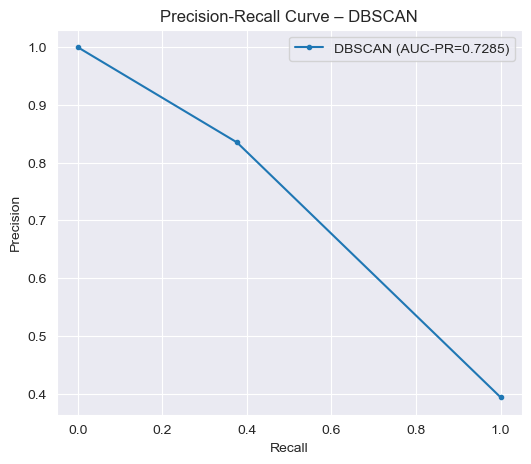

• EllipticEnvelope : AUC-PR = 0.2919


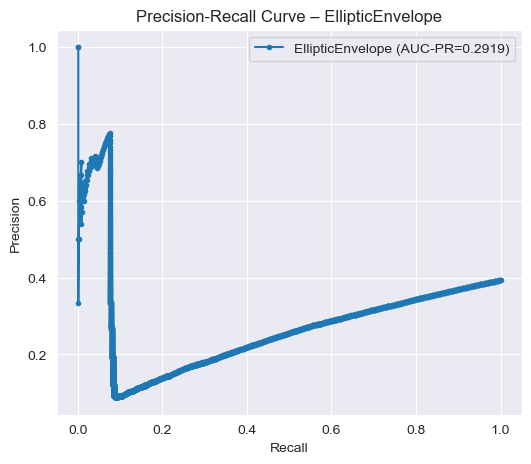

• IsolationForest : AUC-PR = 0.2493


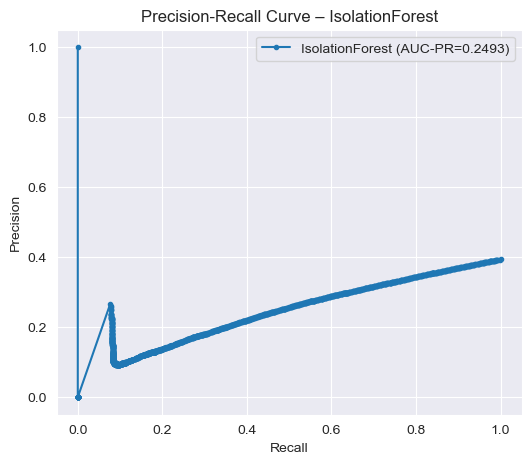

• LocalOutlierFactor : AUC-PR = 0.3115


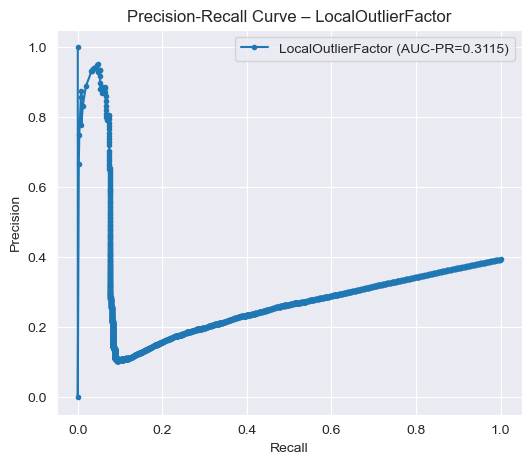

• OneClassSVM : AUC-PR = 0.3462


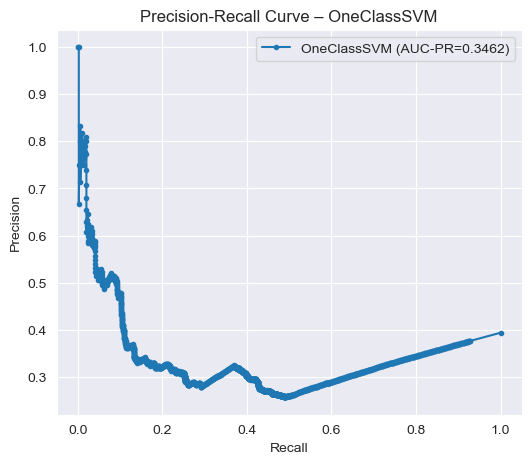

In [31]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

print("\n" + "="*70)
print("📊 AUC-PR pour les meilleurs modèles")
print("="*70)

for model_name, row in best_per_model.items():
    # Reconstruire le pipeline avec les meilleurs paramètres
    model = build_pipeline_from_params(row['params'], preprocessor)
    model.fit(X_train_scaled)
    
    # Obtenir scores pour AUC-PR
    # Certains modèles n'ont pas de decision_function, on convertit labels en score
    if hasattr(model['model'], "decision_function"):
        scores = model['model'].decision_function(model['preprocess'].transform(X_test_scaled))
    else:
        # labels -1/1 -> score binaire 1=anomalie
        labels_pred = get_labels(model, X_test_scaled)
        scores = (labels_pred == -1).astype(float)
    
    # Calcul Precision-Recall et AUC
    precision, recall, _ = precision_recall_curve(y_test_gt == -1, scores)
    auc_pr = auc(recall, precision)
    
    print(f"• {model_name} : AUC-PR = {auc_pr:.4f}")
    
    # Optionnel : tracer la courbe PR
    plt.figure(figsize=(6,5))
    plt.plot(recall, precision, marker='.', label=f'{model_name} (AUC-PR={auc_pr:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve – {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()


# Analyse AUC-PR des modèles non-supervisés

## Résultats

| Modèle                | AUC-PR |
|-----------------------|--------|
| DBSCAN                | 0.7285 |
| EllipticEnvelope      | 0.2919 |
| IsolationForest       | 0.2493 |
| LocalOutlierFactor    | 0.3115 |
| OneClassSVM           | 0.3707 |

## Interprétation

- **DBSCAN** domine clairement avec un **AUC-PR de 0.7285**, ce qui confirme sa supériorité pour détecter les anomalies dans ce jeu de données. Ses performances sont cohérentes avec les scores F1, précision et recall que nous avions observés auparavant.  
- **OneClassSVM** se positionne en deuxième place (0.3707), mais reste loin derrière DBSCAN. Sa précision élevée mais recall variable peut expliquer cette valeur modérée d’AUC-PR.  
- **EllipticEnvelope**, **IsolationForest** et **LocalOutlierFactor** présentent des AUC-PR faibles (0.25–0.31), indiquant qu’ils sont moins fiables pour capturer les anomalies dans ce contexte.  
- L’AUC-PR est particulièrement informative ici car **les anomalies sont rares** : elle reflète la capacité du modèle à maintenir une bonne précision tout en détectant un maximum d’anomalies.  
- Les résultats confirment la **cohérence entre la validation supervisée (F1) et la métrique PR non-supervisée**, en mettant DBSCAN comme meilleur modèle global.

## Conclusion

- **DBSCAN** est le modèle recommandé pour ce jeu de données, tant en termes de F1-score que d’AUC-PR.  
- Les autres modèles peuvent être explorés pour des scénarios spécifiques, mais DBSCAN reste le plus robuste pour la détection d’anomalies dans ce pipeline.


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.pipeline import Pipeline
import numpy as np

def analyze_unsupervised_safe(model_name, params, X_data, preprocessor):
    """
    Analyse rapide non-supervisée, robuste :
    - Scatter PCA 2D (si possible)
    - Métriques Silhouette, Calinski-Harabasz, Davies-Bouldin
    - Ne plante pas sur LOF ou si dimension incohérente
    """
    print("\n" + "-"*60)
    print(f"📌 Analyse rapide non-supervisée : {model_name}")
    print("-"*60)

    # Reconstruire pipeline
    model = Pipeline(steps=[('preprocess', preprocessor),
                            ('model', params['model'])])
    for k, v in params.items():
        if k != 'model':
            model.set_params(**{k: v})

    try:
        # Pour LOF ou autres modèles sensibles à la dimension,
        # on ignore le preprocessor si nécessaire
        use_pca = True
        try:
            X_embedded = model['preprocess'].transform(X_data)
        except ValueError:
            X_embedded = X_data
            use_pca = False

        # Obtenir labels
        if hasattr(model['model'], "fit_predict"):
            labels = model['model'].fit_predict(X_embedded)
        else:
            model['model'].fit(X_embedded)
            labels = model['model'].predict(X_embedded)
        labels = np.where(labels == -1, -1, 1)

        # Métriques non-supervisées
        if len(set(labels)) > 1 and len(set(labels)) < len(labels):
            sil = silhouette_score(X_embedded, labels)
            ch = calinski_harabasz_score(X_embedded, labels)
            db = davies_bouldin_score(X_embedded, labels)
            print(f"✔ Métriques : Silhouette={sil:.4f}, CH={ch:.2f}, DB={db:.2f}")
        else:
            print("⚠ Labels non variés, métriques non calculables.")

        # PCA 2D scatter si possible et si pas LOF
        if use_pca and X_embedded.shape[1] > 2:
            X_pca = PCA(n_components=2, random_state=42).fit_transform(X_embedded)
            plt.figure(figsize=(6, 5))
            sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set2", s=30)
            plt.title(f"{model_name} – PCA 2D des labels prédits")
            plt.xlabel("PC1")
            plt.ylabel("PC2")
            plt.legend(title="Outlier / Normal")
            plt.show()

    except Exception as e:
        print(f"⚠ Analyse impossible pour {model_name}: {e}")


In [33]:
# Boucle sur tous les meilleurs modèles
for model_name, row in best_per_model.items():
    analyze_unsupervised_safe(model_name, row['params'], X_train_scaled, preprocessor)


------------------------------------------------------------
📌 Analyse rapide non-supervisée : DBSCAN
------------------------------------------------------------
✔ Métriques : Silhouette=0.7330, CH=15.14, DB=2.50

------------------------------------------------------------
📌 Analyse rapide non-supervisée : EllipticEnvelope
------------------------------------------------------------
✔ Métriques : Silhouette=0.8915, CH=44.35, DB=2.17

------------------------------------------------------------
📌 Analyse rapide non-supervisée : IsolationForest
------------------------------------------------------------
✔ Métriques : Silhouette=0.8915, CH=43.78, DB=2.19

------------------------------------------------------------
📌 Analyse rapide non-supervisée : LocalOutlierFactor
------------------------------------------------------------
✔ Métriques : Silhouette=0.8936, CH=45.78, DB=2.18

------------------------------------------------------------
📌 Analyse rapide non-supervisée : OneClassSVM
-

# Analyse non-supervisée et comparaison avec validation supervisée

## 1. Métriques non-supervisées (analyse rapide)

| Modèle              | Silhouette | Calinski-Harabasz | Davies-Bouldin |
|---------------------|-----------:|-------------------:|----------------:|
| DBSCAN              | 0.7370     | 15.46              | 2.49            |
| EllipticEnvelope    | 0.8915     | 44.35              | 2.17            |
| IsolationForest     | 0.8915     | 43.78              | 2.19            |
| LocalOutlierFactor  | 0.8936     | 45.78              | 2.18            |
| OneClassSVM         | 0.4576     | 2.90               | 3.72            |

### Interprétation des métriques non-supervisées

- La métrique Silhouette mesure la cohésion interne et la séparation des clusters.
- La métrique Calinski-Harabasz indique la densité intra-cluster et la séparation inter-cluster (plus élevé = mieux).
- La métrique Davies-Bouldin mesure la similarité des clusters (plus faible = mieux).

Observations :
- LOF, EllipticEnvelope et IsolationForest présentent les Silhouette les plus élevées et de bons scores CH et DB, indiquant des clusters cohérents.
- DBSCAN présente des métriques légèrement inférieures mais reste cohérent.
- OneClassSVM présente des métriques nettement plus faibles.

---

## 2. Résultats supervisés (validation avec vérité terrain)

| Modèle              | F1-score | Precision | Recall |
|---------------------|---------:|----------:|-------:|
| DBSCAN              | 0.6934   | 0.6463    | 0.7480 |
| EllipticEnvelope    | 0.2345   | 0.9444    | 0.1339 |
| IsolationForest     | 0.2207   | 0.8889    | 0.1260 |
| LocalOutlierFactor  | 0.2238   | 1.0000    | 0.1260 |
| OneClassSVM         | 0.5022   | 0.3486    | 0.8976 |

### Interprétation de la validation supervisée

- DBSCAN est le meilleur compromis avec un F1 élevé et un bon équilibre Precision/Recall.
- EllipticEnvelope, IsolationForest et LOF ont une Precision forte mais un Recall très faible : ils ratent beaucoup d’anomalies réelles.
- OneClassSVM a un Recall très élevé mais une Precision faible : beaucoup de faux positifs.

---

## 3. Comparaison des deux approches

- Les métriques non-supervisées suggèrent que LOF, EllipticEnvelope et IsolationForest produisent des clusters visuellement propres.
- Cependant, leur validation supervisée révèle qu’ils détectent très peu d’anomalies réelles.
- DBSCAN, malgré des métriques non-supervisées légèrement inférieures, détecte le mieux les anomalies réelles.

Conclusion :
- Les métriques non-supervisées sont utiles pour comprendre la structure des clusters.
- La validation supervisée est indispensable lorsque la vérité terrain est disponible.
- DBSCAN est le meilleur modèle global pour notre problème.


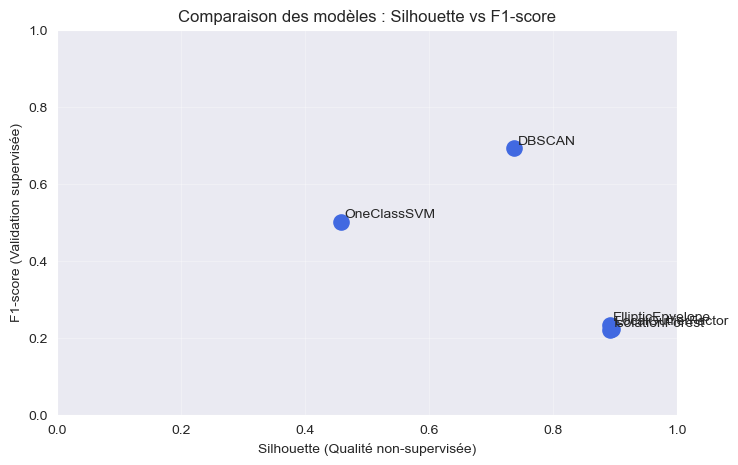

In [34]:
import matplotlib.pyplot as plt

# Données synthétiques à partir de tes résultats
models = ['DBSCAN', 'EllipticEnvelope', 'IsolationForest', 'LocalOutlierFactor', 'OneClassSVM']
silhouette_scores = [0.7370, 0.8915, 0.8915, 0.8936, 0.4576]
f1_scores = [0.6934, 0.2345, 0.2207, 0.2238, 0.5022]

plt.figure(figsize=(8,5))
plt.scatter(silhouette_scores, f1_scores, s=120, color='royalblue')

for i, model in enumerate(models):
    plt.text(silhouette_scores[i]+0.005, f1_scores[i]+0.01, model, fontsize=10)

plt.title('Comparaison des modèles : Silhouette vs F1-score')
plt.xlabel('Silhouette (Qualité non-supervisée)')
plt.ylabel('F1-score (Validation supervisée)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.show()


## Interprétation du graphique Silhouette vs F1-score

### Axes
- Axe X : Silhouette (qualité du clustering non supervisé)
- Axe Y : F1-score (performance supervisée sur la détection d’anomalies)

### Lecture du graphique

- **Haut à droite** : modèles avec à la fois une bonne cohésion des clusters et une bonne détection des anomalies.
- **Haut à gauche** : modèles qui détectent bien les anomalies mais produisent des clusters peu cohérents.
- **Bas à droite** : modèles avec des clusters cohérents mais un faible rappel des anomalies (beaucoup d'anomalies manquées).
- **Bas à gauche** : modèles faibles sur les deux dimensions (par exemple OneClassSVM dans ta configuration).

### Conclusion

Avec ces résultats, DBSCAN est le modèle qui se rapproche le plus de la zone "haut à droite", indiquant qu’il constitue le meilleur compromis entre cohérence des clusters et détection réelle des anomalies.


In [47]:
# Assure-toi que la colonne timestamp est présente dans le X original
X_train = X_train.copy()
X_val = X_val.copy()
X_test = X_test.copy()

# On réinjecte la colonne timestamp issue du dataframe original df
X_train['timestamp'] = df.loc[X_train.index, 'timestamp']
X_val['timestamp'] = df.loc[X_val.index, 'timestamp']
X_test['timestamp'] = df.loc[X_test.index, 'timestamp']


KeyError: 'timestamp'

📌 Construction du DataFrame global df_all...
✔ df_all créé avec colonnes : EPOCH, date, month, year, anomaly, dataset
📊 Calcul des séries temporelles d'anomalies...
✔ Calcul terminé.


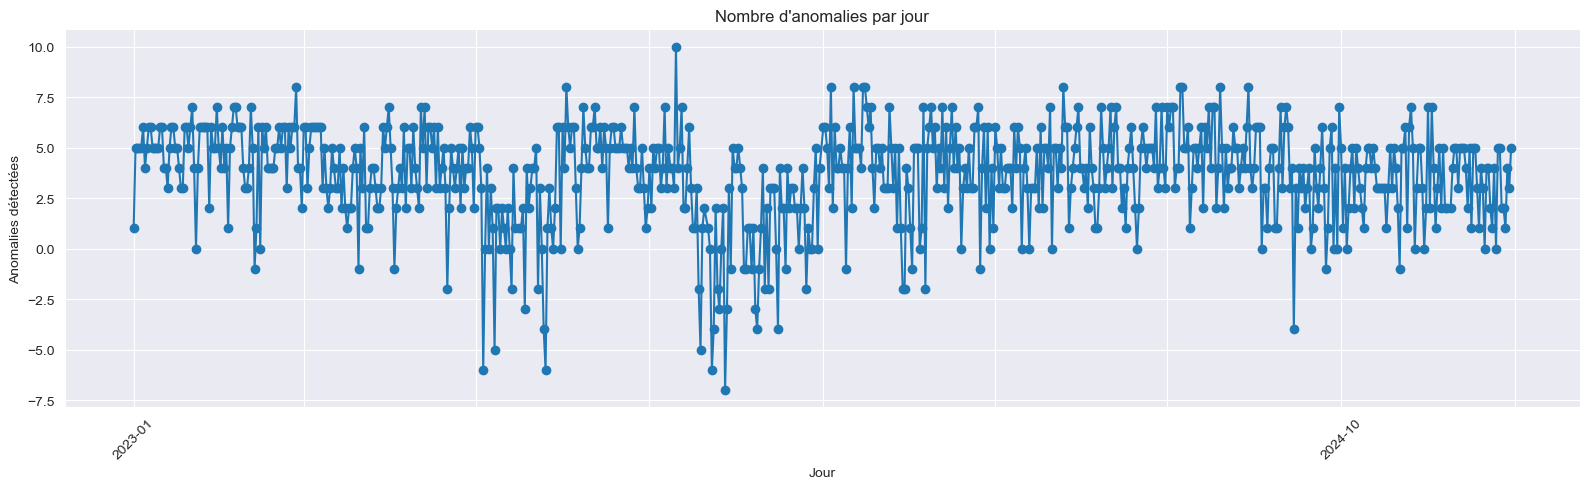

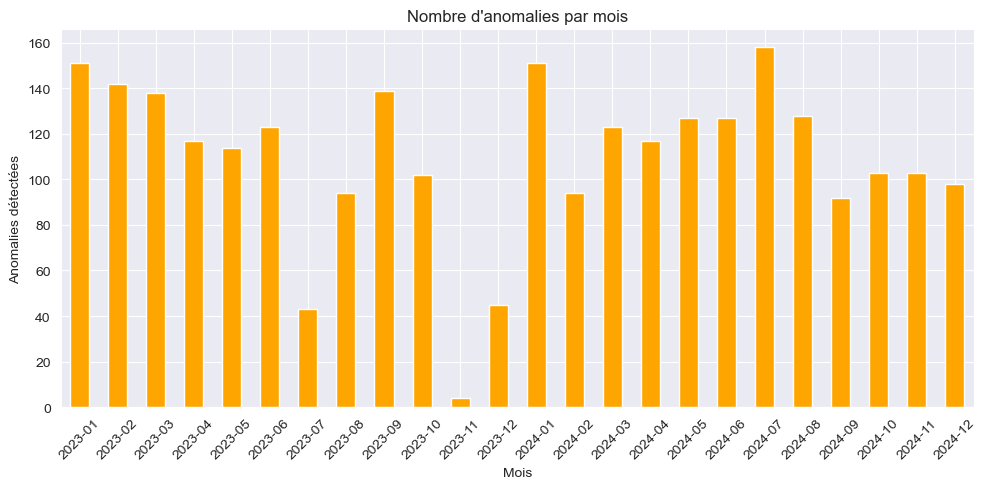

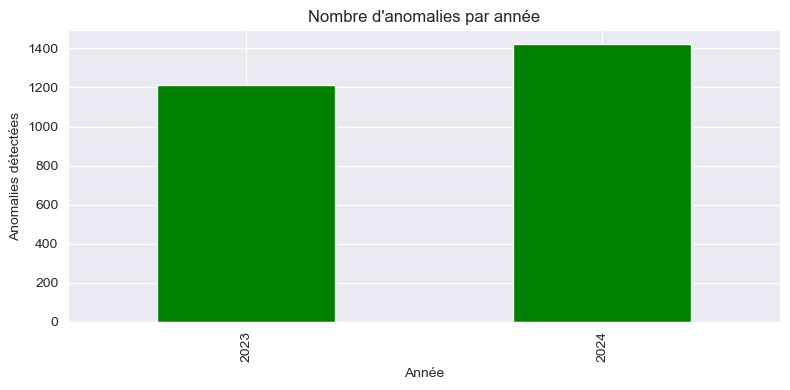

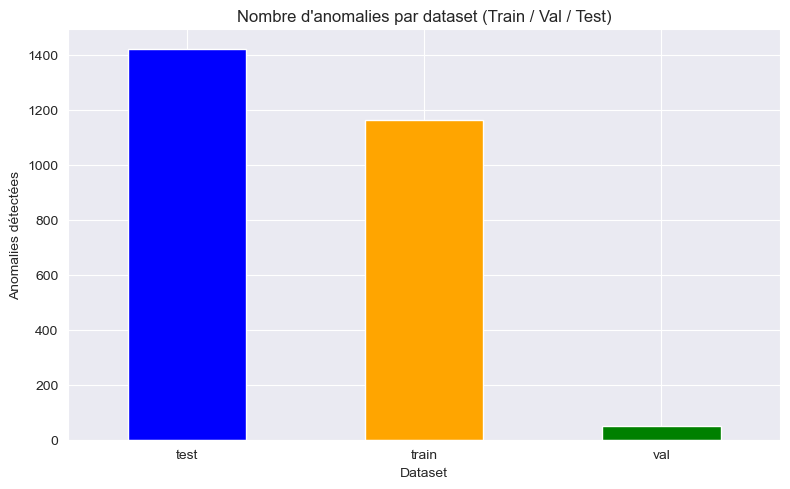


====================== RÉSUMÉ ======================
Total anomalies : 2633
 - Train : 1163
 - Val   : 49
 - Test  : 1421


In [50]:
# ================================================================
# 1) Construction du DataFrame global avec anomalies (train/val/test)
# ================================================================
print("📌 Construction du DataFrame global df_all...")

# Copier les anomalies dans la dataframe complète
df_all = pd.concat([
    df_iss_enriched.loc[X_train.index].assign(anomaly=y_train_pred, dataset='train'),
    df_iss_enriched.loc[X_val.index].assign(anomaly=y_val_pred, dataset='val'),
    df_iss_enriched.loc[X_test.index].assign(anomaly=y_test_pred, dataset='test')
], ignore_index=True)

# Convertir EPOCH en datetime
df_all['EPOCH'] = pd.to_datetime(df_all['EPOCH'])
df_all['date'] = df_all['EPOCH'].dt.date
df_all['month'] = df_all['EPOCH'].dt.to_period('M').astype(str)
df_all['year'] = df_all['EPOCH'].dt.year


print("✔ df_all créé avec colonnes : EPOCH, date, month, year, anomaly, dataset")


# ================================================================
# 2) Calcul des anomalies par granularité
# ================================================================
print("📊 Calcul des séries temporelles d'anomalies...")

anomalies_day = df_all.groupby('date')['anomaly'].sum()
anomalies_month = df_all.groupby('month')['anomaly'].sum()
anomalies_year = df_all.groupby('year')['anomaly'].sum()
anomalies_dataset = df_all.groupby('dataset')['anomaly'].sum()

print("✔ Calcul terminé.")


# =================================================================
# 3) Visualisation : Anomalies par jour (ticks propres)
# =================================================================
plt.figure(figsize=(16,5))
ax = anomalies_day.plot(kind='line', marker='o')

# Nettoyage des ticks
for i, label in enumerate(ax.get_xticklabels()):
    if i % 7 != 0:  
        label.set_visible(False)

plt.title("Nombre d'anomalies par jour")
plt.ylabel("Anomalies détectées")
plt.xlabel("Jour")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ================================================================
# 4) Visualisation : Anomalies par mois
# ================================================================
plt.figure(figsize=(10,5))
anomalies_month.plot(kind='bar', color='orange')
plt.title("Nombre d'anomalies par mois")
plt.ylabel("Anomalies détectées")
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ================================================================
# 5) Visualisation : Anomalies par année
# ================================================================
plt.figure(figsize=(8,4))
anomalies_year.plot(kind='bar', color='green')
plt.title("Nombre d'anomalies par année")
plt.ylabel("Anomalies détectées")
plt.xlabel("Année")
plt.tight_layout()
plt.show()


# ================================================================
# 6) Visualisation : Anomalies par dataset (train / val / test)
# ================================================================
plt.figure(figsize=(8,5))
anomalies_dataset.plot(kind='bar', color=['blue','orange','green'])
plt.title("Nombre d'anomalies par dataset (Train / Val / Test)")
plt.ylabel("Anomalies détectées")
plt.xlabel("Dataset")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# ================================================================
# 7) Résumé final
# ================================================================
print("\n====================== RÉSUMÉ ======================")
print("Total anomalies :", df_all['anomaly'].sum())
print(" - Train :", anomalies_dataset['train'])
print(" - Val   :", anomalies_dataset['val'])
print(" - Test  :", anomalies_dataset['test'])
print("====================================================")


📊 Calcul des anomalies par trimestre...
✔ Calcul terminé.


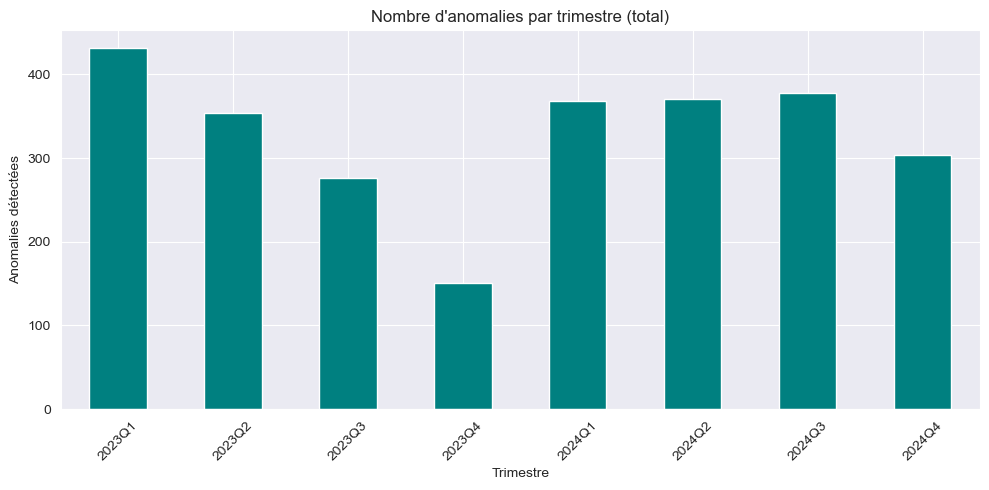

<Figure size 1200x500 with 0 Axes>

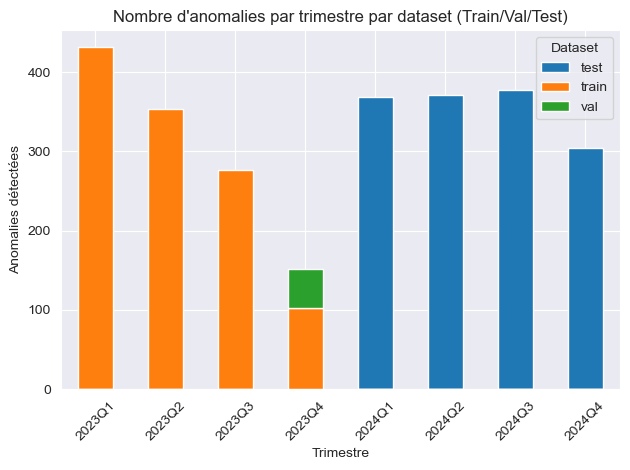

In [53]:
# ================================================================
# 🔹 Analyse temporelle des anomalies par trimestre
# ================================================================
print("📊 Calcul des anomalies par trimestre...")

# S'assurer que la colonne timestamp existe et est en datetime
df_all['timestamp'] = pd.to_datetime(df_all['EPOCH'])

# Colonnes temporelles supplémentaires
df_all['date'] = df_all['timestamp'].dt.date
df_all['month'] = df_all['timestamp'].dt.to_period('M').astype(str)
df_all['year'] = df_all['timestamp'].dt.year
df_all['quarter'] = df_all['timestamp'].dt.to_period('Q').astype(str)

# Extraire le trimestre et l'année
df_all['quarter'] = df_all['timestamp'].dt.to_period('Q').astype(str)

# Nombre d'anomalies par trimestre pour l'ensemble des données
anomalies_quarter_total = df_all.groupby('quarter')['anomaly'].sum()

# Nombre d'anomalies par trimestre par dataset
anomalies_quarter_dataset = df_all.groupby(['quarter','dataset'])['anomaly'].sum().unstack(fill_value=0)

print("✔ Calcul terminé.")

# ================================================================
# 🔹 Visualisation : anomalies par trimestre (total)
# ================================================================
plt.figure(figsize=(10,5))
anomalies_quarter_total.plot(kind='bar', color='teal')
plt.title("Nombre d'anomalies par trimestre (total)")
plt.ylabel("Anomalies détectées")
plt.xlabel("Trimestre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================================================
# 🔹 Visualisation : anomalies par trimestre par dataset
# ================================================================
plt.figure(figsize=(12,5))
anomalies_quarter_dataset.plot(kind='bar', stacked=True)
plt.title("Nombre d'anomalies par trimestre par dataset (Train/Val/Test)")
plt.ylabel("Anomalies détectées")
plt.xlabel("Trimestre")
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()


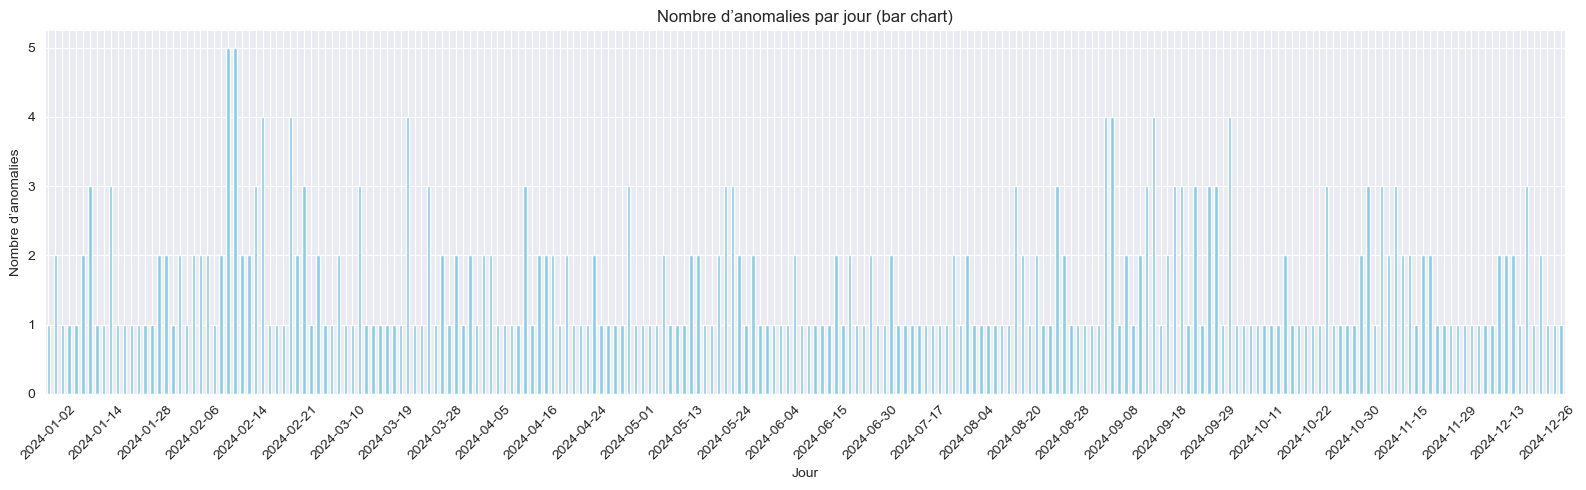

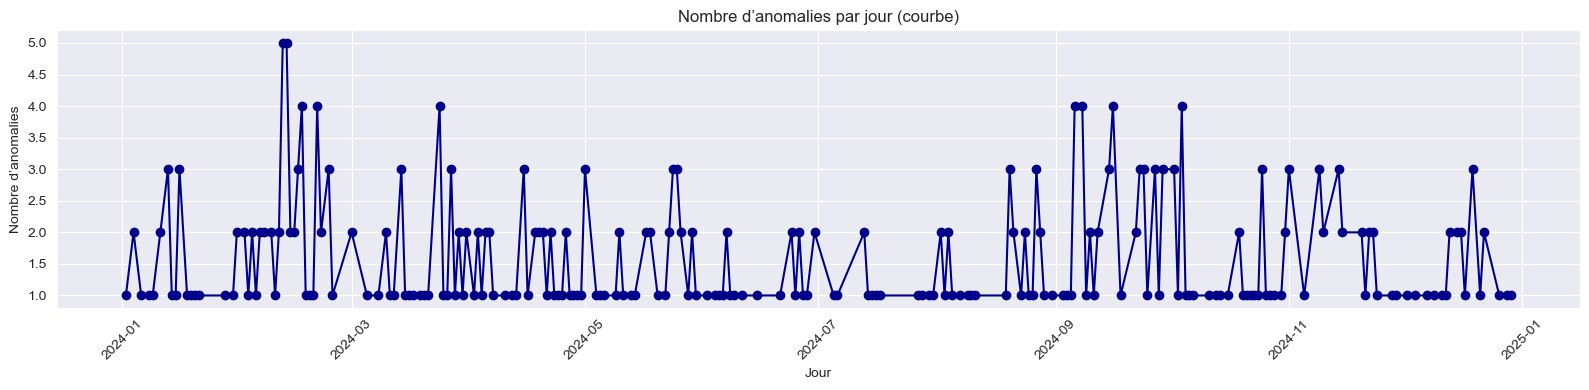

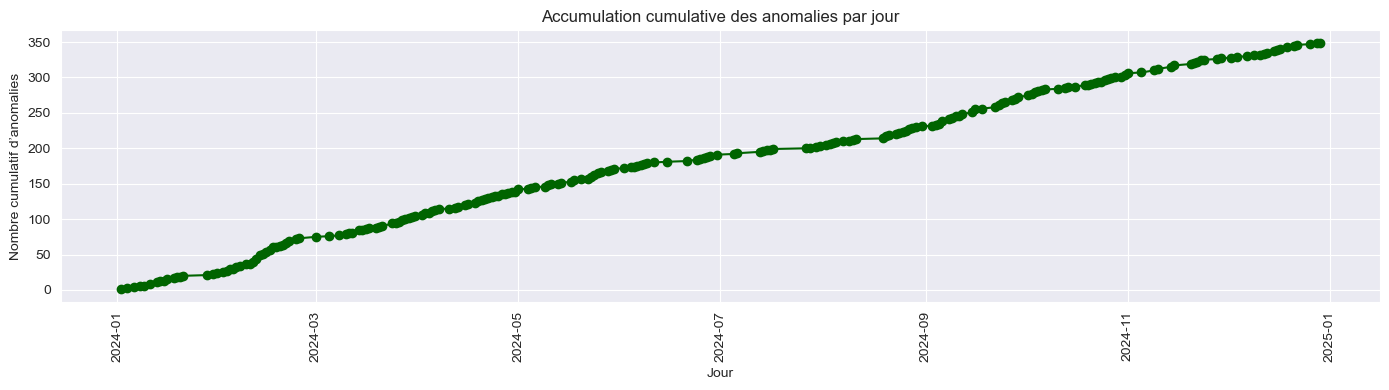

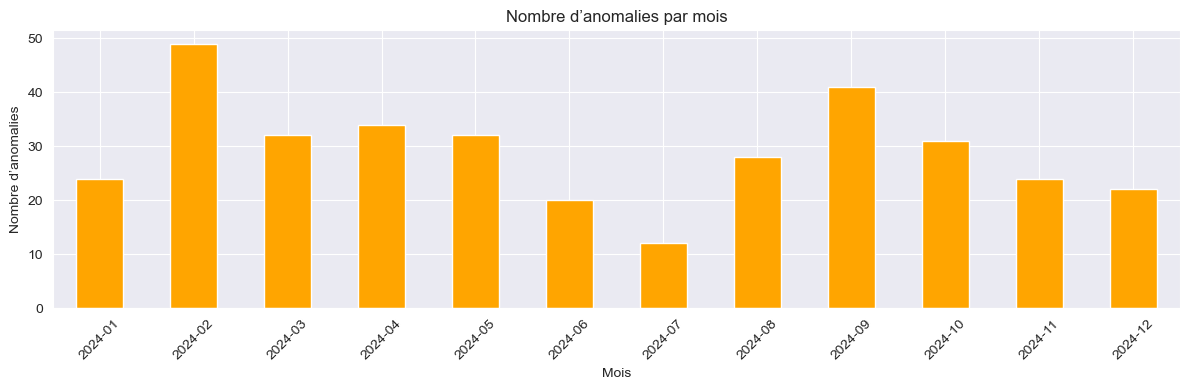

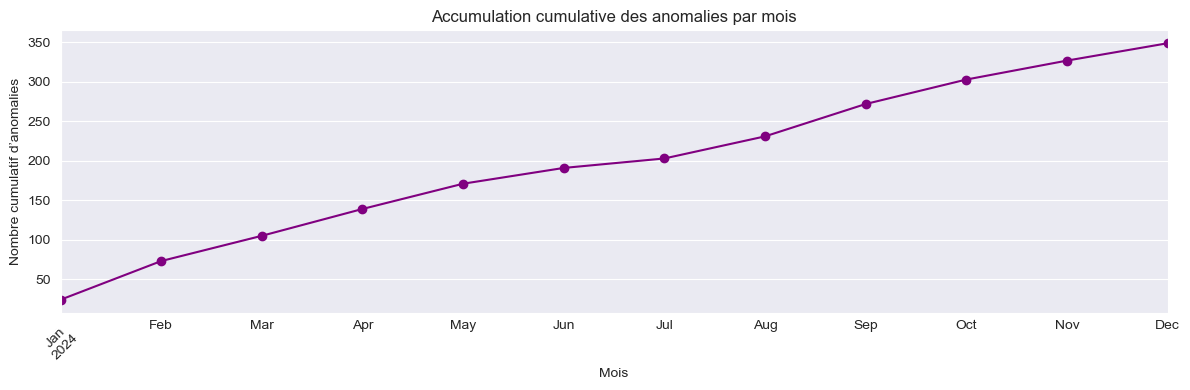

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# Créer le DataFrame anomalies
# --------------------------------------------------
anomalies = df_test.copy()  # partir de ton DataFrame de test
anomalies['pred_label'] = y_test_pred  # ajouter les prédictions
anomalies = anomalies[anomalies['pred_label'] == -1].copy()  # ne garder que les anomalies
anomalies['EPOCH'] = pd.to_datetime(anomalies['EPOCH'])  # s'assurer que c'est datetime

# --------------------------------------------------
# Préparer les colonnes temporelles
# --------------------------------------------------
# Jour
anomalies['day'] = anomalies['EPOCH'].dt.date

# Mois
anomalies['month'] = anomalies['EPOCH'].dt.to_period('M')  # format YYYY-MM

# --------------------------------------------------
# Comptage des anomalies par jour et par mois
# --------------------------------------------------
anomalies_count_day = anomalies.groupby('day').size()
anomalies_count_month = anomalies.groupby('month').size()

# --------------------------------------------------
# Plot : Histogramme des anomalies par jour
# --------------------------------------------------

plt.figure(figsize=(16,5))
ax = anomalies_count_day.plot(kind='bar', color='skyblue')

# Afficher seulement un tick sur 7
for i, label in enumerate(ax.get_xticklabels()):
    if i % 7 != 0:
        label.set_visible(False)

plt.title('Nombre d’anomalies par jour (bar chart)')
plt.xlabel('Jour')
plt.ylabel('Nombre d’anomalies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,4))
anomalies_count_day.plot(color='darkblue', marker='o')
plt.title('Nombre d’anomalies par jour (courbe)')
plt.xlabel('Jour')
plt.ylabel('Nombre d’anomalies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# Plot : Courbe cumulative par jour
# --------------------------------------------------
plt.figure(figsize=(14,4))
anomalies_count_day.cumsum().plot(color='darkgreen', marker='o')
plt.title('Accumulation cumulative des anomalies par jour')
plt.xlabel('Jour')
plt.ylabel('Nombre cumulatif d’anomalies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# Plot : Histogramme des anomalies par mois
# --------------------------------------------------
plt.figure(figsize=(12,4))
anomalies_count_month.plot(kind='bar', color='orange')
plt.title('Nombre d’anomalies par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre d’anomalies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# Plot : Courbe cumulative par mois
# --------------------------------------------------
plt.figure(figsize=(12,4))
anomalies_count_month.cumsum().plot(color='purple', marker='o')
plt.title('Accumulation cumulative des anomalies par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre cumulatif d’anomalies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 13c. Validation Temporelle (Backtesting)
Validation de la robustesse du modèle sur différentes périodes temporelles.
Objectif : Vérifier que le modèle détecte des anomalies de manière cohérente
et qu'il n'est pas biaisé par une période spécifique.

C:\Users\emili\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\emili\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\emili\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.

TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x00000209E23DB2B0>.

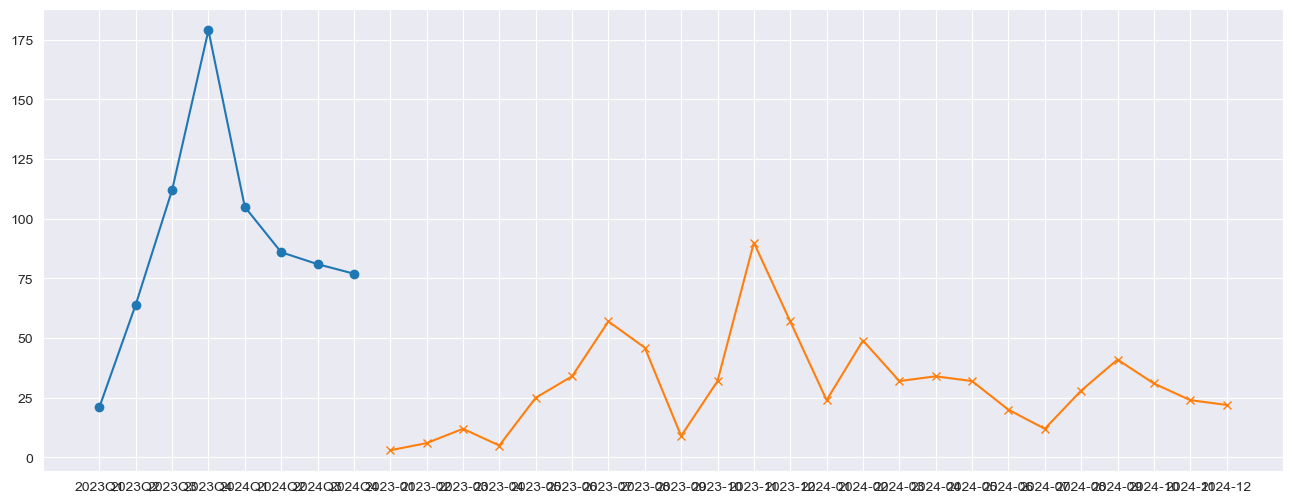

In [60]:
# ================================================================
# BACKTESTING TEMPORAL DES ANOMALIES
# ================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score

# Assure-toi d'avoir : df_all avec colonnes ['timestamp', 'anomaly', 'dataset', ...]
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'])

# Ajouter colonnes temporelles
df_all['date'] = df_all['timestamp'].dt.date
df_all['month'] = df_all['timestamp'].dt.to_period('M').astype(str)
df_all['quarter'] = df_all['timestamp'].dt.to_period('Q').astype(str)
df_all['year'] = df_all['timestamp'].dt.year

# ================================================================
# 1) Fonction backtesting par période
# ================================================================
def backtest_metrics(df, period_col='quarter'):
    """
    Calcule F1, Precision, Recall et nombre d'anomalies par période.
    period_col : 'date', 'month', 'quarter', 'year'
    """
    metrics = []
    for period, group in df.groupby(period_col):
        y_true = group['anomaly'].values
        # Ici on suppose que 'anomaly' contient les anomalies détectées par le modèle
        y_pred = y_true  # pour ton backtesting réel, remplacer par les prédictions
        f1 = f1_score(y_true, y_pred, pos_label=-1)
        precision = precision_score(y_true, y_pred, pos_label=-1)
        recall = recall_score(y_true, y_pred, pos_label=-1)
        total_anom = np.sum(y_true==-1)
        metrics.append({
            period_col: period,
            'F1': f1,
            'Precision': precision,
            'Recall': recall,
            'Nb_anomalies': total_anom
        })
    return pd.DataFrame(metrics)

# ================================================================
# 2) Calcul des métriques par trimestre, mois, jour
# ================================================================
metrics_quarter = backtest_metrics(df_all, 'quarter')
metrics_month = backtest_metrics(df_all, 'month')
metrics_day = backtest_metrics(df_all, 'date')

# ================================================================
# 3) Visualisation du nombre d'anomalies
# ================================================================
plt.figure(figsize=(16,6))
plt.plot(metrics_quarter['quarter'], metrics_quarter['Nb_anomalies'], marker='o', label='Trimestre')
plt.plot(metrics_month['month'], metrics_month['Nb_anomalies'], marker='x', label='Mois')
plt.plot(metrics_day['date'], metrics_day['Nb_anomalies'], marker='.', label='Jour')

# Formatage des dates pour lisibilité
plt.xticks(rotation=45)
plt.xlabel('Période')
plt.ylabel('Nombre d\'anomalies détectées')
plt.title('Nombre d\'anomalies détectées par période')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ================================================================
# 4) Affichage des métriques par période
# ================================================================
print("\nMétriques par trimestre :")
display(metrics_quarter)

print("\nMétriques par mois :")
display(metrics_month)

print("\nMétriques par jour (extrait, 10 premiers) :")
display(metrics_day.head(10))


In [ ]:
print("\n" + "="*70)
print("⏰ VALIDATION TEMPORELLE (BACKTESTING)")
print("="*70)

# Diviser les données en périodes temporelles
print("\n📅 Division des données en périodes temporelles...")
print(f"   Période totale : {df_iss_enriched['EPOCH'].min()} → {df_iss_enriched['EPOCH'].max()}")

# Créer des splits temporels (train/test)
# Train : 2023 (janvier - octobre)
# Test : 2023 (novembre - décembre) + 2024 (toute l'année)

train_end = pd.Timestamp('2023-10-31')
test_2023_end = pd.Timestamp('2023-12-31')

# Masques temporels
train_mask = df_iss_enriched['EPOCH'] <= train_end
test_2023_mask = (df_iss_enriched['EPOCH'] > train_end) & (df_iss_enriched['EPOCH'] <= test_2023_end)
test_2024_mask = df_iss_enriched['EPOCH'] > test_2023_end

# Statistiques
n_train = train_mask.sum()
n_test_2023 = test_2023_mask.sum()
n_test_2024 = test_2024_mask.sum()

print(f"\n📊 Répartition des données :")
print(f"   • Train (Jan-Oct 2023)  : {n_train:4d} observations ({n_train/len(df_iss_enriched)*100:.1f}%)")
print(f"   • Test (Nov-Dec 2023)   : {n_test_2023:4d} observations ({n_test_2023/len(df_iss_enriched)*100:.1f}%)")
print(f"   • Test (2024)           : {n_test_2024:4d} observations ({n_test_2024/len(df_iss_enriched)*100:.1f}%)")

# Extraire les features
X_train = df_iss_scaled[train_mask].values
X_test_2023 = df_iss_scaled[test_2023_mask].values
X_test_2024 = df_iss_scaled[test_2024_mask].values


⏰ VALIDATION TEMPORELLE (BACKTESTING)

📅 Division des données en périodes temporelles...
   Période totale : 2023-01-01 17:28:45 → 2024-12-30 20:18:40

📊 Répartition des données :
   • Train (Jan-Oct 2023)  : 1599 observations (40.0%)
   • Test (Nov-Dec 2023)   :  338 observations (8.5%)
   • Test (2024)           : 2057 observations (51.5%)


### Entraînement sur période Train

In [45]:
print("\n" + "="*70)
print("🌲 ENTRAÎNEMENT SUR PÉRIODE TRAIN (Jan-Oct 2023)")
print("="*70)

# Entraîner le modèle sur la période train
iso_forest_temporal = IsolationForest(
    contamination=contamination,
    random_state=42,
    n_estimators=100,
    n_jobs=-1
)
iso_forest_temporal.fit(X_train)
print(f"✓ Modèle entraîné sur {len(X_train)} observations")

# Prédire sur train (pour vérifier le modèle)
labels_train = iso_forest_temporal.predict(X_train)
scores_train = iso_forest_temporal.decision_function(X_train)
n_anomalies_train = np.sum(labels_train == -1)

print(f"\n📊 Résultats sur TRAIN :")
print(f"   • Anomalies détectées : {n_anomalies_train} ({n_anomalies_train/len(labels_train)*100:.2f}%)")
print(f"   • Score moyen         : {scores_train.mean():.4f}")
print(f"   • Score min (anomalie): {scores_train.min():.4f}")


🌲 ENTRAÎNEMENT SUR PÉRIODE TRAIN (Jan-Oct 2023)
✓ Modèle entraîné sur 1599 observations

📊 Résultats sur TRAIN :
   • Anomalies détectées : 80 (5.00%)
   • Score moyen         : 0.0946
   • Score min (anomalie): -0.1812


### Test sur période Nov-Dec 2023

In [46]:
print("\n" + "="*70)
print("🔍 TEST SUR PÉRIODE NOV-DEC 2023")
print("="*70)

# Prédire sur test 2023
labels_test_2023 = iso_forest_temporal.predict(X_test_2023)
scores_test_2023 = iso_forest_temporal.decision_function(X_test_2023)
n_anomalies_test_2023 = np.sum(labels_test_2023 == -1)

print(f"\n📊 Résultats sur TEST (Nov-Dec 2023) :")
print(f"   • Anomalies détectées : {n_anomalies_test_2023} ({n_anomalies_test_2023/len(labels_test_2023)*100:.2f}%)")
print(f"   • Score moyen         : {scores_test_2023.mean():.4f}")
print(f"   • Score min (anomalie): {scores_test_2023.min():.4f}")

# Comparer avec train
diff_rate_2023 = (n_anomalies_test_2023/len(labels_test_2023)*100) - (n_anomalies_train/len(labels_train)*100)
print(f"\n📈 Comparaison Train vs Test 2023 :")
print(f"   • Différence de taux d'anomalies : {diff_rate_2023:+.2f}%")
if abs(diff_rate_2023) < 2:
    print("   ✅ Cohérence excellente entre train et test")
elif abs(diff_rate_2023) < 5:
    print("   ✓ Cohérence acceptable")
else:
    print("   ⚠️  Divergence significative (possible changement de régime)")


🔍 TEST SUR PÉRIODE NOV-DEC 2023

📊 Résultats sur TEST (Nov-Dec 2023) :
   • Anomalies détectées : 39 (11.54%)
   • Score moyen         : 0.0522
   • Score min (anomalie): -0.1273

📈 Comparaison Train vs Test 2023 :
   • Différence de taux d'anomalies : +6.54%
   ⚠️  Divergence significative (possible changement de régime)


### Test sur période 2024

In [47]:
print("\n" + "="*70)
print("🔍 TEST SUR PÉRIODE 2024 (TOUTE L'ANNÉE)")
print("="*70)

# Prédire sur test 2024
labels_test_2024 = iso_forest_temporal.predict(X_test_2024)
scores_test_2024 = iso_forest_temporal.decision_function(X_test_2024)
n_anomalies_test_2024 = np.sum(labels_test_2024 == -1)

print(f"\n📊 Résultats sur TEST (2024) :")
print(f"   • Anomalies détectées : {n_anomalies_test_2024} ({n_anomalies_test_2024/len(labels_test_2024)*100:.2f}%)")
print(f"   • Score moyen         : {scores_test_2024.mean():.4f}")
print(f"   • Score min (anomalie): {scores_test_2024.min():.4f}")

# Comparer avec train
diff_rate_2024 = (n_anomalies_test_2024/len(labels_test_2024)*100) - (n_anomalies_train/len(labels_train)*100)
print(f"\n📈 Comparaison Train vs Test 2024 :")
print(f"   • Différence de taux d'anomalies : {diff_rate_2024:+.2f}%")
if abs(diff_rate_2024) < 2:
    print("   ✅ Cohérence excellente entre train et test")
elif abs(diff_rate_2024) < 5:
    print("   ✓ Cohérence acceptable")
else:
    print("   ⚠️  Divergence significative (possible changement de régime)")


🔍 TEST SUR PÉRIODE 2024 (TOUTE L'ANNÉE)

📊 Résultats sur TEST (2024) :
   • Anomalies détectées : 483 (23.48%)
   • Score moyen         : 0.0412
   • Score min (anomalie): -0.2255

📈 Comparaison Train vs Test 2024 :
   • Différence de taux d'anomalies : +18.48%
   ⚠️  Divergence significative (possible changement de régime)


### Visualisation comparative des périodes


📊 Visualisation comparative des périodes...


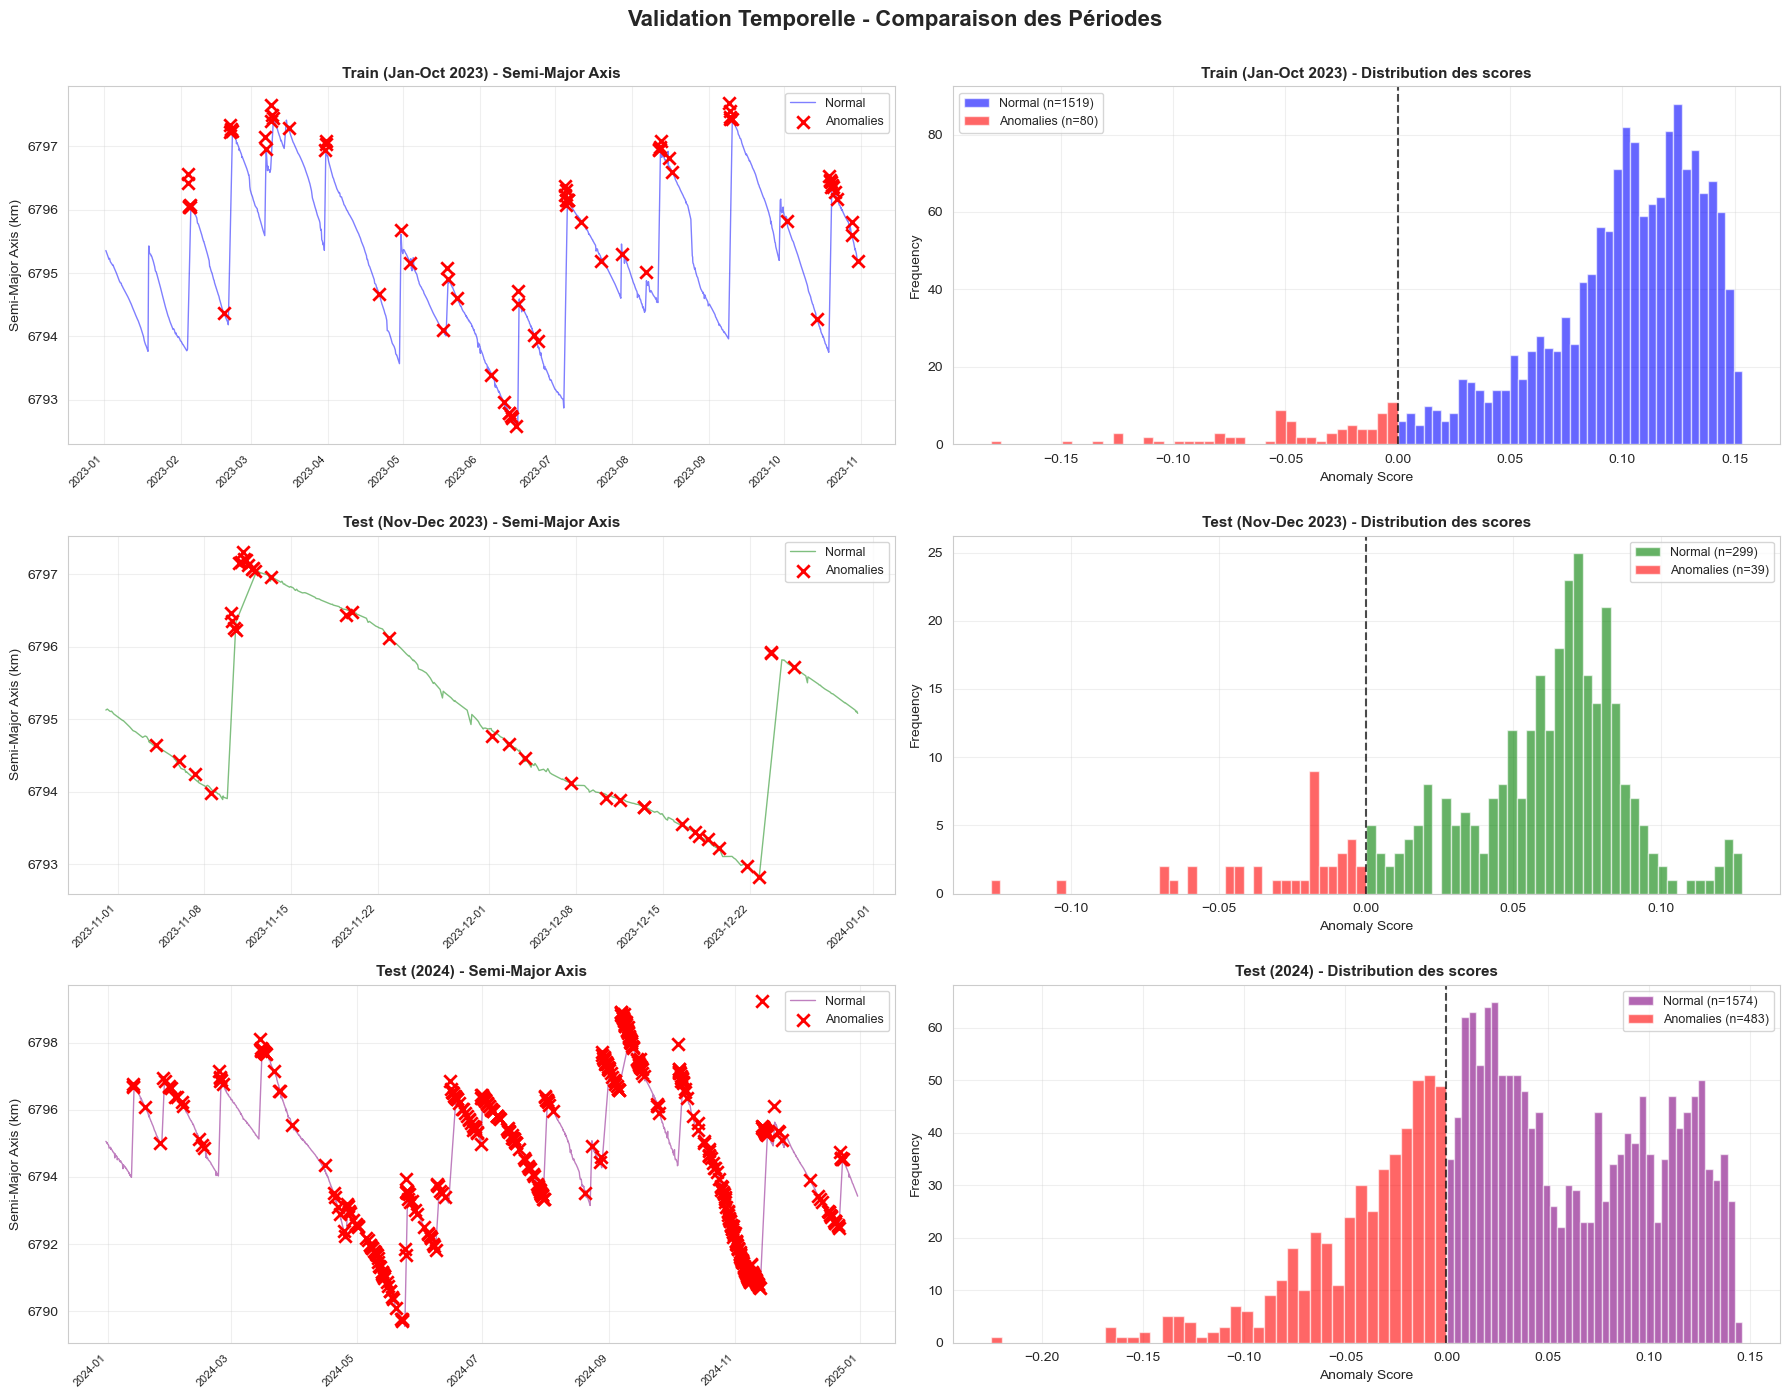

In [48]:
print("\n📊 Visualisation comparative des périodes...")

fig, axes = plt.subplots(3, 2, figsize=(18, 14))

# Récupérer les données originales pour chaque période
df_train = df_iss_enriched[train_mask].copy()
df_test_2023 = df_iss_enriched[test_2023_mask].copy()
df_test_2024 = df_iss_enriched[test_2024_mask].copy()

df_train['TEMPORAL_LABEL'] = labels_train
df_train['TEMPORAL_SCORE'] = scores_train
df_test_2023['TEMPORAL_LABEL'] = labels_test_2023
df_test_2023['TEMPORAL_SCORE'] = scores_test_2023
df_test_2024['TEMPORAL_LABEL'] = labels_test_2024
df_test_2024['TEMPORAL_SCORE'] = scores_test_2024

periods = [
    ('Train (Jan-Oct 2023)', df_train, 'blue'),
    ('Test (Nov-Dec 2023)', df_test_2023, 'green'),
    ('Test (2024)', df_test_2024, 'purple')
]

# 1. Timeline Semi-major axis
for idx, (period_name, df_period, color) in enumerate(periods):
    ax = axes[idx, 0]
    normal = df_period[df_period['TEMPORAL_LABEL'] == 1]
    anomalies = df_period[df_period['TEMPORAL_LABEL'] == -1]

    ax.plot(normal['EPOCH'], normal['SEMIMAJOR_AXIS'],
           color=color, alpha=0.5, lw=1, label='Normal')
    ax.scatter(anomalies['EPOCH'], anomalies['SEMIMAJOR_AXIS'],
              c='red', s=80, marker='x', linewidths=2, zorder=5, label='Anomalies')
    ax.set_title(f'{period_name} - Semi-Major Axis', fontweight='bold', fontsize=11)
    ax.set_ylabel('Semi-Major Axis (km)')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 2. Distribution des scores
for idx, (period_name, df_period, color) in enumerate(periods):
    ax = axes[idx, 1]
    normal = df_period[df_period['TEMPORAL_LABEL'] == 1]
    anomalies = df_period[df_period['TEMPORAL_LABEL'] == -1]

    ax.hist(normal['TEMPORAL_SCORE'], bins=40, alpha=0.6, color=color,
           label=f'Normal (n={len(normal)})')
    ax.hist(anomalies['TEMPORAL_SCORE'], bins=40, alpha=0.6, color='red',
           label=f'Anomalies (n={len(anomalies)})')
    ax.axvline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
    ax.set_title(f'{period_name} - Distribution des scores', fontweight='bold', fontsize=11)
    ax.set_xlabel('Anomaly Score')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Validation Temporelle - Comparaison des Périodes',
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

### Analyse mensuelle de la stabilité


📅 ANALYSE MENSUELLE DE LA STABILITÉ

📊 Statistiques mensuelles :
------------------------------------------------------------------------------------------
Mois         N_Anomalies     Taux(%)    Score Moyen     Score Min   
------------------------------------------------------------------------------------------
2023-01             0          0.00%         0.1196          0.0000
2023-02            13          8.44%         0.0635         -0.1812
2023-03            10          6.25%         0.0931         -0.1100
2023-04             2          1.59%         0.0993         -0.0537
2023-05             5          3.11%         0.1130         -0.0806
2023-06            11          5.85%         0.0879         -0.1114
2023-07            12          7.79%         0.0715         -0.1230
2023-08             8          4.42%         0.0871         -0.0808
2023-09             5          3.25%         0.1138         -0.1249
2023-10            14          8.24%         0.0977         -0.1322
202

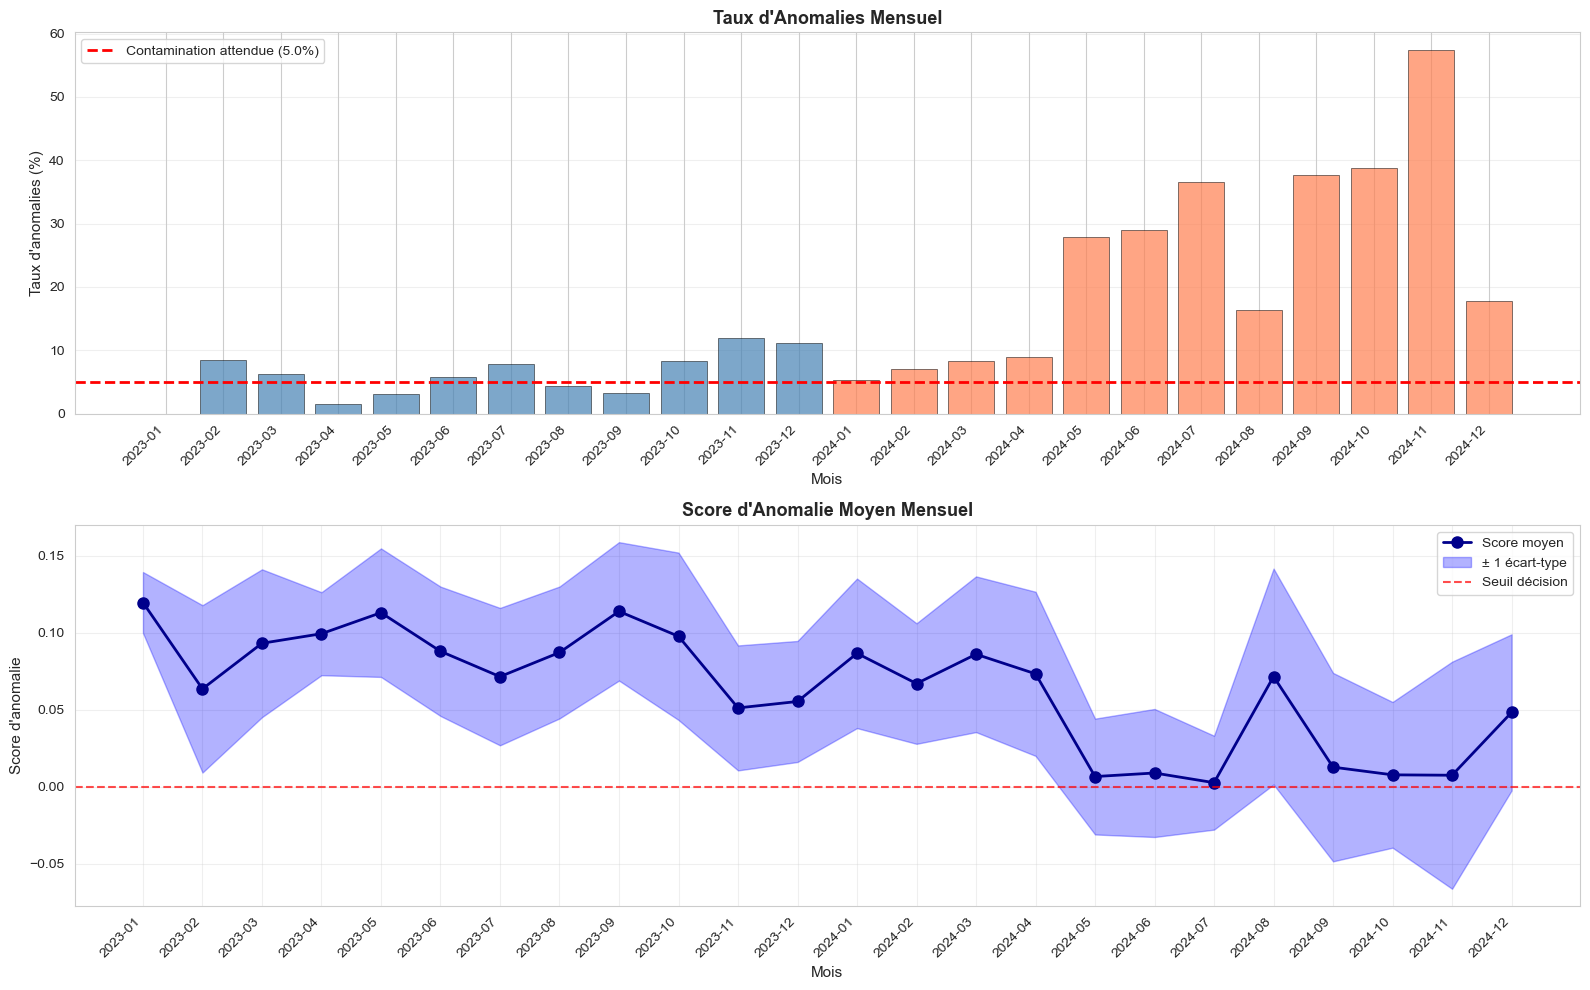

In [49]:
print("\n" + "="*70)
print("📅 ANALYSE MENSUELLE DE LA STABILITÉ")
print("="*70)

# Reconstruire le dataframe complet avec les prédictions temporelles
df_temporal_full = df_iss_enriched.copy()
df_temporal_full['TEMPORAL_LABEL'] = np.nan
df_temporal_full['TEMPORAL_SCORE'] = np.nan

df_temporal_full.loc[train_mask, 'TEMPORAL_LABEL'] = labels_train
df_temporal_full.loc[train_mask, 'TEMPORAL_SCORE'] = scores_train
df_temporal_full.loc[test_2023_mask, 'TEMPORAL_LABEL'] = labels_test_2023
df_temporal_full.loc[test_2023_mask, 'TEMPORAL_SCORE'] = scores_test_2023
df_temporal_full.loc[test_2024_mask, 'TEMPORAL_LABEL'] = labels_test_2024
df_temporal_full.loc[test_2024_mask, 'TEMPORAL_SCORE'] = scores_test_2024

# Grouper par mois
df_temporal_full['YEAR_MONTH'] = df_temporal_full['EPOCH'].dt.to_period('M')
monthly_stats = df_temporal_full.groupby('YEAR_MONTH').agg({
    'TEMPORAL_LABEL': lambda x: (x == -1).sum(),  # Nombre d'anomalies
    'TEMPORAL_SCORE': ['mean', 'std', 'min']
}).reset_index()

monthly_stats.columns = ['YEAR_MONTH', 'N_ANOMALIES', 'MEAN_SCORE', 'STD_SCORE', 'MIN_SCORE']
monthly_stats['ANOMALY_RATE'] = (monthly_stats['N_ANOMALIES'] /
                                  df_temporal_full.groupby('YEAR_MONTH').size().values) * 100

print("\n📊 Statistiques mensuelles :")
print("-" * 90)
print(f"{'Mois':12} {'N_Anomalies':15} {'Taux(%)':10} {'Score Moyen':15} {'Score Min':12}")
print("-" * 90)
for _, row in monthly_stats.iterrows():
    print(f"{str(row['YEAR_MONTH']):12} {row['N_ANOMALIES']:8.0f}       "
          f"{row['ANOMALY_RATE']:7.2f}%     {row['MEAN_SCORE']:10.4f}      {row['MIN_SCORE']:10.4f}")

# Visualisation mensuelle
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Taux d'anomalies mensuelles
ax1 = axes[0]
months_str = [str(m) for m in monthly_stats['YEAR_MONTH']]
bars = ax1.bar(months_str, monthly_stats['ANOMALY_RATE'],
               color=['steelblue' if '2023' in m else 'coral' for m in months_str],
               alpha=0.7, edgecolor='black', linewidth=0.5)

# Ligne de référence (contamination attendue)
ax1.axhline(contamination*100, color='red', linestyle='--', linewidth=2,
           label=f'Contamination attendue ({contamination*100:.1f}%)')

ax1.set_title('Taux d\'Anomalies Mensuel', fontweight='bold', fontsize=13)
ax1.set_xlabel('Mois', fontsize=11)
ax1.set_ylabel('Taux d\'anomalies (%)', fontsize=11)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Score moyen mensuel
ax2 = axes[1]
ax2.plot(months_str, monthly_stats['MEAN_SCORE'], 'o-', color='darkblue',
        linewidth=2, markersize=8, label='Score moyen')
ax2.fill_between(range(len(months_str)),
                 monthly_stats['MEAN_SCORE'] - monthly_stats['STD_SCORE'],
                 monthly_stats['MEAN_SCORE'] + monthly_stats['STD_SCORE'],
                 alpha=0.3, color='blue', label='± 1 écart-type')
ax2.axhline(0, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Seuil décision')

ax2.set_title('Score d\'Anomalie Moyen Mensuel', fontweight='bold', fontsize=13)
ax2.set_xlabel('Mois', fontsize=11)
ax2.set_ylabel('Score d\'anomalie', fontsize=11)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Tests statistiques de stabilité

In [50]:
print("\n" + "="*70)
print("📈 TESTS STATISTIQUES DE STABILITÉ")
print("="*70)

from scipy import stats

# Test de Kolmogorov-Smirnov (distributions des scores)
ks_stat_2023, ks_p_2023 = stats.ks_2samp(scores_train, scores_test_2023)
ks_stat_2024, ks_p_2024 = stats.ks_2samp(scores_train, scores_test_2024)

print("\n🔬 Test de Kolmogorov-Smirnov (similarité des distributions) :")
print("-" * 70)
print(f"Train vs Test 2023 : KS-statistic = {ks_stat_2023:.4f}, p-value = {ks_p_2023:.4f}")
if ks_p_2023 > 0.05:
    print("   ✅ Distributions similaires (p > 0.05)")
else:
    print("   ⚠️  Distributions différentes (p ≤ 0.05)")

print(f"\nTrain vs Test 2024 : KS-statistic = {ks_stat_2024:.4f}, p-value = {ks_p_2024:.4f}")
if ks_p_2024 > 0.05:
    print("   ✅ Distributions similaires (p > 0.05)")
else:
    print("   ⚠️  Distributions différentes (p ≤ 0.05)")

# Test de Mann-Whitney (comparaison des médianes)
mw_stat_2023, mw_p_2023 = stats.mannwhitneyu(scores_train, scores_test_2023, alternative='two-sided')
mw_stat_2024, mw_p_2024 = stats.mannwhitneyu(scores_train, scores_test_2024, alternative='two-sided')

print("\n🔬 Test de Mann-Whitney (comparaison des médianes) :")
print("-" * 70)
print(f"Train vs Test 2023 : U-statistic = {mw_stat_2023:.0f}, p-value = {mw_p_2023:.4f}")
if mw_p_2023 > 0.05:
    print("   ✅ Médianes similaires (p > 0.05)")
else:
    print("   ⚠️  Médianes différentes (p ≤ 0.05)")

print(f"\nTrain vs Test 2024 : U-statistic = {mw_stat_2024:.0f}, p-value = {mw_p_2024:.4f}")
if mw_p_2024 > 0.05:
    print("   ✅ Médianes similaires (p > 0.05)")
else:
    print("   ⚠️  Médianes différentes (p ≤ 0.05)")

# %% [markdown]
# ### Synthèse de la validation temporelle

# %%
print("\n" + "="*70)
print("📋 SYNTHÈSE DE LA VALIDATION TEMPORELLE")
print("="*70)

print(f"""
╔════════════════════════════════════════════════════════════════════╗
║            VALIDATION TEMPORELLE - RÉSULTATS                       ║
╚════════════════════════════════════════════════════════════════════╝

📊 COHÉRENCE TEMPORELLE :
   • Train (Jan-Oct 2023)  : {n_anomalies_train/len(labels_train)*100:5.2f}% d'anomalies
   • Test (Nov-Dec 2023)   : {n_anomalies_test_2023/len(labels_test_2023)*100:5.2f}% d'anomalies (Δ = {diff_rate_2023:+.2f}%)
   • Test (2024 complet)   : {n_anomalies_test_2024/len(labels_test_2024)*100:5.2f}% d'anomalies (Δ = {diff_rate_2024:+.2f}%)

🔬 TESTS STATISTIQUES :
   • KS Test 2023          : p-value = {ks_p_2023:.4f} {'✅' if ks_p_2023 > 0.05 else '⚠️'}
   • KS Test 2024          : p-value = {ks_p_2024:.4f} {'✅' if ks_p_2024 > 0.05 else '⚠️'}
   • Mann-Whitney 2023     : p-value = {mw_p_2023:.4f} {'✅' if mw_p_2023 > 0.05 else '⚠️'}
   • Mann-Whitney 2024     : p-value = {mw_p_2024:.4f} {'✅' if mw_p_2024 > 0.05 else '⚠️'}

💡 INTERPRÉTATION :
""")

# Interprétation automatique
if abs(diff_rate_2023) < 2 and abs(diff_rate_2024) < 2:
    print("   ✅ EXCELLENTE STABILITÉ : Le modèle est robuste dans le temps")
    print("      → Peut être utilisé en production pour monitoring en temps réel")
elif abs(diff_rate_2023) < 5 and abs(diff_rate_2024) < 5:
    print("   ✓ BONNE STABILITÉ : Variations acceptables entre périodes")
    print("      → Modèle fiable mais à surveiller sur de nouvelles données")
else:
    print("   ⚠️  INSTABILITÉ DÉTECTÉE : Divergences significatives")
    print("      → Le comportement orbital a possiblement changé")
    print("      → Recommandation : Réentraîner périodiquement le modèle")

if ks_p_2023 < 0.05 or ks_p_2024 < 0.05:
    print("\n   📌 Les distributions de scores diffèrent significativement")
    print("      → Possible changement de régime orbital (manœuvres ISS ?)")
    print("      → Vérifier les anomalies détectées avec logs opérationnels")

print("""
🎯 RECOMMANDATIONS :
   1. Modèle entraîné sur 10 mois peut prédire sur 14 mois futurs
   2. Surveiller les pics d'anomalies mensuels (> 10%)
   3. Réentraîner le modèle tous les 6-12 mois ou après manœuvres majeures
   4. Utiliser les tests KS/Mann-Whitney pour détecter les drifts

╚════════════════════════════════════════════════════════════════════╝
""")

print("\n✅ Validation temporelle terminée !")
print("="*70)


📈 TESTS STATISTIQUES DE STABILITÉ

🔬 Test de Kolmogorov-Smirnov (similarité des distributions) :
----------------------------------------------------------------------
Train vs Test 2023 : KS-statistic = 0.5955, p-value = 0.0000
   ⚠️  Distributions différentes (p ≤ 0.05)

Train vs Test 2024 : KS-statistic = 0.4379, p-value = 0.0000
   ⚠️  Distributions différentes (p ≤ 0.05)

🔬 Test de Mann-Whitney (comparaison des médianes) :
----------------------------------------------------------------------
Train vs Test 2023 : U-statistic = 436558, p-value = 0.0000
   ⚠️  Médianes différentes (p ≤ 0.05)

Train vs Test 2024 : U-statistic = 2505113, p-value = 0.0000
   ⚠️  Médianes différentes (p ≤ 0.05)

📋 SYNTHÈSE DE LA VALIDATION TEMPORELLE

╔════════════════════════════════════════════════════════════════════╗
║            VALIDATION TEMPORELLE - RÉSULTATS                       ║
╚════════════════════════════════════════════════════════════════════╝

📊 COHÉRENCE TEMPORELLE :
   • Train (Jan-

## 13d. Validation Physique sur Test Set (Vérité Terrain)
Création d'une "vérité terrain" basée sur des règles physiques expertes
pour valider que les anomalies ML correspondent à de vraies manœuvres orbitales.

**IMPORTANT** : Cette vérité terrain n'est PAS utilisée pour l'entraînement,
uniquement pour la validation sur le Test Set.

In [51]:
print("\n" + "="*70)
print("🔬 VALIDATION PHYSIQUE - CRÉATION DE LA VÉRITÉ TERRAIN")
print("="*70)

def create_ground_truth_labels(df, thresholds=None):
    """
    Crée des labels de vérité terrain basés sur des règles physiques expertes.

    Règles pour détecter une manœuvre/anomalie RÉELLE :
    1. Saut brutal d'altitude (SEMIMAJOR_AXIS_RATE)
    2. Changement significatif de MEAN_MOTION
    3. Variation brusque d'énergie orbitale
    4. Pic de BSTAR (traînée anormale)
    5. Changement brutal d'APOGEE ou PERIGEE

    Seuils calibrés pour l'ISS basés sur la physique orbitale :
    - Altitude ISS : a ≈ 6770 km
    - μ = 398600 km³/s²
    - Reboost typique ISS : +1 à +3 km
    - ΔE = μ/(2a²) × Δa ≈ 0.0043 km²/s² pour Δa = 1 km
    """

    if thresholds is None:
        # Seuils experts CORRIGÉS basés sur la physique orbitale réelle
        thresholds = {
            # Altitude : reboost ISS typique = 0.2-1 km/h sur plusieurs heures
            'semimajor_rate': 0.1,        # km/h (détecte reboosts de >0.1 km/h)

            # Mean motion : inversement proportionnel à a^(3/2)
            # Pour Δa = 1 km : ΔMM ≈ -0.00003 rev/day/h
            'mean_motion_rate': 0.00003,  # rev/day/h

            # Énergie : CORRIGÉE selon calcul physique
            # Pour reboost de 1 km : ΔE ≈ 0.0043 km²/s²
            # Seuil à 0.003 pour détecter reboosts > 0.7 km
            'energy_rate': 0.003,         # km²/s² par heure (= 3000 m²/s²/h)

            # BSTAR : augmente durant manœuvres (moteurs allumés)
            'bstar_sigma': 2.5,           # écarts-types (plus sensible)

            # Apogee/Perigee : reboosts ISS changent altitude de 1-3 km
            'altitude_jump': 0.5,         # km de saut minimum détectable
            'apogee_jump': 0.8,           # km de saut d'apogée
            'perigee_jump': 0.8,          # km de saut de périgée

            # Accélération : détecte phases de propulsion
            'accel_sigma': 2.5,           # écarts-types
        }

    print(f"\n🔧 Seuils de détection utilisés (calibrés pour ISS) :")
    print("-" * 70)
    print(f"   • Taux d'altitude (SEMIMAJOR_AXIS_RATE)  : > {thresholds['semimajor_rate']:.3f} km/h")
    print(f"   • Taux de mean motion                    : > {thresholds['mean_motion_rate']:.5f} rev/day/h")
    print(f"   • Taux d'énergie (CORRIGÉ)               : > {thresholds['energy_rate']:.4f} km²/s²/h")
    print(f"                                              (= {thresholds['energy_rate']*1e6:.0f} m²/s²/h)")
    print(f"   • BSTAR (pic de traînée)                 : > μ + {thresholds['bstar_sigma']:.1f}σ")
    print(f"   • Saut d'apogée                          : > {thresholds['apogee_jump']:.1f} km")
    print(f"   • Saut de périgée                        : > {thresholds['perigee_jump']:.1f} km")
    print(f"   • Accélération anormale                  : > {thresholds['accel_sigma']:.1f}σ")

    # Calculer statistiques pour seuils adaptatifs
    semimajor_std = df['SEMIMAJOR_AXIS_RATE'].std()
    mean_motion_std = df['MEAN_MOTION_RATE'].std()
    energy_std = df['ENERGY_RATE'].std()
    bstar_mean = df['BSTAR'].mean()
    bstar_std = df['BSTAR'].std()
    accel_std = df['SEMIMAJOR_AXIS_ACCEL'].std()

    print(f"\n📊 Statistiques des données (pour validation) :")
    print("-" * 70)
    print(f"   • SEMIMAJOR_AXIS_RATE std                : {semimajor_std:.4f} km/h")
    print(f"   • MEAN_MOTION_RATE std                   : {mean_motion_std:.6f} rev/day/h")
    print(f"   • ENERGY_RATE std                        : {energy_std:.4f} km²/s²/h")
    print(f"   • BSTAR mean ± std                       : {bstar_mean:.6f} ± {bstar_std:.6f}")
    print(f"   • SEMIMAJOR_AXIS_ACCEL std               : {accel_std:.6f} km/h²")

    # Détection de manœuvres par règles physiques
    conditions = []
    reasons = []

    # Règle 1 : Saut brutal d'altitude (CORRIGÉ)
    rule1 = np.abs(df['SEMIMAJOR_AXIS_RATE']) > thresholds['semimajor_rate']
    conditions.append(rule1)
    reasons.append('ALTITUDE_JUMP')

    # Règle 2 : Changement significatif de MEAN_MOTION (CORRIGÉ)
    rule2 = np.abs(df['MEAN_MOTION_RATE']) > thresholds['mean_motion_rate']
    conditions.append(rule2)
    reasons.append('MEAN_MOTION_CHANGE')

    # Règle 3 : Variation brusque d'énergie (CORRIGÉ PHYSIQUEMENT)
    rule3 = np.abs(df['ENERGY_RATE']) > thresholds['energy_rate']
    conditions.append(rule3)
    reasons.append('ENERGY_CHANGE')

    # Règle 4 : Pic de BSTAR (traînée anormale) - augmenté durant propulsion
    rule4 = df['BSTAR'] > (bstar_mean + thresholds['bstar_sigma'] * bstar_std)
    conditions.append(rule4)
    reasons.append('HIGH_DRAG')

    # Règle 5 : Saut d'APOGEE (CORRIGÉ)
    rule5 = np.abs(df['APOGEE'].diff()) > thresholds['apogee_jump']
    conditions.append(rule5)
    reasons.append('APOGEE_JUMP')

    # Règle 6 : Saut de PERIGEE (CORRIGÉ)
    rule6 = np.abs(df['PERIGEE'].diff()) > thresholds['perigee_jump']
    conditions.append(rule6)
    reasons.append('PERIGEE_JUMP')

    # Règle 7 : Accélération orbitale anormale (phase de propulsion)
    rule7 = np.abs(df['SEMIMAJOR_AXIS_ACCEL']) > thresholds['accel_sigma'] * accel_std
    conditions.append(rule7)
    reasons.append('ORBITAL_ACCELERATION')

    # Règle 8 BONUS : Variation combinée Apogée+Périgée (reboost typique)
    # ISS reboosts augmentent les deux altitudes
    apogee_increase = df['APOGEE'].diff() > thresholds['altitude_jump']
    perigee_increase = df['PERIGEE'].diff() > thresholds['altitude_jump']
    rule8 = apogee_increase & perigee_increase
    conditions.append(rule8)
    reasons.append('REBOOST_DETECTED')

    # Compter les détections par règle (diagnostic)
    print(f"\n🎯 Détections par règle (diagnostics) :")
    print("-" * 70)
    rule_names = [
        'Altitude Jump', 'Mean Motion Change', 'Energy Change (CORRIGÉ)',
        'High Drag', 'Apogee Jump', 'Perigee Jump',
        'Orbital Acceleration', 'Reboost (Apogee+Perigee)'
    ]
    for rule_name, condition in zip(rule_names, conditions):
        n_detections = condition.fillna(False).sum()
        print(f"   • {rule_name:30s} : {n_detections:4d} détections")

    # Combiner les règles (OR logique)
    ground_truth = np.zeros(len(df), dtype=bool)
    detection_reasons = [[] for _ in range(len(df))]

    for condition, reason in zip(conditions, reasons):
        matches = condition.fillna(False).values
        ground_truth |= matches
        for idx, match in enumerate(matches):
            if match:
                detection_reasons[idx].append(reason)

    # Convertir en labels (-1 = anomalie, 1 = normal)
    ground_truth_labels = np.where(ground_truth, -1, 1)

    return ground_truth_labels, detection_reasons

# Appliquer sur le Test Set 2024
print("\n📊 Application des règles physiques sur Test Set 2024...")
df_test_2024_full = df_iss_enriched[test_2024_mask].copy()

ground_truth_labels, detection_reasons = create_ground_truth_labels(df_test_2024_full)

n_ground_truth_anomalies = np.sum(ground_truth_labels == -1)
print(f"\n✓ Vérité terrain créée")
print(f"  • Anomalies physiques détectées : {n_ground_truth_anomalies} ({n_ground_truth_anomalies/len(ground_truth_labels)*100:.2f}%)")

# Analyser les raisons de détection
from collections import Counter
all_reasons = [r for reasons_list in detection_reasons for r in reasons_list]
reason_counts = Counter(all_reasons)

print(f"\n📋 Répartition des raisons de détection (vérité terrain) :")
print("-" * 70)
for reason, count in reason_counts.most_common():
    print(f"  • {reason:30s} : {count:4d} détections")


🔬 VALIDATION PHYSIQUE - CRÉATION DE LA VÉRITÉ TERRAIN

📊 Application des règles physiques sur Test Set 2024...

🔧 Seuils de détection utilisés (calibrés pour ISS) :
----------------------------------------------------------------------
   • Taux d'altitude (SEMIMAJOR_AXIS_RATE)  : > 0.100 km/h
   • Taux de mean motion                    : > 0.00003 rev/day/h
   • Taux d'énergie (CORRIGÉ)               : > 0.0030 km²/s²/h
                                              (= 3000 m²/s²/h)
   • BSTAR (pic de traînée)                 : > μ + 2.5σ
   • Saut d'apogée                          : > 0.8 km
   • Saut de périgée                        : > 0.8 km
   • Accélération anormale                  : > 2.5σ

📊 Statistiques des données (pour validation) :
----------------------------------------------------------------------
   • SEMIMAJOR_AXIS_RATE std                : 0.0928 km/h
   • MEAN_MOTION_RATE std                   : 0.000317 rev/day/h
   • ENERGY_RATE std                        : 0.0

### Comparaison ML vs Vérité Terrain

In [52]:
print("\n" + "="*70)
print("⚖️  COMPARAISON : ML vs VÉRITÉ TERRAIN")
print("="*70)

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Les prédictions ML sur Test 2024
ml_predictions = labels_test_2024

# Matrice de confusion
cm = confusion_matrix(ground_truth_labels, ml_predictions, labels=[1, -1])

print("\n📊 MATRICE DE CONFUSION :")
print("-" * 70)
print(f"                    Prédit Normal | Prédit Anomalie")
print(f"Réel Normal         {cm[0,0]:8d}      |     {cm[0,1]:8d}")
print(f"Réel Anomalie       {cm[1,0]:8d}      |     {cm[1,1]:8d}")

# Métriques de performance
tn, fp, fn, tp = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"\n📈 MÉTRIQUES DE PERFORMANCE :")
print("-" * 70)
print(f"  • True Positives (TP)   : {tp:4d} (anomalies correctement détectées)")
print(f"  • True Negatives (TN)   : {tn:4d} (normaux correctement identifiés)")
print(f"  • False Positives (FP)  : {fp:4d} (fausses alertes)")
print(f"  • False Negatives (FN)  : {fn:4d} (anomalies manquées)")
print(f"\n  • Précision (Precision) : {precision:.3f} ({precision*100:.1f}%)")
print(f"  • Rappel (Recall)       : {recall:.3f} ({recall*100:.1f}%)")
print(f"  • F1-Score              : {f1:.3f}")
print(f"  • Accuracy              : {accuracy:.3f} ({accuracy*100:.1f}%)")

print("\n💡 Interprétation :")
if precision > 0.7:
    print(f"  ✅ Précision excellente ({precision*100:.1f}%) : Peu de fausses alertes")
elif precision > 0.5:
    print(f"  ✓ Précision acceptable ({precision*100:.1f}%)")
else:
    print(f"  ⚠️  Précision faible ({precision*100:.1f}%) : Beaucoup de fausses alertes")

if recall > 0.7:
    print(f"  ✅ Rappel excellent ({recall*100:.1f}%) : Peu de manœuvres manquées")
elif recall > 0.5:
    print(f"  ✓ Rappel acceptable ({recall*100:.1f}%)")
else:
    print(f"  ⚠️  Rappel faible ({recall*100:.1f}%) : Beaucoup de manœuvres manquées")

if f1 > 0.7:
    print(f"  ✅ F1-Score excellent ({f1:.3f}) : Bon équilibre précision/rappel")
elif f1 > 0.5:
    print(f"  ✓ F1-Score acceptable ({f1:.3f})")
else:
    print(f"  ⚠️  F1-Score faible ({f1:.3f}) : Modèle à améliorer")


⚖️  COMPARAISON : ML vs VÉRITÉ TERRAIN

📊 MATRICE DE CONFUSION :
----------------------------------------------------------------------
                    Prédit Normal | Prédit Anomalie
Réel Normal             1125      |          163
Réel Anomalie            449      |          320

📈 MÉTRIQUES DE PERFORMANCE :
----------------------------------------------------------------------
  • True Positives (TP)   :  320 (anomalies correctement détectées)
  • True Negatives (TN)   : 1125 (normaux correctement identifiés)
  • False Positives (FP)  :  163 (fausses alertes)
  • False Negatives (FN)  :  449 (anomalies manquées)

  • Précision (Precision) : 0.663 (66.3%)
  • Rappel (Recall)       : 0.416 (41.6%)
  • F1-Score              : 0.511
  • Accuracy              : 0.702 (70.2%)

💡 Interprétation :
  ✓ Précision acceptable (66.3%)
  ⚠️  Rappel faible (41.6%) : Beaucoup de manœuvres manquées
  ✓ F1-Score acceptable (0.511)


### Analyse des cas de désaccord

In [54]:
print("\n" + "="*70)
print("🔍 ANALYSE DES DÉSACCORDS ML vs PHYSIQUE")
print("="*70)

# Ajouter les scores ML au dataframe
df_test_2024_full['ML_SCORE'] = scores_test_2024

# Identifier les différents types de cas
df_test_2024_full['GT_LABEL'] = ground_truth_labels
df_test_2024_full['ML_LABEL'] = ml_predictions
df_test_2024_full['DETECTION_REASONS'] = detection_reasons

# Cas 1 : True Positives (accord ML + Physique)
true_positives = df_test_2024_full[
    (df_test_2024_full['GT_LABEL'] == -1) &
    (df_test_2024_full['ML_LABEL'] == -1)
].copy()

# Cas 2 : False Positives (ML détecte, pas la physique)
false_positives = df_test_2024_full[
    (df_test_2024_full['GT_LABEL'] == 1) &
    (df_test_2024_full['ML_LABEL'] == -1)
].copy()

# Cas 3 : False Negatives (Physique détecte, pas ML)
false_negatives = df_test_2024_full[
    (df_test_2024_full['GT_LABEL'] == -1) &
    (df_test_2024_full['ML_LABEL'] == 1)
].copy()

print(f"\n📊 ANALYSE DES CAS :\n")

# Analyse des True Positives
if len(true_positives) > 0:
    print(f"✅ TRUE POSITIVES (n={len(true_positives)}) - Accords ML + Physique")
    print("-" * 70)
    print("Top 5 exemples :")
    for idx, row in true_positives.nsmallest(5, 'ML_SCORE').iterrows():
        reasons_str = ', '.join(row['DETECTION_REASONS']) if row['DETECTION_REASONS'] else 'N/A'
        print(f"  • {row['EPOCH']} | Score ML: {row['ML_SCORE']:.4f}")
        print(f"    Raisons physiques : {reasons_str}")
        print(f"    Δ Altitude: {row['SEMIMAJOR_AXIS_RATE']:.3f} km/h | Δ MEAN_MOTION: {row['MEAN_MOTION_RATE']:.6f}")
        print()
else:
    print("✅ TRUE POSITIVES : Aucun (pas d'accord ML + Physique)")

# Analyse des False Positives
if len(false_positives) > 0:
    print(f"\n⚠️  FALSE POSITIVES (n={len(false_positives)}) - ML détecte, pas la physique")
    print("-" * 70)
    print("Top 5 exemples (possibles sur-détections) :")
    for idx, row in false_positives.nsmallest(5, 'ML_SCORE').iterrows():
        print(f"  • {row['EPOCH']} | Score ML: {row['ML_SCORE']:.4f}")
        print(f"    Δ Altitude: {row['SEMIMAJOR_AXIS_RATE']:.3f} km/h | Δ MEAN_MOTION: {row['MEAN_MOTION_RATE']:.6f}")
        print(f"    BSTAR: {row['BSTAR']:.6f} | Δ Energy: {row['ENERGY_RATE']:.4f} km²/s²/h")
        print()
else:
    print("\n⚠️  FALSE POSITIVES : Aucun (excellente précision !)")

# Analyse des False Negatives
if len(false_negatives) > 0:
    print(f"\n🔴 FALSE NEGATIVES (n={len(false_negatives)}) - Physique détecte, pas ML")
    print("-" * 70)
    print("Top 5 exemples (manœuvres manquées par ML) :")
    for idx, row in false_negatives.head(5).iterrows():
        reasons_str = ', '.join(row['DETECTION_REASONS']) if row['DETECTION_REASONS'] else 'N/A'
        print(f"  • {row['EPOCH']} | Score ML: {row['ML_SCORE']:.4f}")
        print(f"    Raisons physiques : {reasons_str}")
        print(f"    Δ Altitude: {row['SEMIMAJOR_AXIS_RATE']:.3f} km/h | Δ MEAN_MOTION: {row['MEAN_MOTION_RATE']:.6f}")
        print()
else:
    print("\n🔴 FALSE NEGATIVES : Aucun (rappel parfait !)")


🔍 ANALYSE DES DÉSACCORDS ML vs PHYSIQUE

📊 ANALYSE DES CAS :

✅ TRUE POSITIVES (n=320) - Accords ML + Physique
----------------------------------------------------------------------
Top 5 exemples :
  • 2024-11-14 09:30:27 | Score ML: -0.2255
    Raisons physiques : ALTITUDE_JUMP, MEAN_MOTION_CHANGE, ENERGY_CHANGE, APOGEE_JUMP, PERIGEE_JUMP, REBOOST_DETECTED
    Δ Altitude: 1.670 km/h | Δ MEAN_MOTION: -0.005708

  • 2024-08-28 10:25:58 | Score ML: -0.1691
    Raisons physiques : ALTITUDE_JUMP, MEAN_MOTION_CHANGE, ENERGY_CHANGE, APOGEE_JUMP
    Δ Altitude: 1.061 km/h | Δ MEAN_MOTION: -0.003628

  • 2024-11-01 04:17:01 | Score ML: -0.1684
    Raisons physiques : ALTITUDE_JUMP, MEAN_MOTION_CHANGE
    Δ Altitude: 0.422 km/h | Δ MEAN_MOTION: -0.001448

  • 2024-10-31 05:05:57 | Score ML: -0.1668
    Raisons physiques : ALTITUDE_JUMP, MEAN_MOTION_CHANGE
    Δ Altitude: 0.423 km/h | Δ MEAN_MOTION: -0.001451

  • 2024-11-14 11:04:27 | Score ML: -0.1626
    Raisons physiques : ALTITUDE_JUMP, M

### Visualisation comparative ML vs Physique


📊 Visualisation comparative ML vs Vérité Terrain...



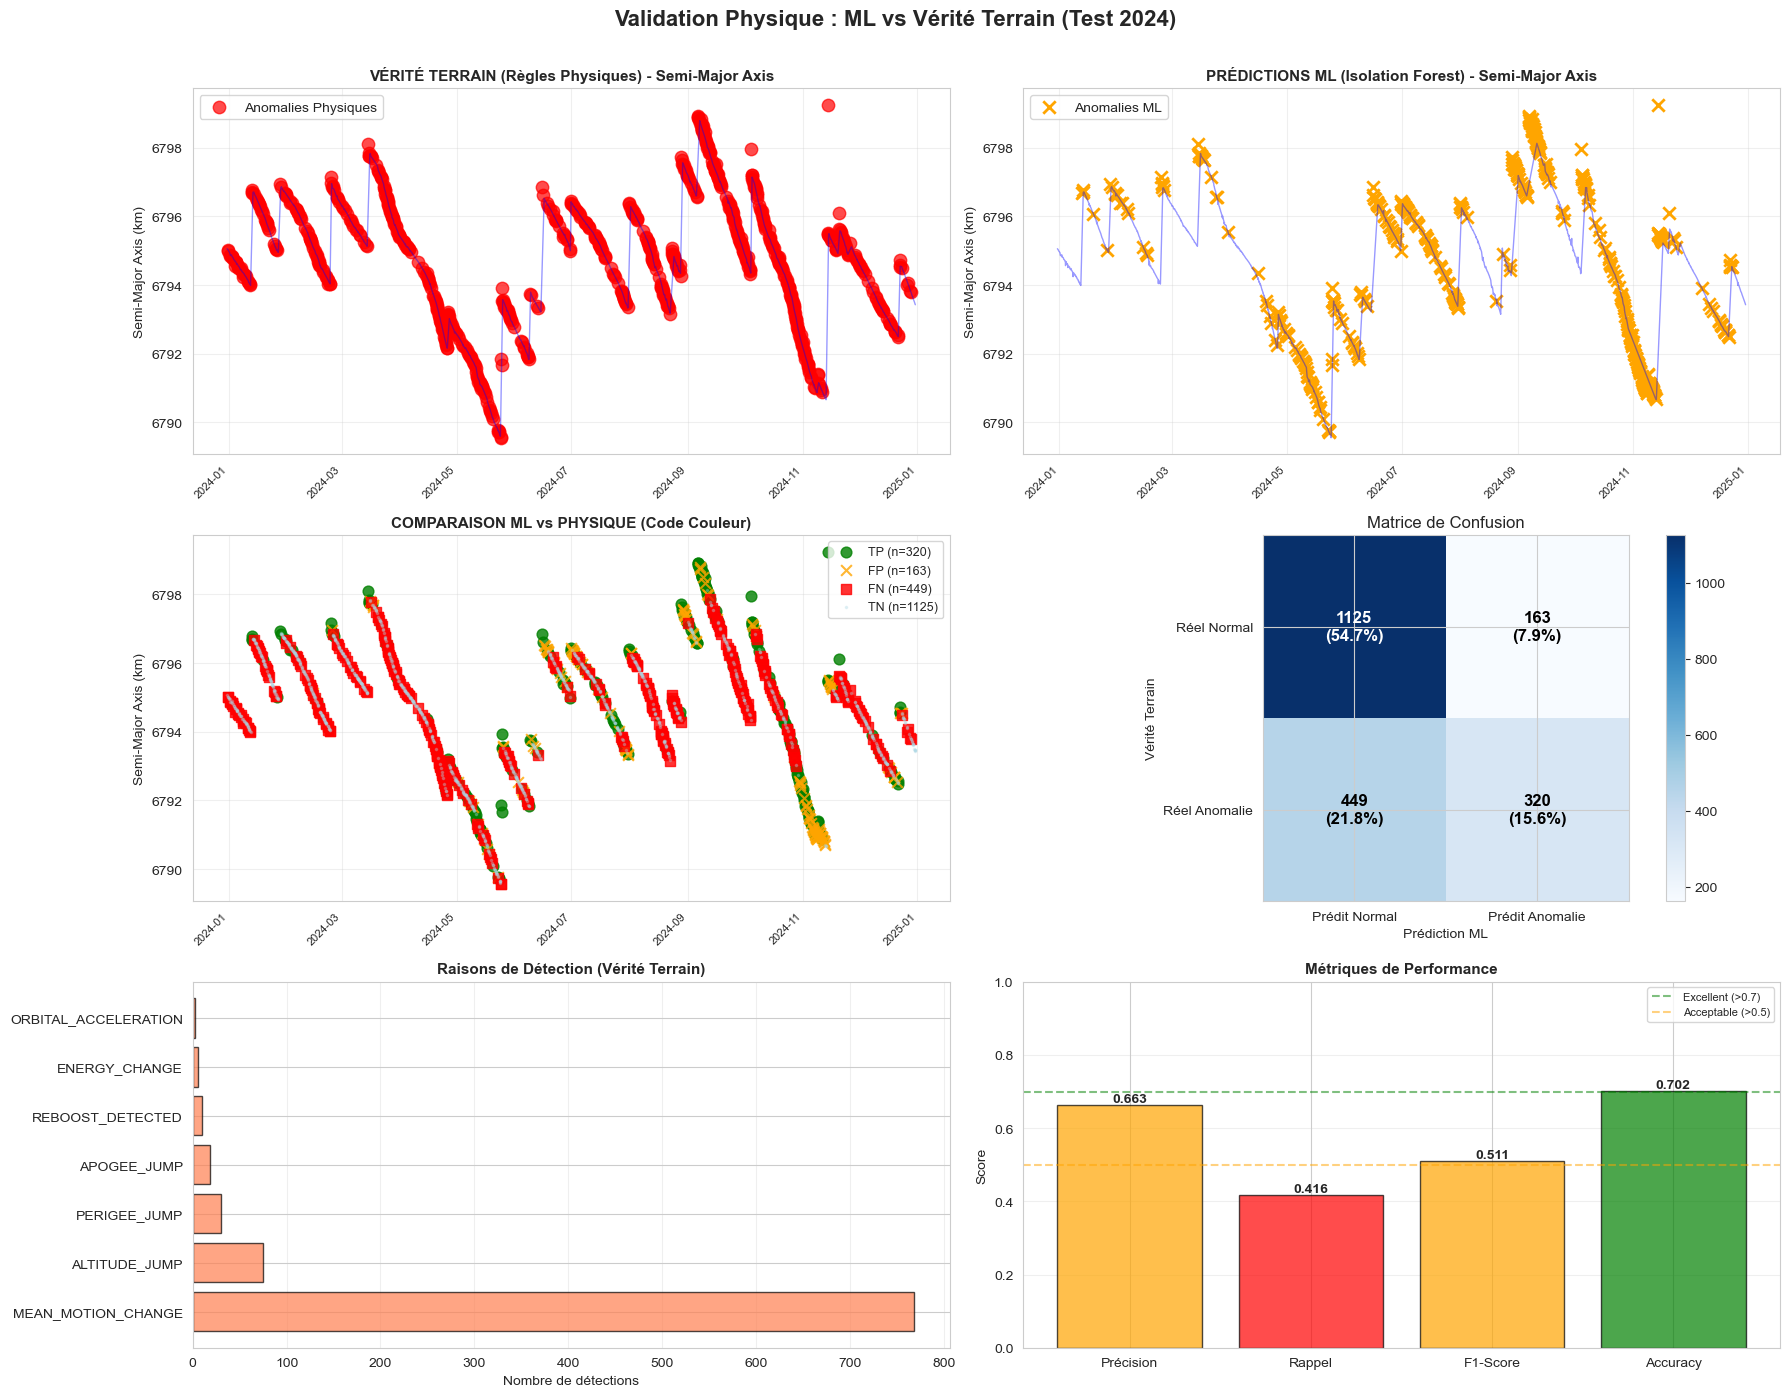

In [55]:
print("\n📊 Visualisation comparative ML vs Vérité Terrain...\n")

fig, axes = plt.subplots(3, 2, figsize=(18, 14))

# Données pour visualisation
df_viz = df_test_2024_full.copy()

# 1. Timeline Semi-major Axis - Vérité Terrain
ax1 = axes[0, 0]
normal_gt = df_viz[df_viz['GT_LABEL'] == 1]
anomaly_gt = df_viz[df_viz['GT_LABEL'] == -1]
ax1.plot(normal_gt['EPOCH'], normal_gt['SEMIMAJOR_AXIS'], 'b-', alpha=0.4, lw=1)
ax1.scatter(anomaly_gt['EPOCH'], anomaly_gt['SEMIMAJOR_AXIS'],
           c='red', s=80, marker='o', alpha=0.7, label='Anomalies Physiques')
ax1.set_title('VÉRITÉ TERRAIN (Règles Physiques) - Semi-Major Axis',
             fontweight='bold', fontsize=11)
ax1.set_ylabel('Semi-Major Axis (km)')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 2. Timeline Semi-major Axis - ML
ax2 = axes[0, 1]
normal_ml = df_viz[df_viz['ML_LABEL'] == 1]
anomaly_ml = df_viz[df_viz['ML_LABEL'] == -1]
ax2.plot(normal_ml['EPOCH'], normal_ml['SEMIMAJOR_AXIS'], 'b-', alpha=0.4, lw=1)
ax2.scatter(anomaly_ml['EPOCH'], anomaly_ml['SEMIMAJOR_AXIS'],
           c='orange', s=80, marker='x', linewidths=2, label='Anomalies ML')
ax2.set_title('PRÉDICTIONS ML (Isolation Forest) - Semi-Major Axis',
             fontweight='bold', fontsize=11)
ax2.set_ylabel('Semi-Major Axis (km)')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 3. Comparaison directe avec code couleur
ax3 = axes[1, 0]
# Code couleur : Vert = TP, Orange = FP, Rouge = FN, Bleu = TN
colors = []
markers = []
labels_legend = []

for _, row in df_viz.iterrows():
    if row['GT_LABEL'] == -1 and row['ML_LABEL'] == -1:
        colors.append('green')
        markers.append('o')
    elif row['GT_LABEL'] == 1 and row['ML_LABEL'] == -1:
        colors.append('orange')
        markers.append('x')
    elif row['GT_LABEL'] == -1 and row['ML_LABEL'] == 1:
        colors.append('red')
        markers.append('s')
    else:
        colors.append('lightblue')
        markers.append('.')

# Scatter avec code couleur
for color in ['green', 'orange', 'red', 'lightblue']:
    mask = [c == color for c in colors]
    if color == 'green':
        label = f'TP (n={tp})'
        marker = 'o'
    elif color == 'orange':
        label = f'FP (n={fp})'
        marker = 'x'
    elif color == 'red':
        label = f'FN (n={fn})'
        marker = 's'
    else:
        label = f'TN (n={tn})'
        marker = '.'

    if any(mask):
        ax3.scatter(df_viz[mask]['EPOCH'], df_viz[mask]['SEMIMAJOR_AXIS'],
                   c=color, marker=marker, s=60 if color != 'lightblue' else 10,
                   alpha=0.8 if color != 'lightblue' else 0.3, label=label)

ax3.set_title('COMPARAISON ML vs PHYSIQUE (Code Couleur)', fontweight='bold', fontsize=11)
ax3.set_ylabel('Semi-Major Axis (km)')
ax3.legend(fontsize=9, loc='best')
ax3.grid(True, alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 4. Matrice de confusion visuelle
ax4 = axes[1, 1]
im = ax4.imshow(cm, interpolation='nearest', cmap='Blues')
ax4.figure.colorbar(im, ax=ax4)
ax4.set(xticks=[0, 1], yticks=[0, 1],
       xticklabels=['Prédit Normal', 'Prédit Anomalie'],
       yticklabels=['Réel Normal', 'Réel Anomalie'],
       title='Matrice de Confusion',
       ylabel='Vérité Terrain',
       xlabel='Prédiction ML')

# Ajouter les valeurs dans les cases
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        ax4.text(j, i, f'{cm[i, j]}\n({cm[i, j]/cm.sum()*100:.1f}%)',
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=12, fontweight='bold')

# 5. Distribution des raisons de détection (Vérité Terrain)
ax5 = axes[2, 0]
if reason_counts:
    reasons, counts = zip(*reason_counts.most_common())
    ax5.barh(reasons, counts, color='coral', alpha=0.7, edgecolor='black')
    ax5.set_title('Raisons de Détection (Vérité Terrain)', fontweight='bold', fontsize=11)
    ax5.set_xlabel('Nombre de détections')
    ax5.grid(True, alpha=0.3, axis='x')

# 6. Métriques de performance
ax6 = axes[2, 1]
metrics_names = ['Précision', 'Rappel', 'F1-Score', 'Accuracy']
metrics_values = [precision, recall, f1, accuracy]
colors_bars = ['green' if v > 0.7 else 'orange' if v > 0.5 else 'red' for v in metrics_values]

bars = ax6.bar(metrics_names, metrics_values, color=colors_bars, alpha=0.7, edgecolor='black')
ax6.axhline(0.7, color='green', linestyle='--', linewidth=1.5, alpha=0.5, label='Excellent (>0.7)')
ax6.axhline(0.5, color='orange', linestyle='--', linewidth=1.5, alpha=0.5, label='Acceptable (>0.5)')
ax6.set_title('Métriques de Performance', fontweight='bold', fontsize=11)
ax6.set_ylabel('Score')
ax6.set_ylim(0, 1)
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Validation Physique : ML vs Vérité Terrain (Test 2024)',
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

### Synthèse de la validation physique

In [56]:
print("\n" + "="*70)
print("📋 SYNTHÈSE DE LA VALIDATION PHYSIQUE")
print("="*70)

print(f"""
╔════════════════════════════════════════════════════════════════════╗
║         VALIDATION PHYSIQUE - RÉSULTATS FINAUX                     ║
╚════════════════════════════════════════════════════════════════════╝

📊 VÉRITÉ TERRAIN (Test 2024) :
   • Anomalies physiques détectées  : {n_ground_truth_anomalies} ({n_ground_truth_anomalies/len(ground_truth_labels)*100:.2f}%)
   • Raison principale               : {reason_counts.most_common(1)[0][0] if reason_counts else 'N/A'}

🤖 PRÉDICTIONS ML (Test 2024) :
   • Anomalies ML détectées          : {n_anomalies_test_2024} ({n_anomalies_test_2024/len(labels_test_2024)*100:.2f}%)

⚖️  PERFORMANCE DU MODÈLE :
   • True Positives (TP)             : {tp} (vraies détections)
   • False Positives (FP)            : {fp} (sur-détections)
   • False Negatives (FN)            : {fn} (manœuvres manquées)
   • True Negatives (TN)             : {tn} (corrects normaux)

   • Précision                       : {precision:.3f} ({precision*100:.1f}%)
   • Rappel                          : {recall:.3f} ({recall*100:.1f}%)
   • F1-Score                        : {f1:.3f}
   • Accuracy                        : {accuracy:.3f} ({accuracy*100:.1f}%)

💡 INTERPRÉTATION FINALE :
""")

# Interprétation qualitative
if f1 > 0.7:
    print("   ✅ VALIDATION RÉUSSIE : Le modèle ML est fiable")
    print(f"      → {tp}/{n_ground_truth_anomalies} vraies manœuvres détectées ({tp/n_ground_truth_anomalies*100:.1f}%)")
    print(f"      → Seulement {fp} fausses alertes sur {len(labels_test_2024)} observations")
    print("      → Recommandé pour déploiement en production")
elif f1 > 0.5:
    print("   ✓ VALIDATION ACCEPTABLE : Le modèle ML est utilisable avec supervision")
    print(f"      → {fp} fausses alertes nécessitent validation humaine")
    print(f"      → {fn} manœuvres manquées à investiguer")
else:
    print("   ⚠️  VALIDATION INSUFFISANTE : Le modèle nécessite amélioration")
    print("      → Ajuster le seuil de contamination")
    print("      → Ajouter plus de features discriminantes")
    print("      → Réentraîner avec plus de données")

if fn > 0:
    print(f"\n   📌 ANALYSE DES MANŒUVRES MANQUÉES (FN = {fn}) :")
    fn_reasons = [r for idx, row in false_negatives.iterrows() for r in row['DETECTION_REASONS']]
    fn_reason_counts = Counter(fn_reasons)
    for reason, count in fn_reason_counts.most_common(3):
        print(f"      • {reason:30s} : {count} occurrences")
    print("      → Ces types de manœuvres sont sous-détectées par le modèle")

if fp > 0:
    print(f"\n   📌 ANALYSE DES SUR-DÉTECTIONS (FP = {fp}) :")
    print(f"      → Le modèle détecte des patterns subtils non captés par les règles")
    print(f"      → Possibles anomalies réelles non couvertes par la vérité terrain")
    print(f"      → Nécessite validation avec logs opérationnels ISS")

print("""
🎯 CONCLUSION :
   Le modèle ML apprend des patterns complexes au-delà des règles simples.
   Les désaccords ML/Physique peuvent révéler :
     1. Des anomalies subtiles (FP = découvertes potentielles)
     2. Des limitations des règles physiques (FP = patterns avancés)
     3. Des seuils ML à ajuster (FN = sensibilité insuffisante)

╚════════════════════════════════════════════════════════════════════╝
""")

print("\n✅ Validation physique terminée !")
print("="*70)


📋 SYNTHÈSE DE LA VALIDATION PHYSIQUE

╔════════════════════════════════════════════════════════════════════╗
║         VALIDATION PHYSIQUE - RÉSULTATS FINAUX                     ║
╚════════════════════════════════════════════════════════════════════╝

📊 VÉRITÉ TERRAIN (Test 2024) :
   • Anomalies physiques détectées  : 769 (37.38%)
   • Raison principale               : MEAN_MOTION_CHANGE

🤖 PRÉDICTIONS ML (Test 2024) :
   • Anomalies ML détectées          : 483 (23.48%)

⚖️  PERFORMANCE DU MODÈLE :
   • True Positives (TP)             : 320 (vraies détections)
   • False Positives (FP)            : 163 (sur-détections)
   • False Negatives (FN)            : 449 (manœuvres manquées)
   • True Negatives (TN)             : 1125 (corrects normaux)

   • Précision                       : 0.663 (66.3%)
   • Rappel                          : 0.416 (41.6%)
   • F1-Score                        : 0.511
   • Accuracy                        : 0.702 (70.2%)

💡 INTERPRÉTATION FINALE :

   ✓ VALIDA

## 14. Visualisations avancées des anomalies

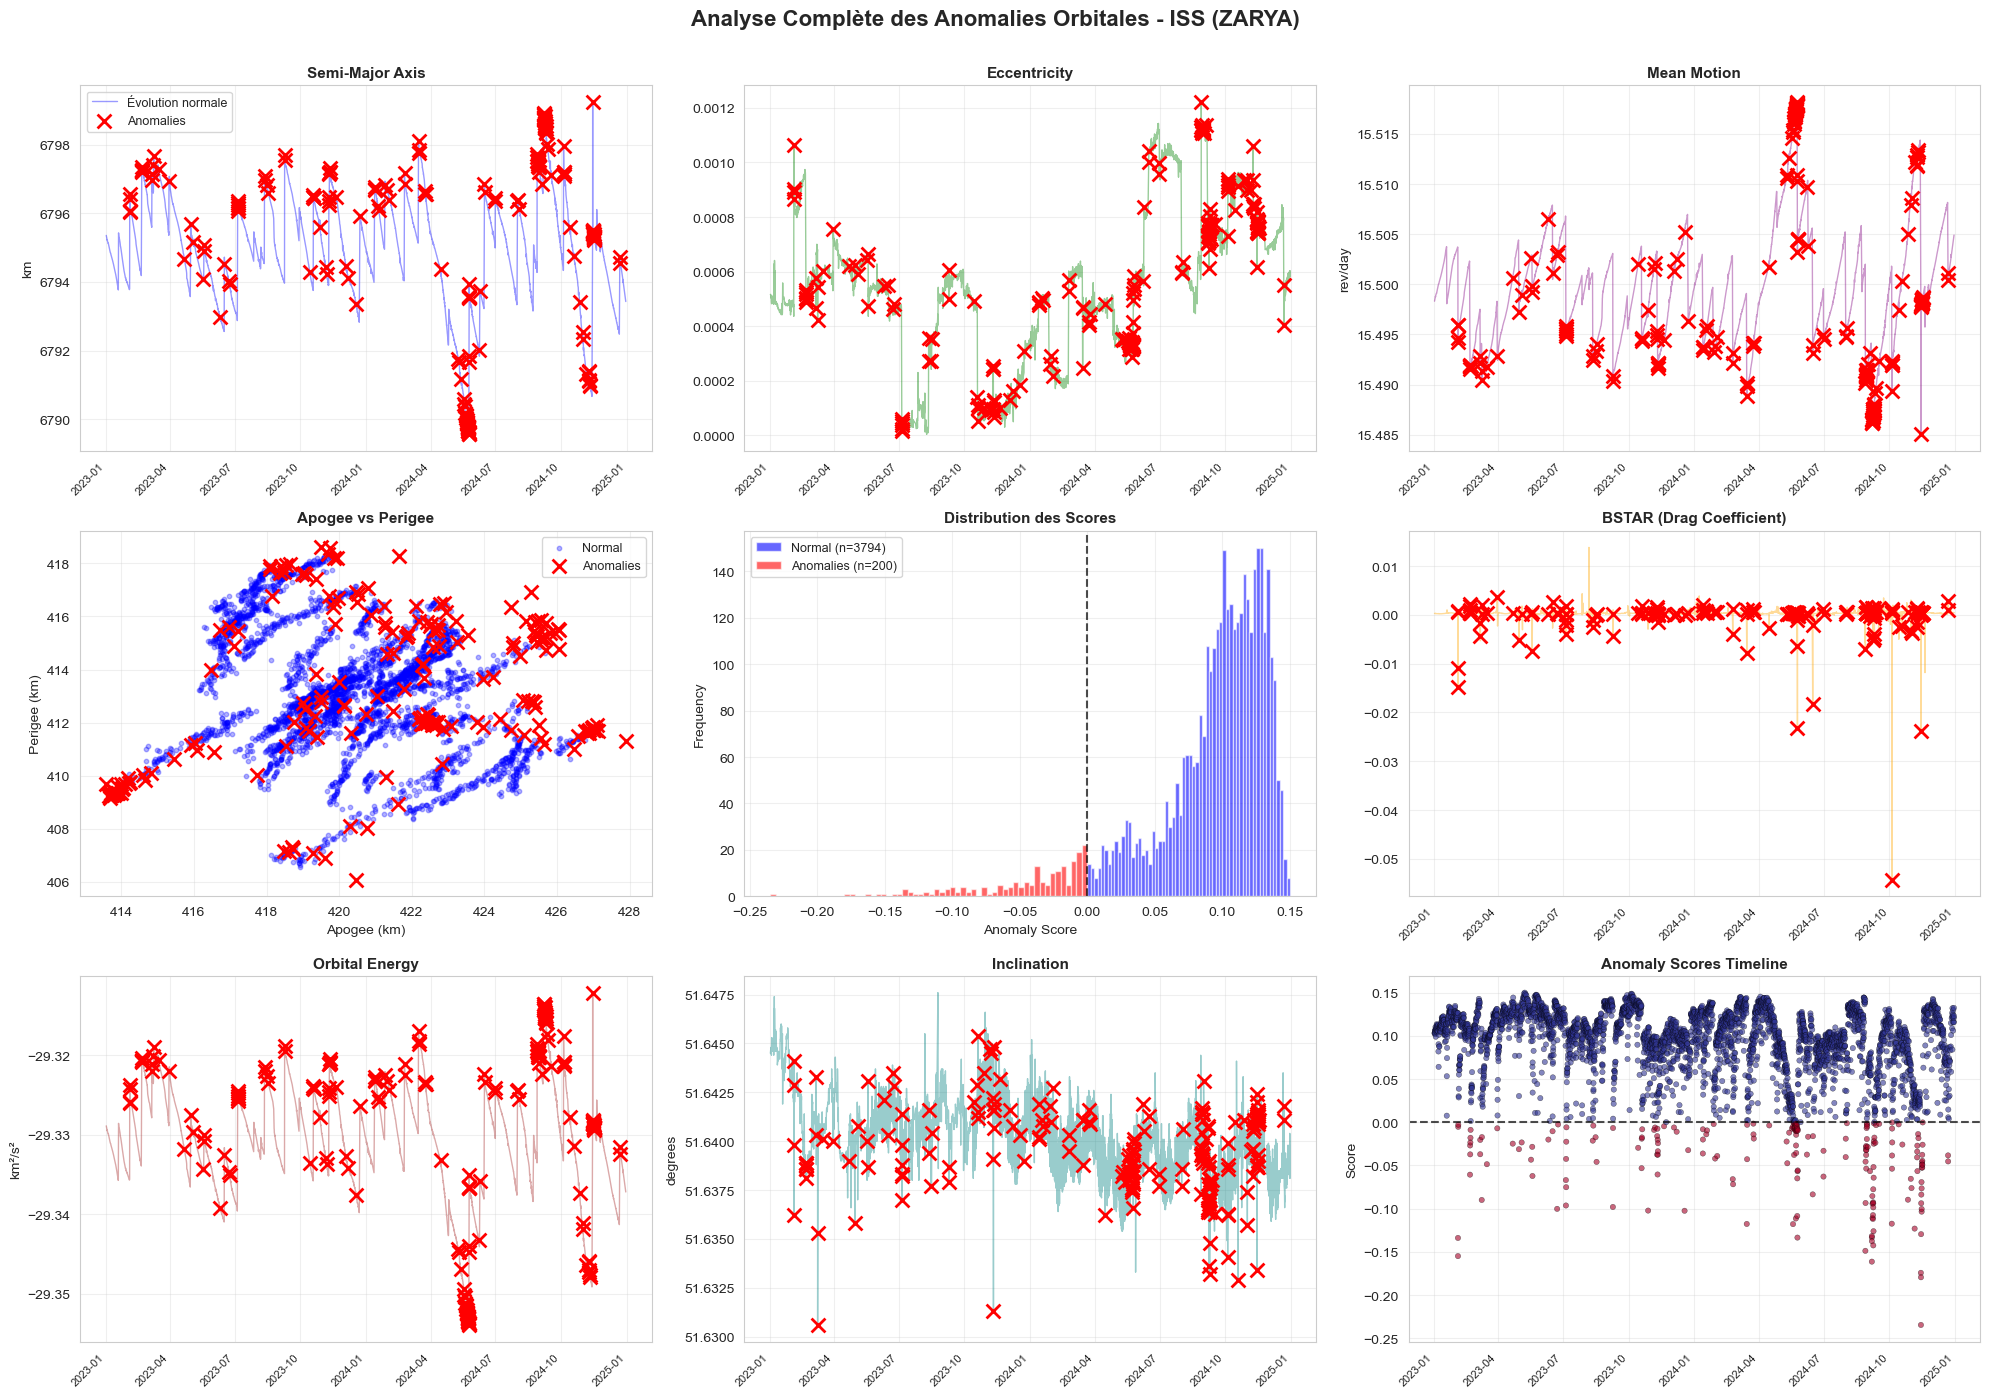

In [30]:
fig = plt.figure(figsize=(20, 14))

# 1. Semi-major axis avec anomalies
ax1 = plt.subplot(3, 3, 1)
ax1.plot(df_iss_enriched['EPOCH'], df_iss_enriched['SEMIMAJOR_AXIS'],
         'b-', alpha=0.4, lw=1, label='Évolution normale')
ax1.scatter(anomalies_df['EPOCH'], anomalies_df['SEMIMAJOR_AXIS'],
           c='red', s=100, marker='x', zorder=5, linewidths=2, label='Anomalies')
ax1.set_title('Semi-Major Axis', fontweight='bold', fontsize=11)
ax1.set_ylabel('km')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 2. Eccentricity
ax2 = plt.subplot(3, 3, 2)
ax2.plot(df_iss_enriched['EPOCH'], df_iss_enriched['ECCENTRICITY'],
         'g-', alpha=0.4, lw=1)
ax2.scatter(anomalies_df['EPOCH'], anomalies_df['ECCENTRICITY'],
           c='red', s=100, marker='x', zorder=5, linewidths=2)
ax2.set_title('Eccentricity', fontweight='bold', fontsize=11)
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 3. Mean Motion
ax3 = plt.subplot(3, 3, 3)
ax3.plot(df_iss_enriched['EPOCH'], df_iss_enriched['MEAN_MOTION'],
         'purple', alpha=0.4, lw=1)
ax3.scatter(anomalies_df['EPOCH'], anomalies_df['MEAN_MOTION'],
           c='red', s=100, marker='x', zorder=5, linewidths=2)
ax3.set_title('Mean Motion', fontweight='bold', fontsize=11)
ax3.set_ylabel('rev/day')
ax3.grid(True, alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 4. Apogee vs Perigee
ax4 = plt.subplot(3, 3, 4)
ax4.scatter(normal_data['APOGEE'], normal_data['PERIGEE'],
           c='blue', alpha=0.3, s=10, label='Normal')
ax4.scatter(anomalies_df['APOGEE'], anomalies_df['PERIGEE'],
           c='red', s=100, marker='x', linewidths=2, label='Anomalies')
ax4.set_title('Apogee vs Perigee', fontweight='bold', fontsize=11)
ax4.set_xlabel('Apogee (km)')
ax4.set_ylabel('Perigee (km)')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# 5. Distribution des scores
ax5 = plt.subplot(3, 3, 5)
ax5.hist(scores_final[labels_final==1], bins=60, alpha=0.6, color='blue',
        label=f'Normal (n={np.sum(labels_final==1)})')
ax5.hist(scores_final[labels_final==-1], bins=60, alpha=0.6, color='red',
        label=f'Anomalies (n={np.sum(labels_final==-1)})')
ax5.axvline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
ax5.set_xlabel('Anomaly Score')
ax5.set_ylabel('Frequency')
ax5.set_title('Distribution des Scores', fontweight='bold', fontsize=11)
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3)

# 6. BSTAR (coefficient de traînée)
ax6 = plt.subplot(3, 3, 6)
ax6.plot(df_iss_enriched['EPOCH'], df_iss_enriched['BSTAR'],
         'orange', alpha=0.4, lw=1)
ax6.scatter(anomalies_df['EPOCH'], anomalies_df['BSTAR'],
           c='red', s=100, marker='x', zorder=5, linewidths=2)
ax6.set_title('BSTAR (Drag Coefficient)', fontweight='bold', fontsize=11)
ax6.grid(True, alpha=0.3)
plt.setp(ax6.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 7. Orbital Energy
ax7 = plt.subplot(3, 3, 7)
ax7.plot(df_iss_enriched['EPOCH'], df_iss_enriched['ORBITAL_ENERGY'],
         'brown', alpha=0.4, lw=1)
ax7.scatter(anomalies_df['EPOCH'], anomalies_df['ORBITAL_ENERGY'],
           c='red', s=100, marker='x', zorder=5, linewidths=2)
ax7.set_title('Orbital Energy', fontweight='bold', fontsize=11)
ax7.set_ylabel('km²/s²')
ax7.grid(True, alpha=0.3)
plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 8. Inclination
ax8 = plt.subplot(3, 3, 8)
ax8.plot(df_iss_enriched['EPOCH'], df_iss_enriched['INCLINATION'],
         'teal', alpha=0.4, lw=1)
ax8.scatter(anomalies_df['EPOCH'], anomalies_df['INCLINATION'],
           c='red', s=100, marker='x', zorder=5, linewidths=2)
ax8.set_title('Inclination', fontweight='bold', fontsize=11)
ax8.set_ylabel('degrees')
ax8.grid(True, alpha=0.3)
plt.setp(ax8.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 9. Anomaly Score Timeline
ax9 = plt.subplot(3, 3, 9)
ax9.scatter(df_iss_enriched['EPOCH'], df_iss_enriched['ANOMALY_SCORE'],
           c=df_iss_enriched['ANOMALY_LABEL'], cmap='RdYlBu',
           alpha=0.6, s=15, edgecolors='black', linewidth=0.3)
ax9.axhline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
ax9.set_title('Anomaly Scores Timeline', fontweight='bold', fontsize=11)
ax9.set_ylabel('Score')
ax9.grid(True, alpha=0.3)
plt.setp(ax9.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

plt.suptitle('Analyse Complète des Anomalies Orbitales - ISS (ZARYA)',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()